### **Schritt 1: *Bibliotheken importieren***

In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets as skdata
from sklearn import model_selection as skmodel
from sklearn.model_selection import GridSearchCV

In [20]:
# Hilfsfunktionen zum Plotten der Daten 
def plot_res(data_x, data_y, regressor=None, weights=None, is_list=False, labels=None, 
             is_data_list=False, data_labels=None, func=None, lw=0, data_style=None, pos_legend='upper left', minmax=None):

    if minmax is None:
        if is_data_list:
            minmax = [[np.concatenate(data_x).min(),np.concatenate(data_x).max()],[np.concatenate(data_y).min(),np.concatenate(data_y).max()]]
        else:
            minmax = [[data_x.min(),data_x.max()],[data_y.min(),data_y.max()]]

    xval = np.arange(minmax[0][0],minmax[0][1],0.0001)

    markers = ["o","v","s","D","X"]
    fig = plt.figure(figsize=(12,6),dpi=200)
    ax = plt.subplot(111)

    if data_labels is None:
        data_labels = []
        if is_data_list:
            for i in range(1,len(weights)+1):
                data_labels.append('data '+str(i))
        else:
            data_labels = ['data']

    if data_style is None:
        data_style = []
        if is_data_list:
            for i in range(1,len(weights)+1):
                data_style.append([10,0])
        else:
            data_style = [[10,0]]

            
            
    if is_data_list:
        for i in range(len(data_x)):
            ax.plot(data_x[i],data_y[i], label=data_labels[i], lw=data_style[i][1], marker=markers[0], markersize=data_style[i][0])
    else:
        ax.plot(data_x,data_y, label=data_labels[0], lw=data_style[0][1], marker=markers[0], markersize=data_style[0][0])

    if labels is None:
        labels = []
        if is_list:
            for i in range(1,len(weights)+1):
                labels.append(str(i))
        else:
            labels = [str(1)]

    if func is None:
        if is_list:
            func = []
            for i in range(1,len(weights)+1):
                func.append(lambda x: x)
        else:
            func = lambda x: x

            
    if weights is not None:
        if is_list:
            i = 0
            for iweights in weights:
                ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],
                        label=labels[i], lw=3)
                i += 1
        else:
            ax.plot(xval, [weights[1]*func(x)+weights[0] for x in xval],
                    label=labels[0], lw=3)

    if regressor is not None:
        ax.plot(xval, regressor.predict(xval.reshape(-1,1)),
                    label=labels[0], lw=3)

        
            
    ax.legend(loc=pos_legend, fancybox=True, fontsize=20)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)

    plt.ylim(1.02*minmax[1][0]-0.02*minmax[1][1],1.02*minmax[1][1]-0.02*minmax[1][0])        
    plt.xlim(1.02*minmax[0][0]-0.02*minmax[0][1],1.02*minmax[0][1]-0.02*minmax[0][0]) 

### **Schritt 2: *Benötigte Daten laden***

In [8]:
california = skdata.fetch_california_housing()

# Daten in eine Tabelle einfügen
california_df = (
    pd.DataFrame(data = california.data, columns = california.feature_names)
)

# Einfügen der Target Spalte in die Tabelle
california_df[california.target_names[0]] = california.target


### **Schritt 3: *Grobe Betrachtung der Datenstruktur***

In [21]:
california_df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

### **Schritt 5: *Betrachtung nur von 2 Spalten: MedInc, MedValue***
#### - Betrachtung nur von 100 Datenpunkten 

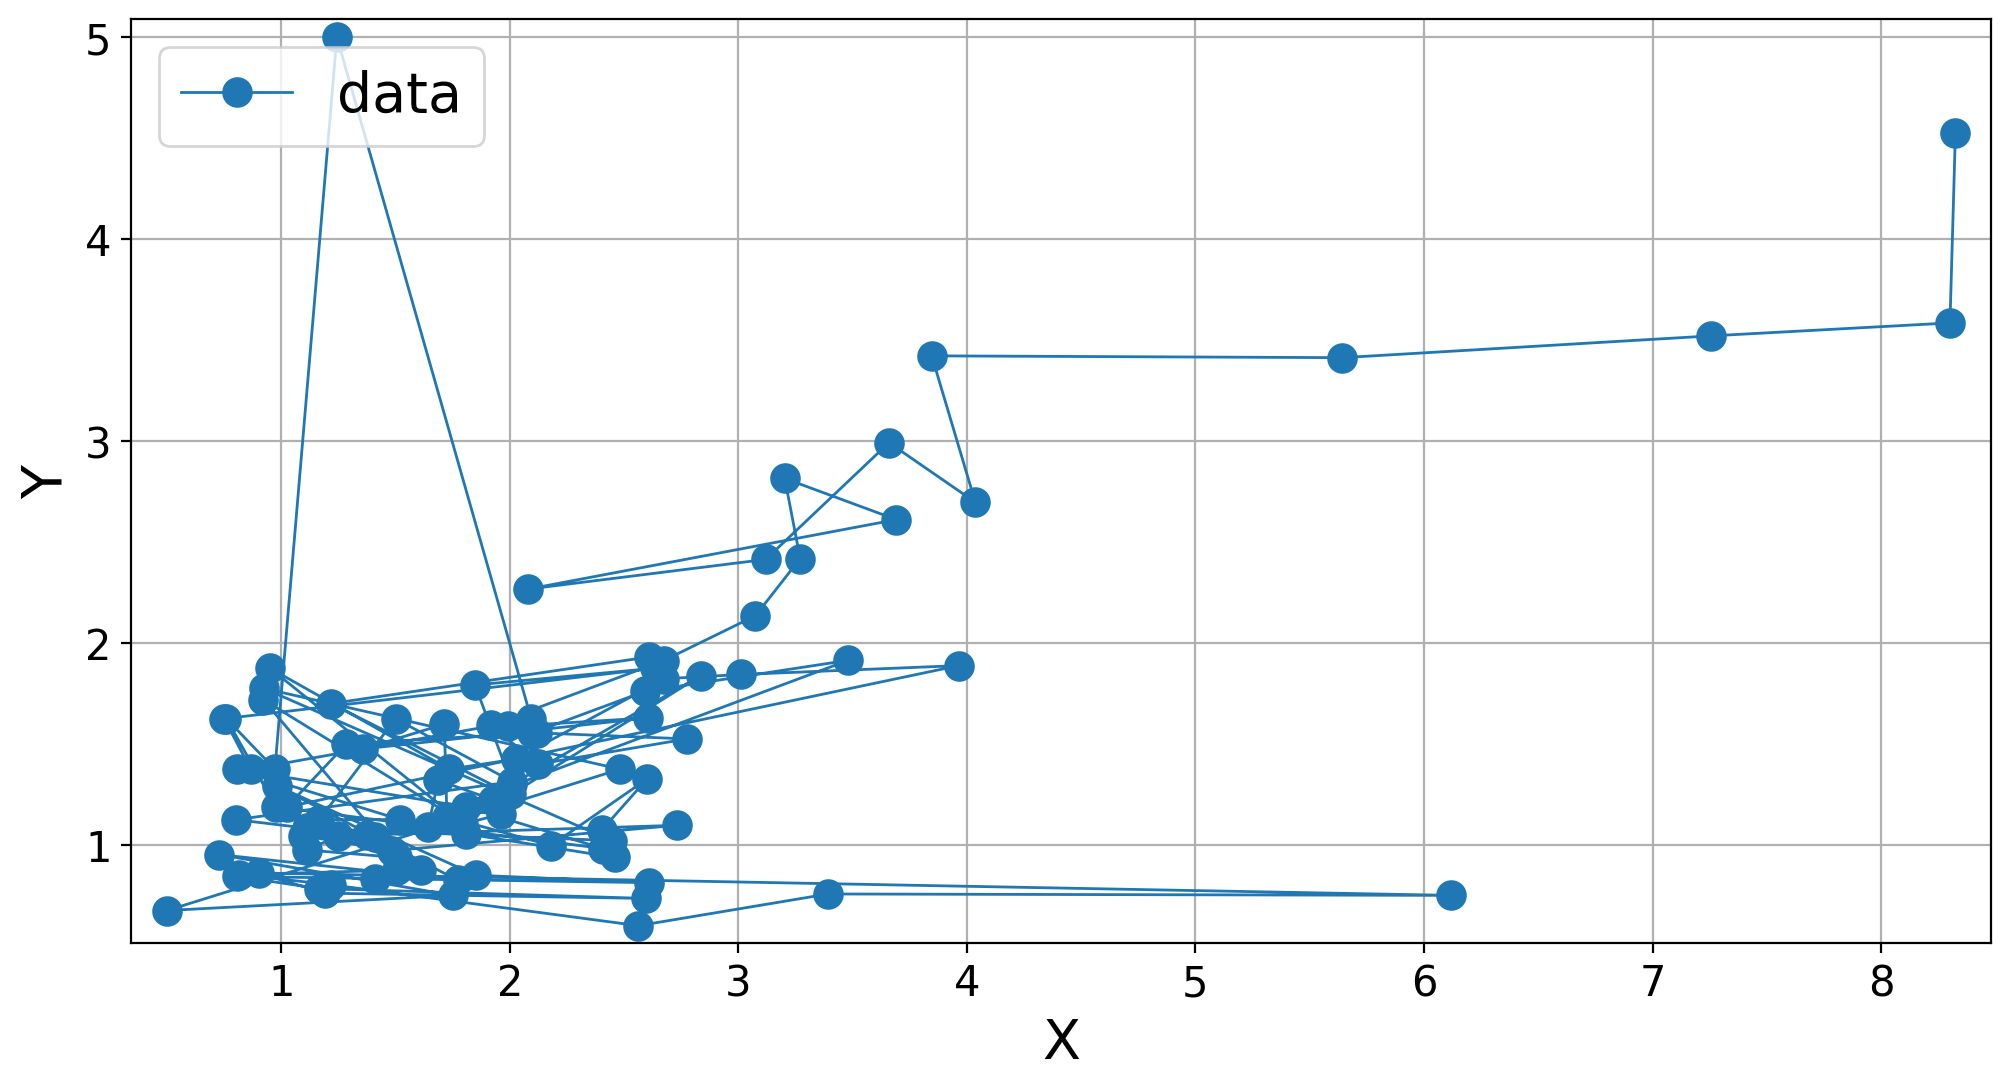

In [22]:
# mit .values wird ein np.array erstellt
x_data = california_df.iloc[:100, 0].values 
y_data = california_df.iloc[:100,-1].values 

plot_res(x_data, y_data, data_style=[[10, 1]])

### **Schritt 6: *Untersuchung: Einfluss Anzahl der Nachbarn auf Score***
- KNeighborsRegressor



Score of kNN:  0.9981525790878002
Score of kNN:  0.7153101261075594
Score of kNN:  0.6278290119718888
Score of kNN:  0.569689342823925
Score of kNN:  0.5533156290031759
Score of kNN:  0.506616155926731
Score of kNN:  0.4552799101176773
Score of kNN:  0.4551059974700401
Score of kNN:  0.4476904758265371
Score of kNN:  0.43435973715724296


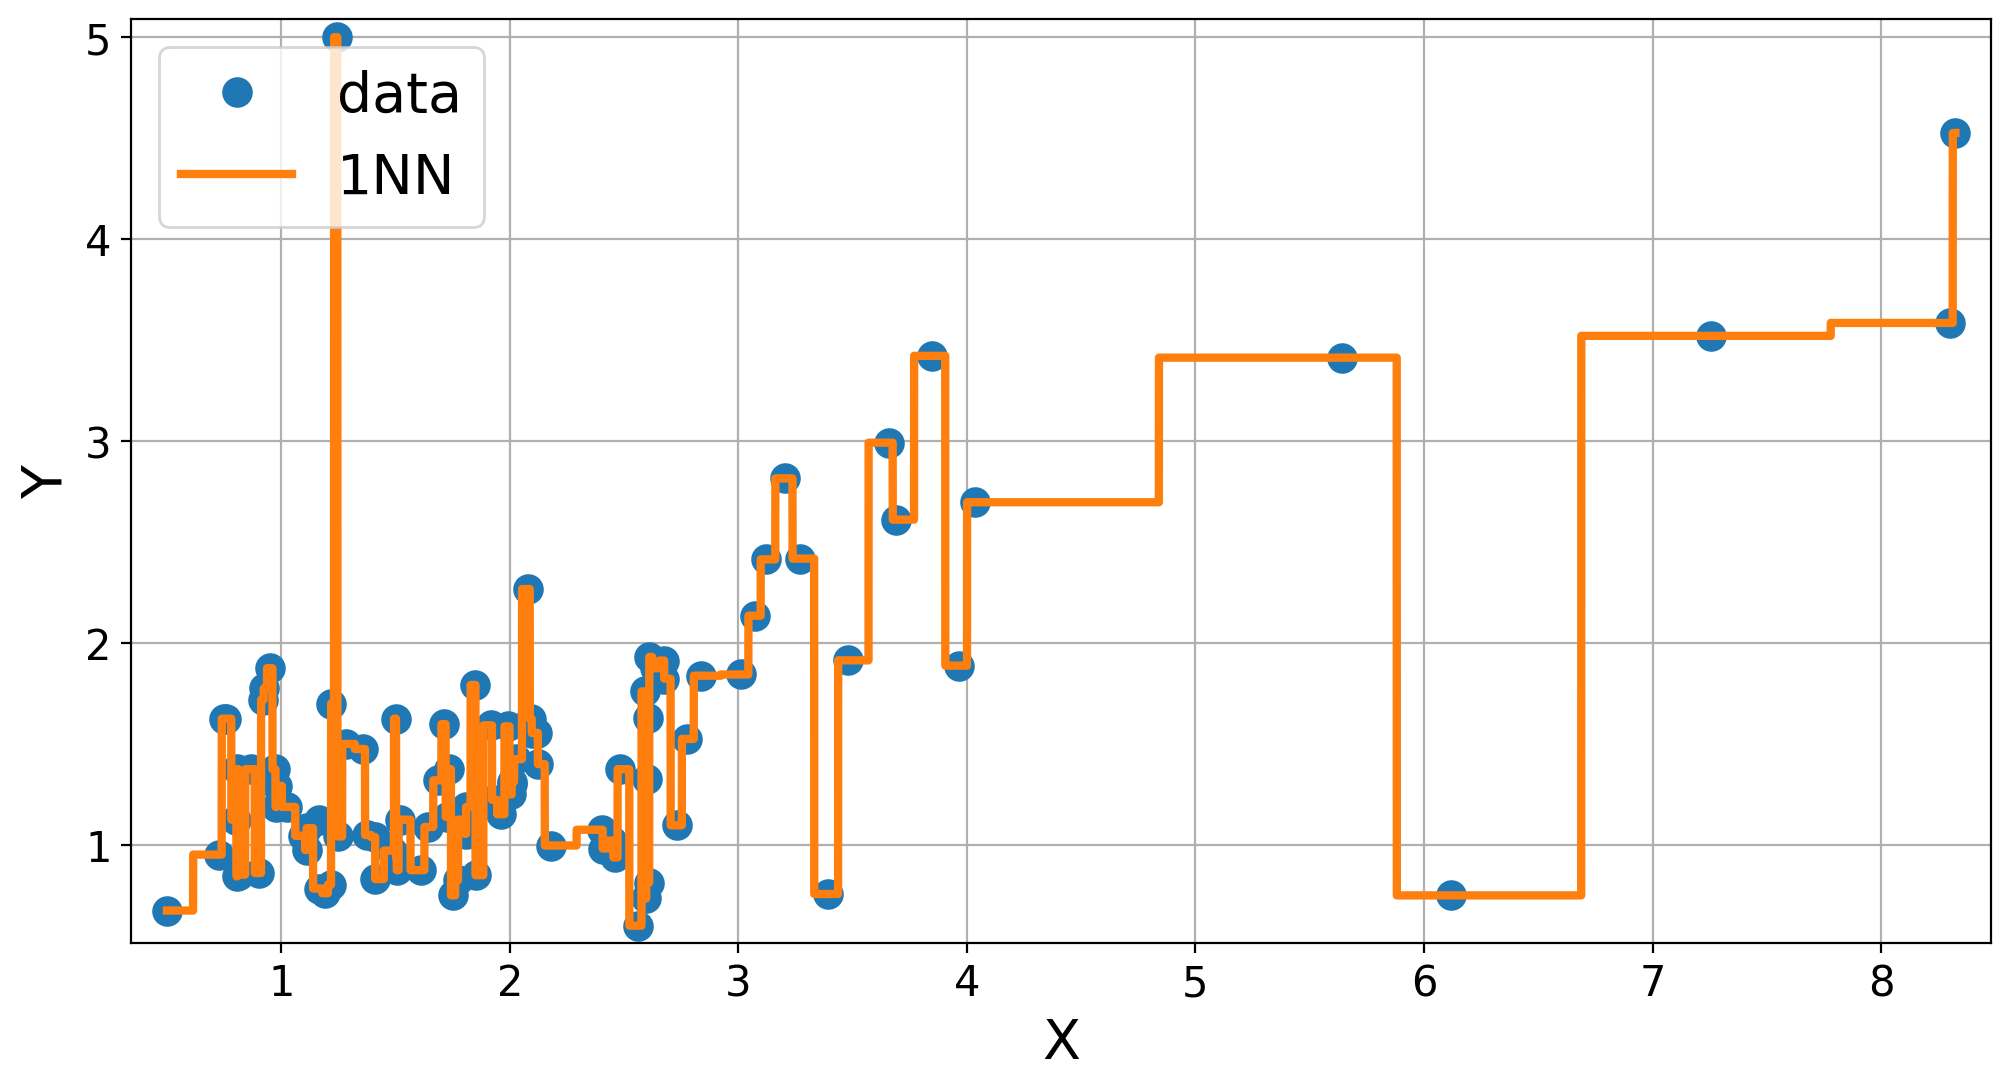

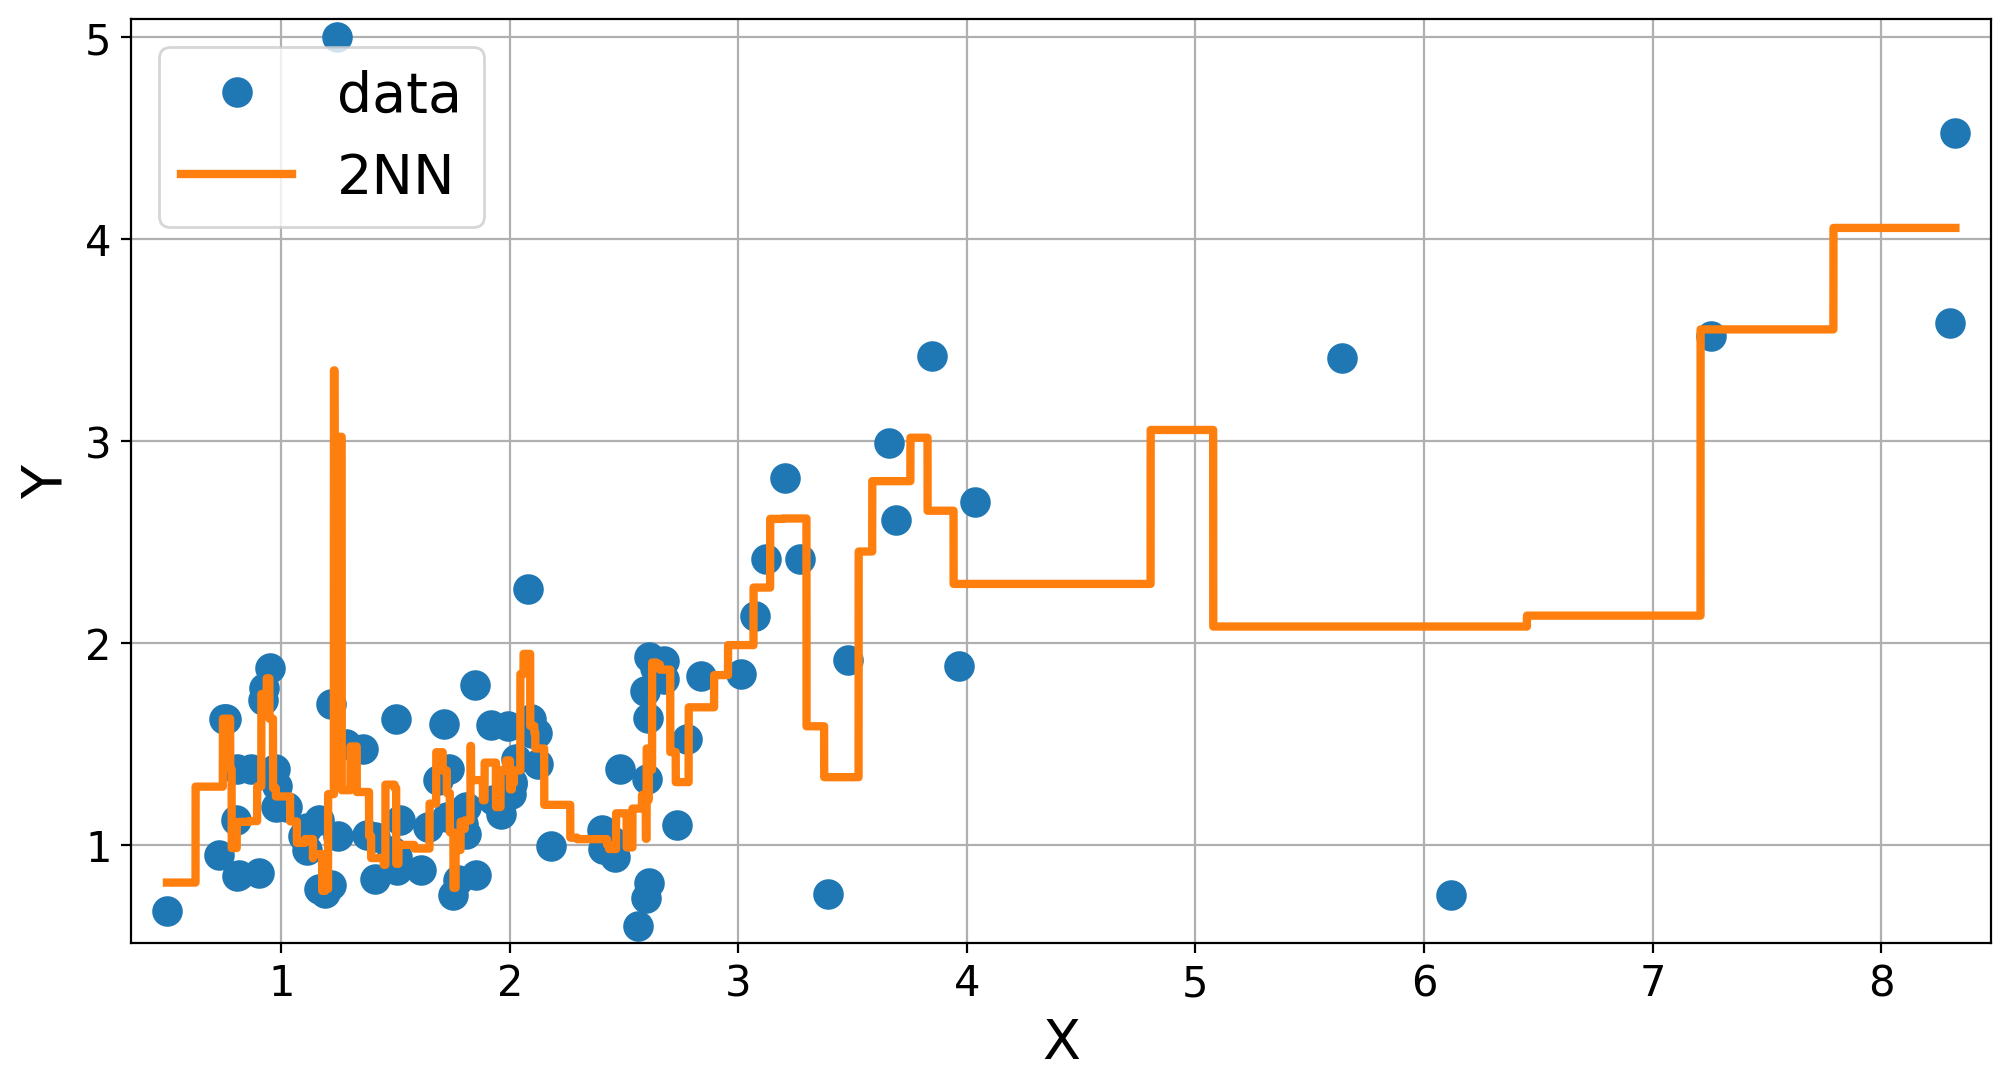

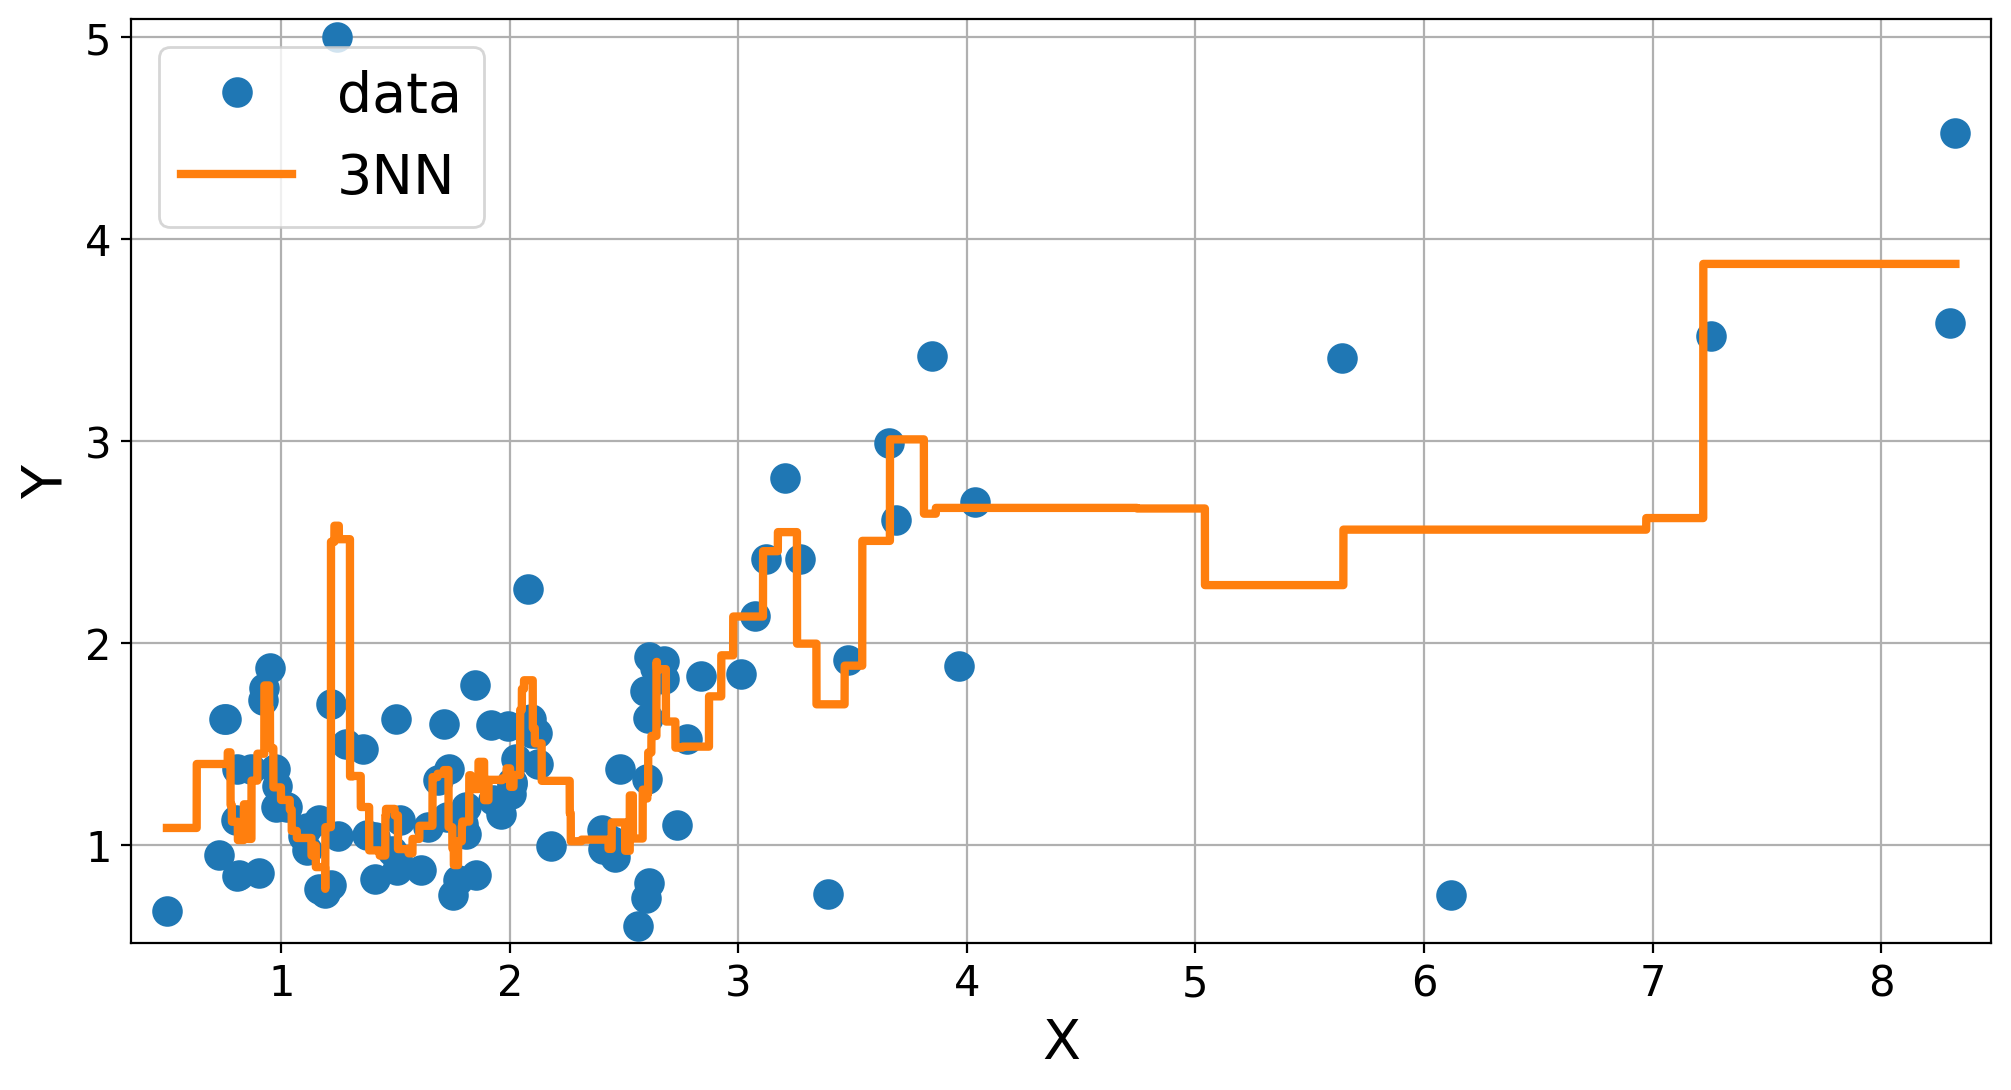

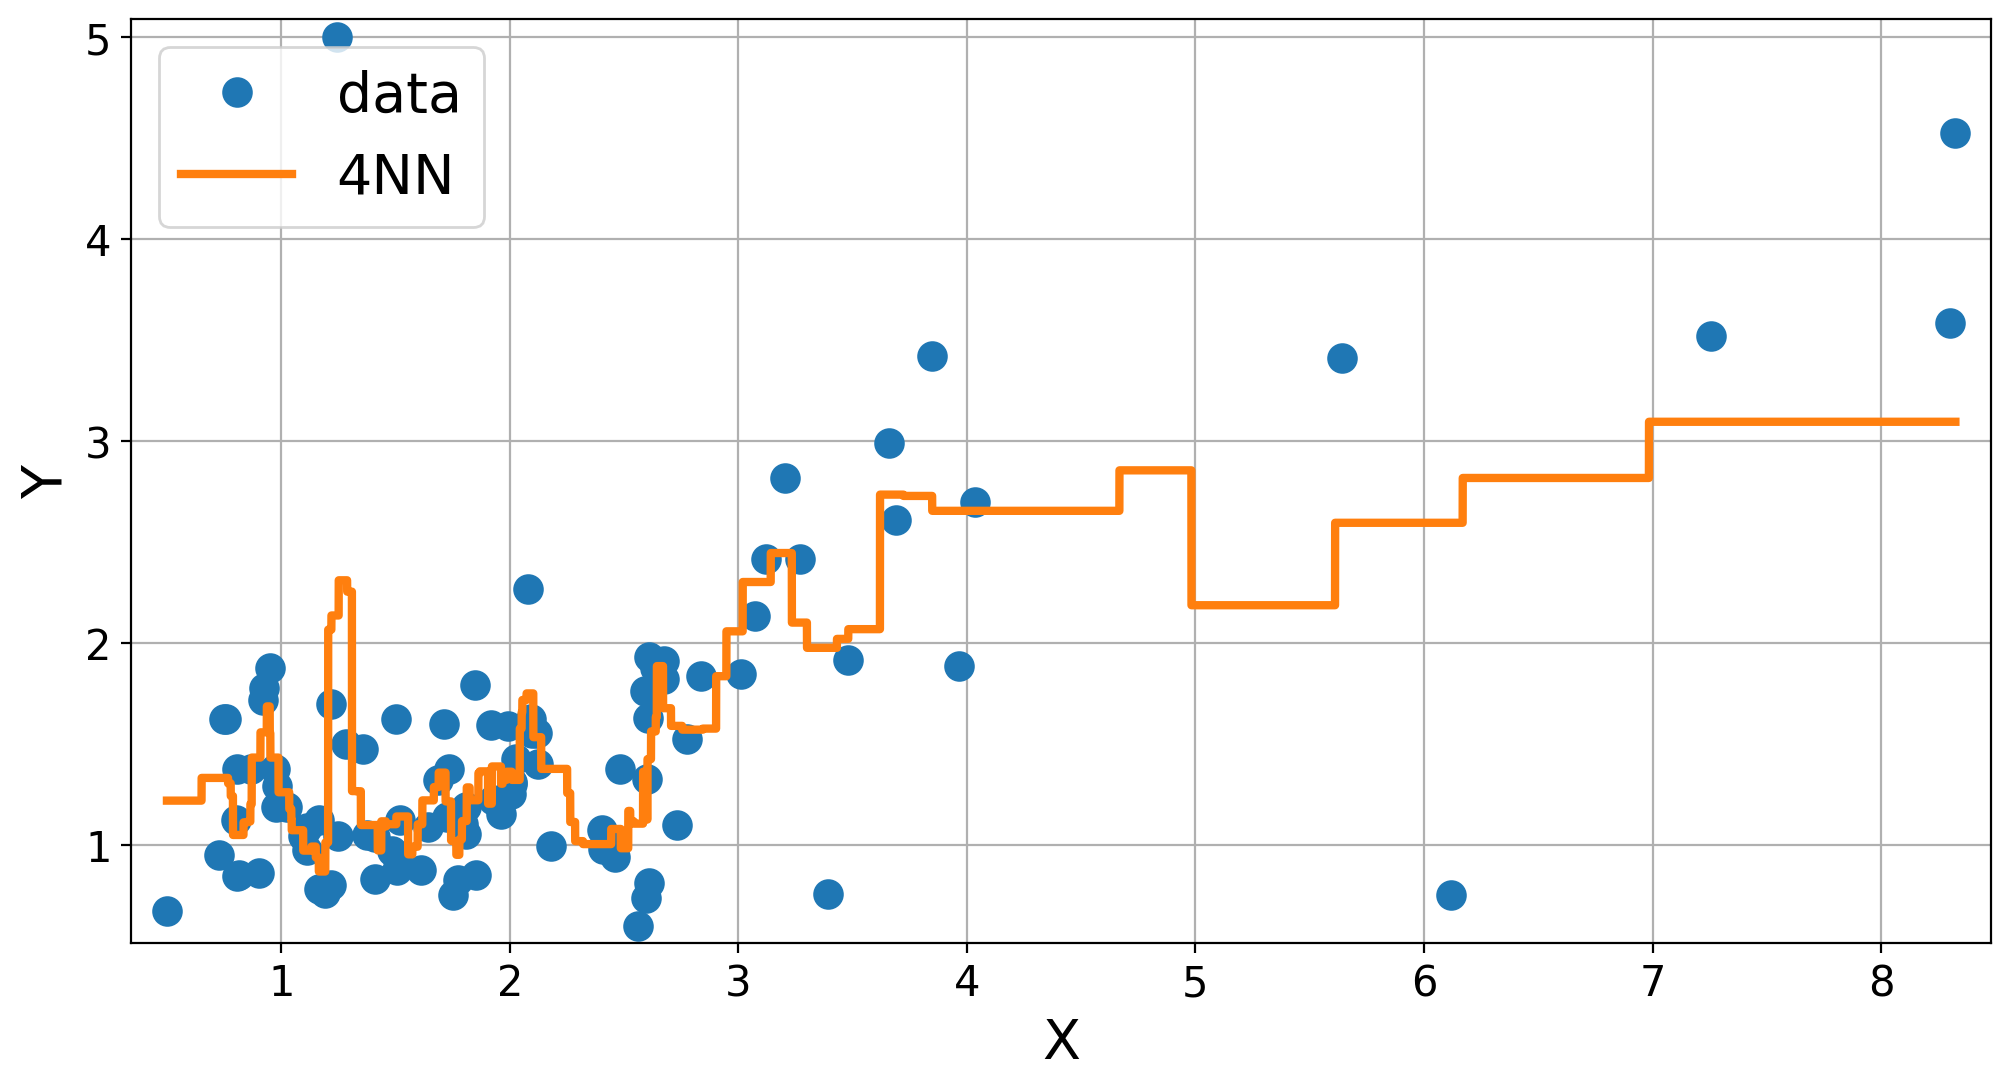

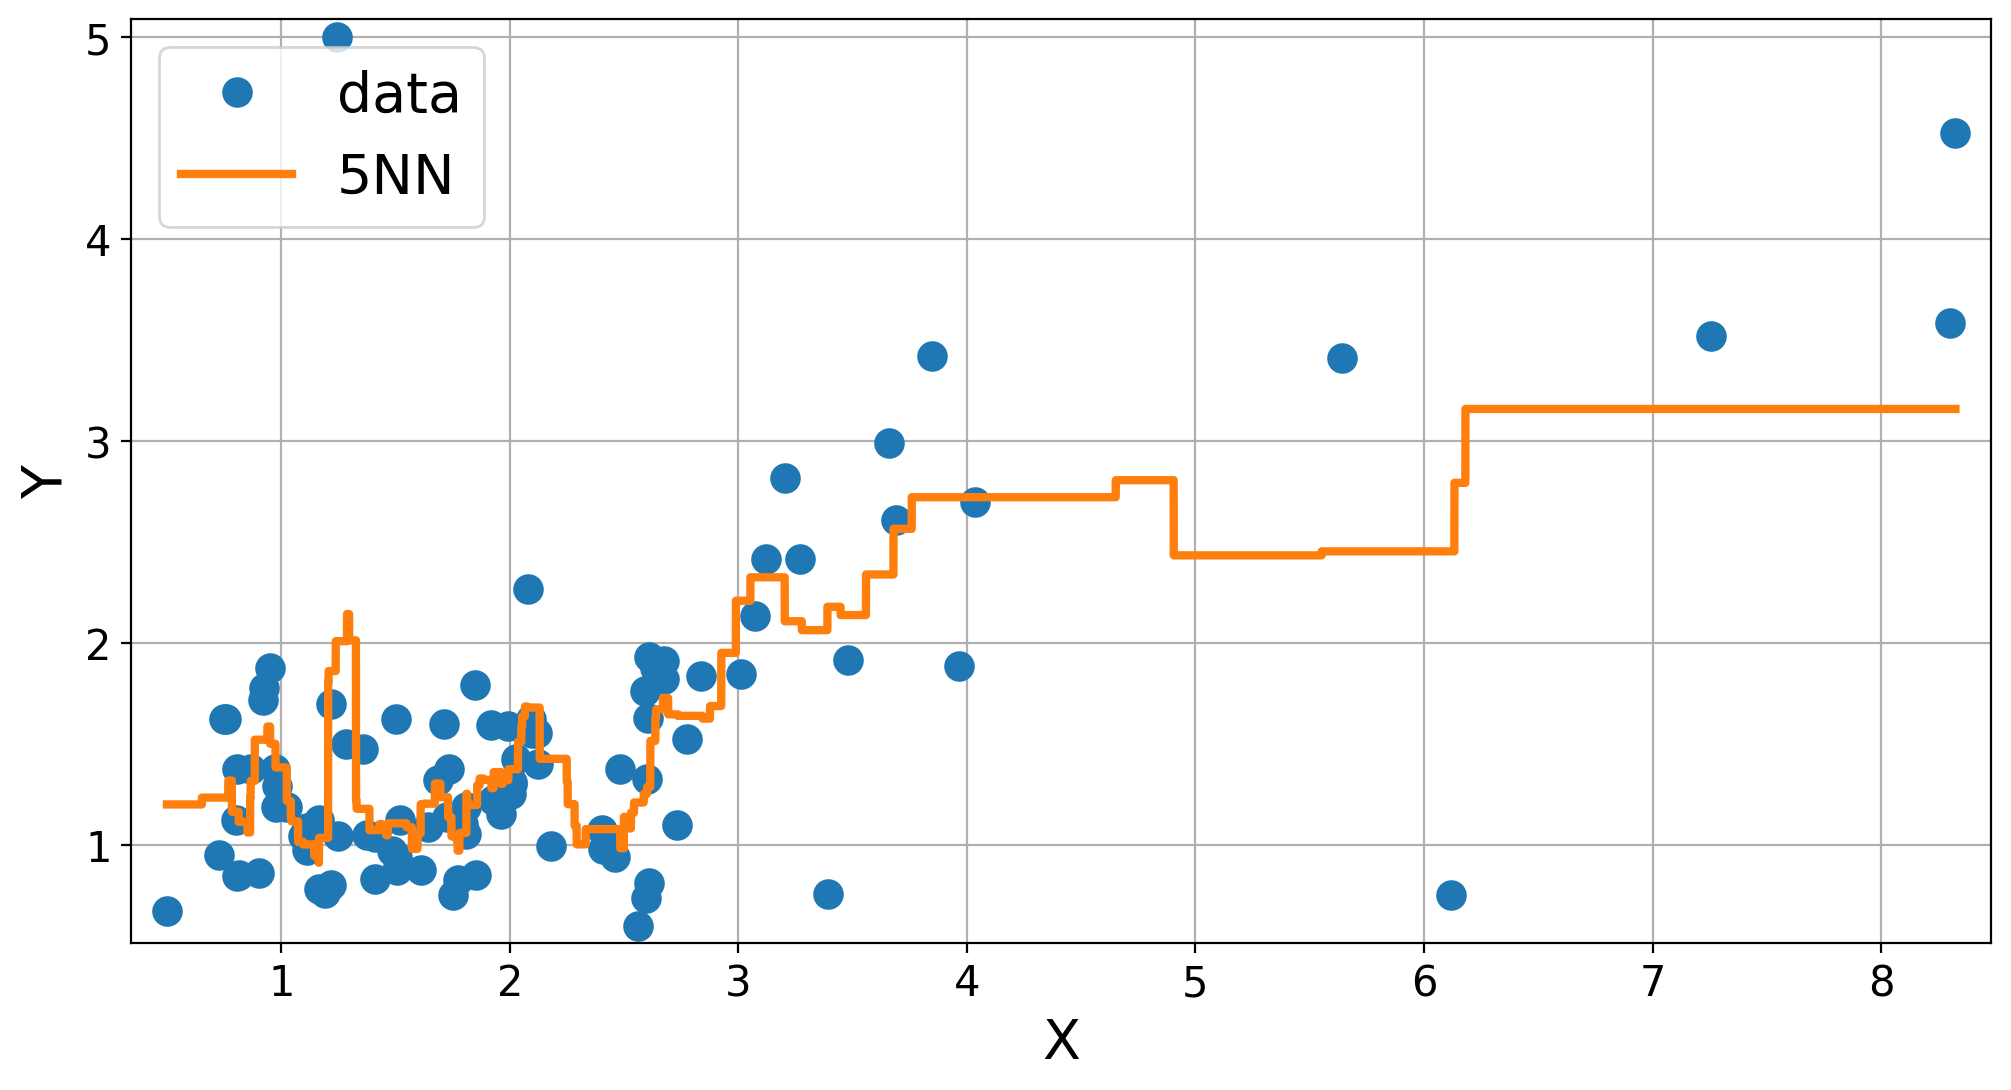

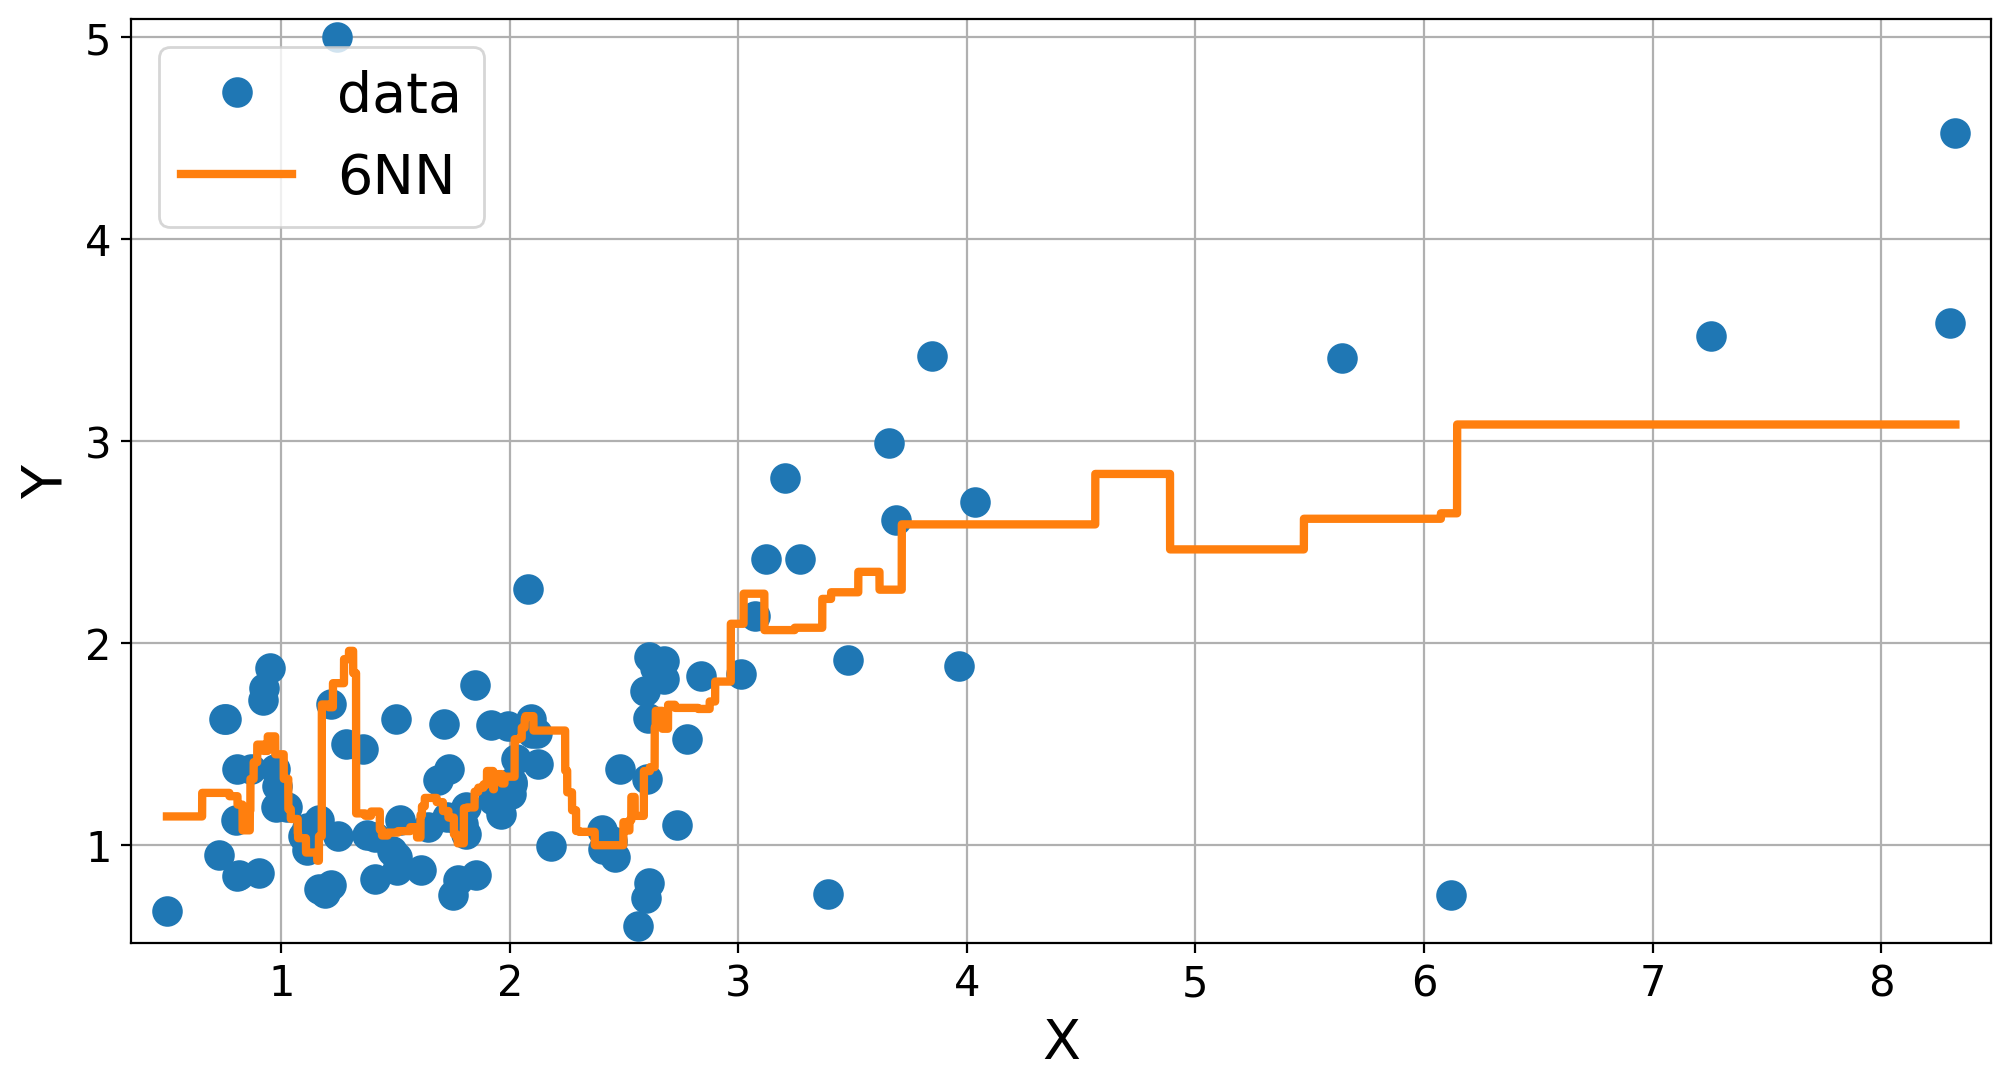

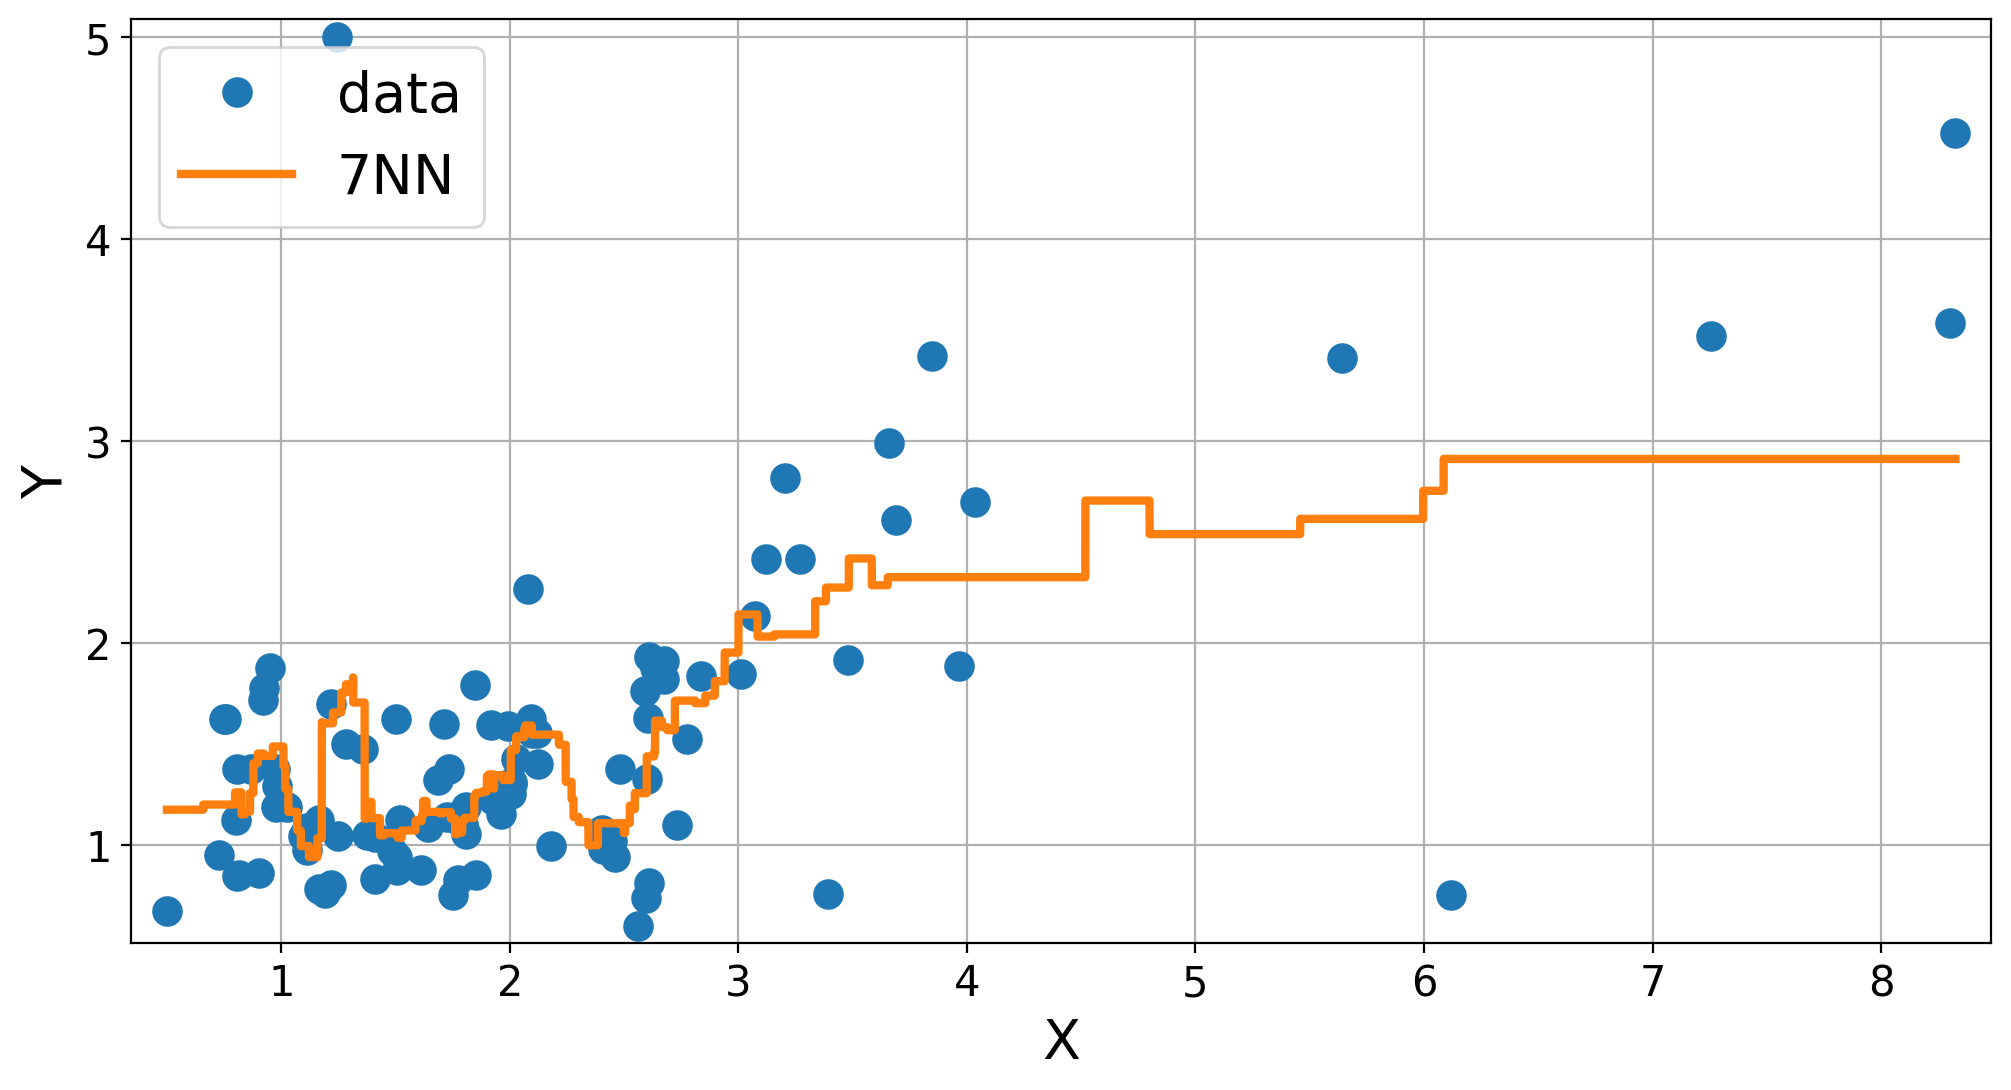

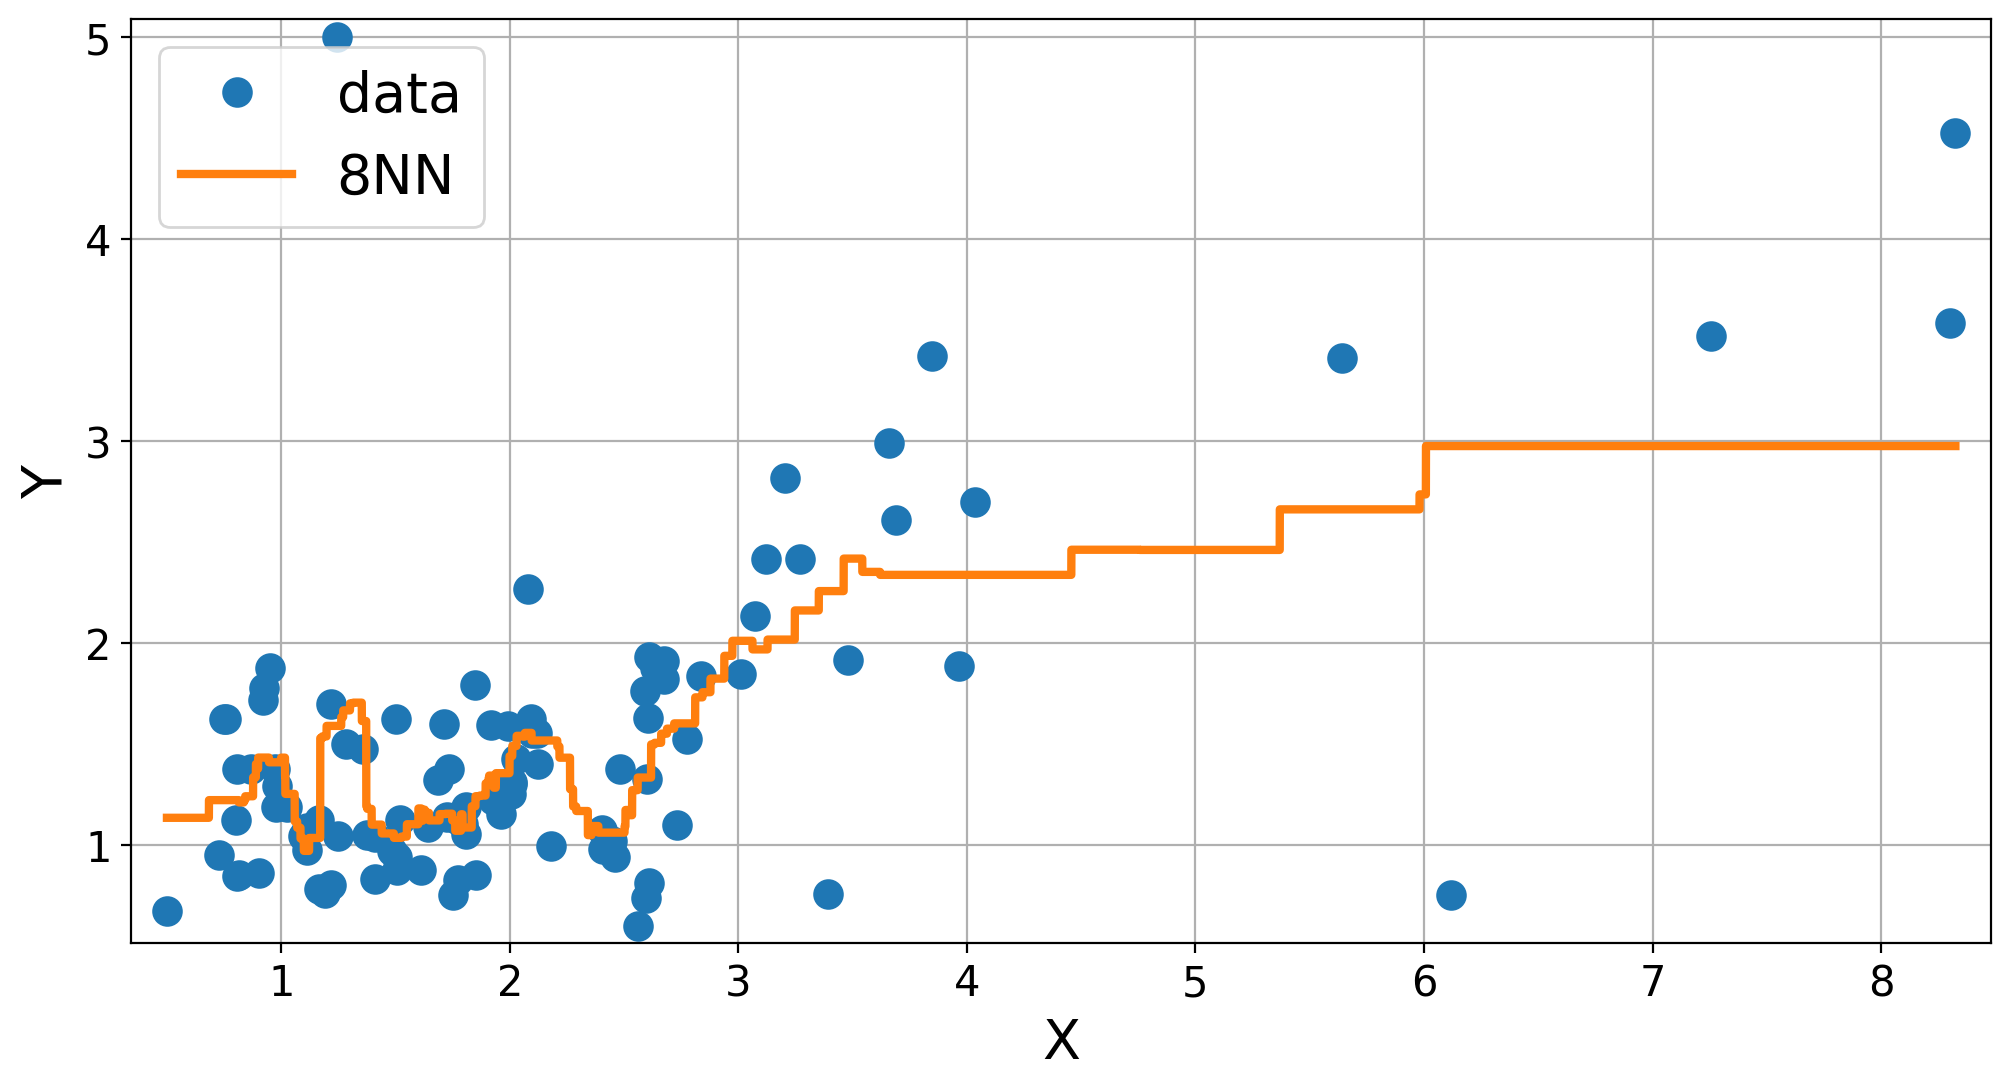

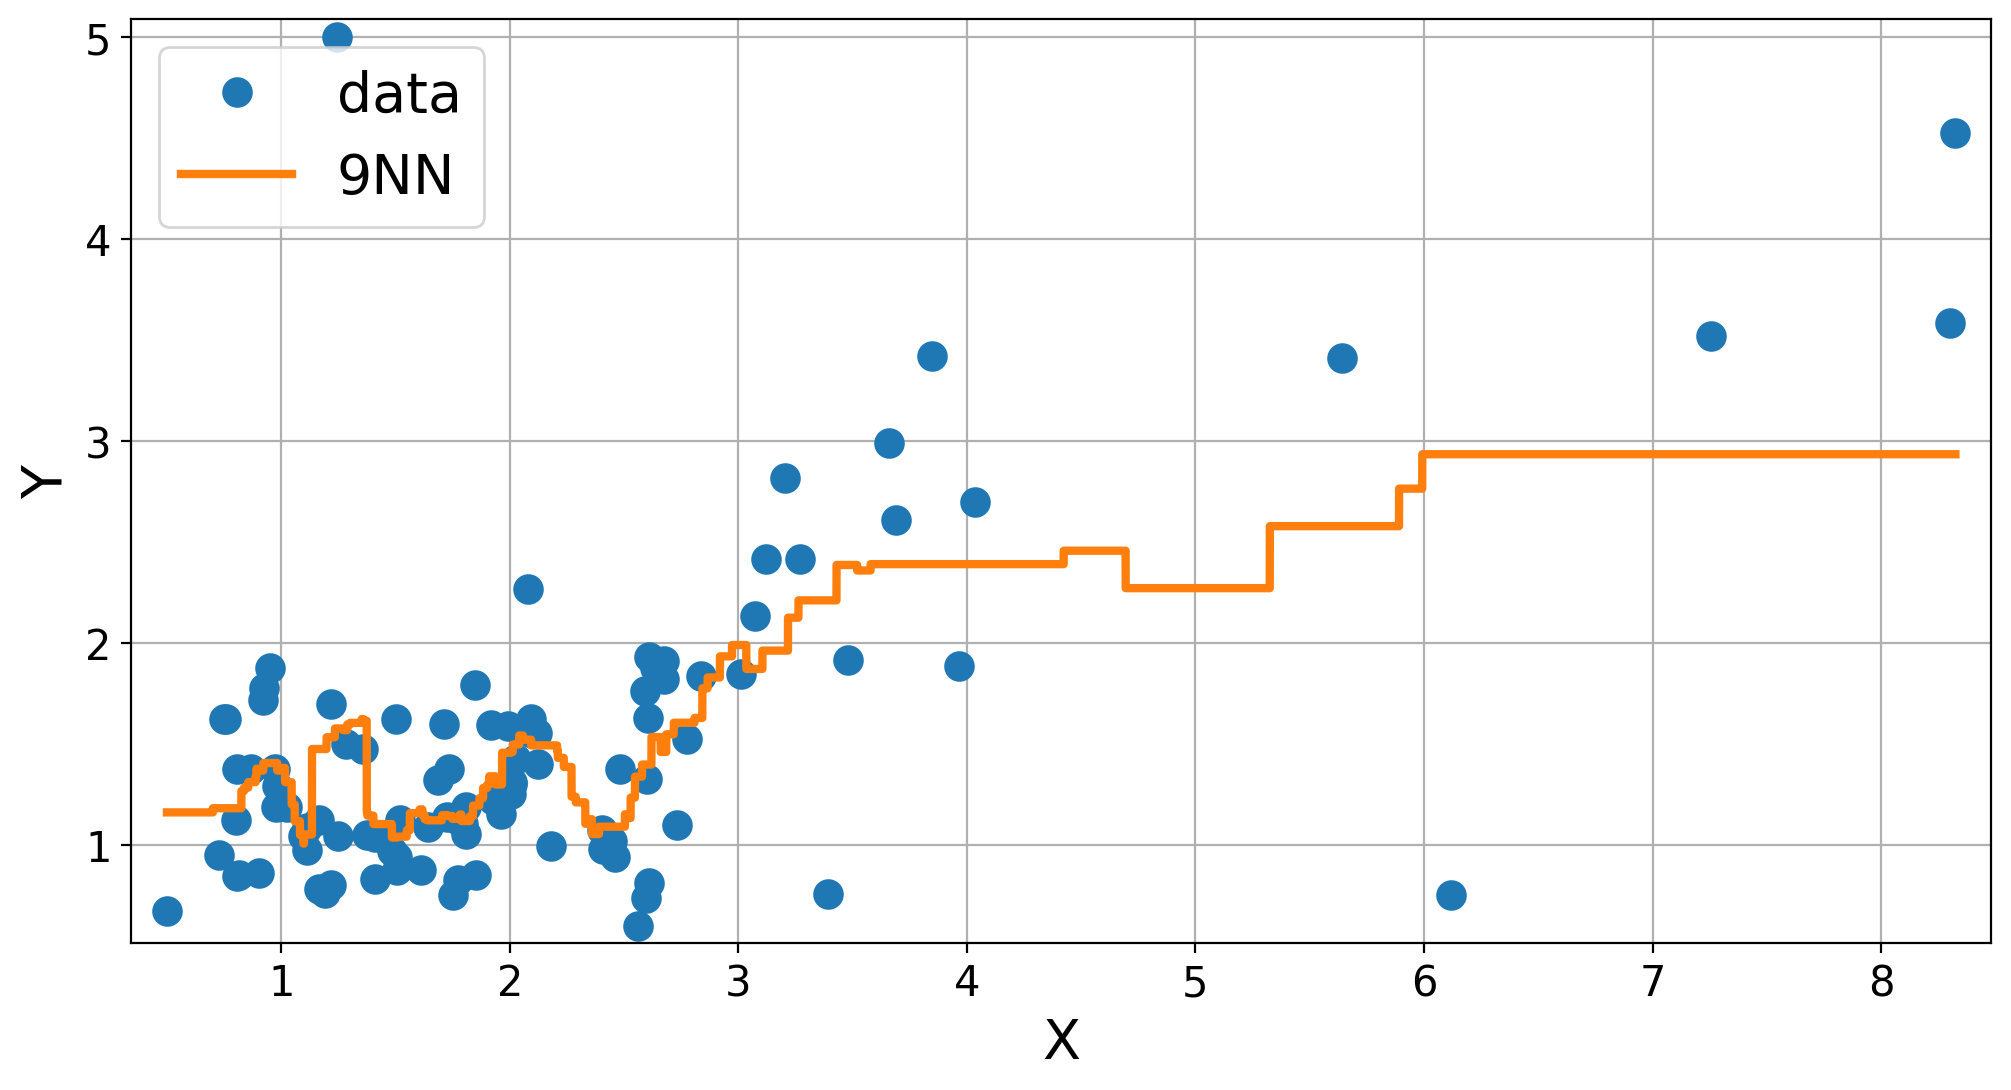

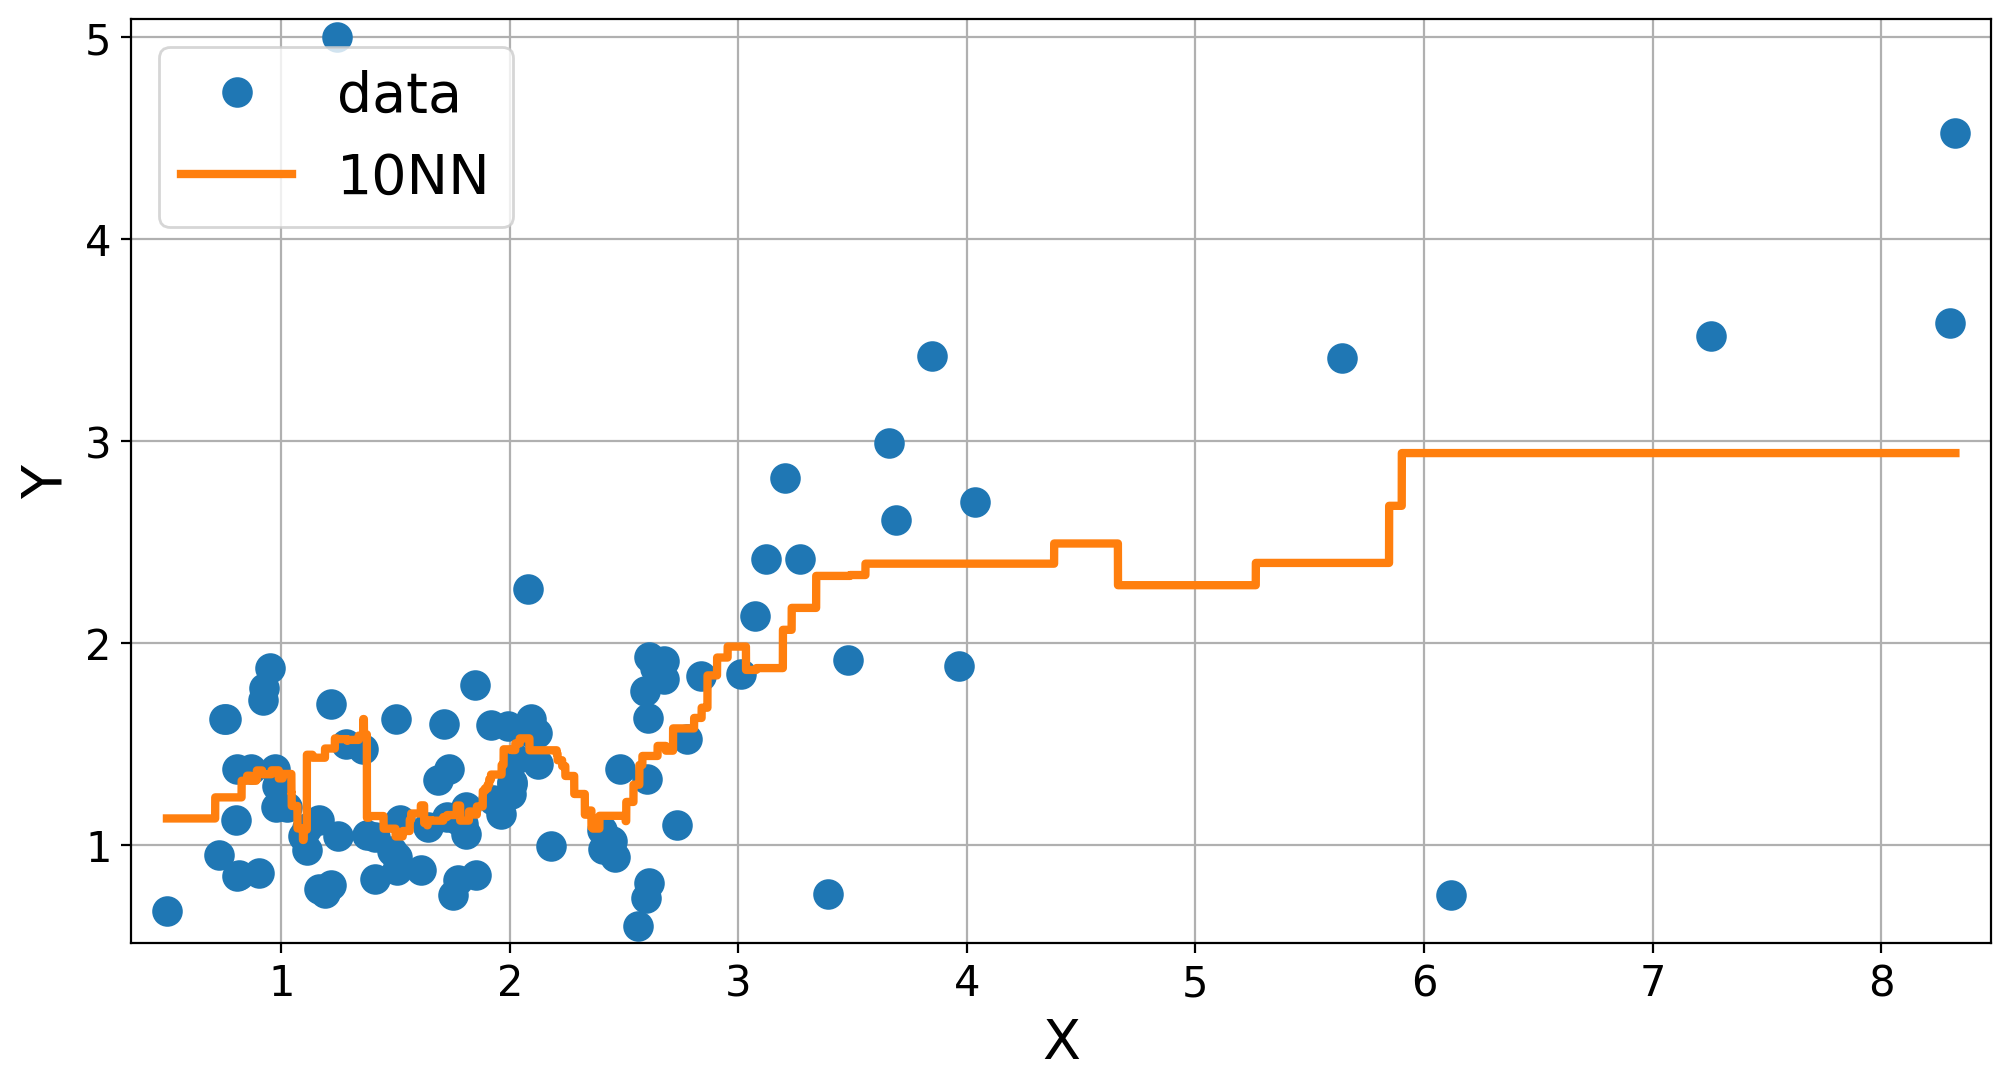

In [31]:
number_neighbors = list(range(1, 11)) # 1, ..., 10 neighbours
for neighbor in number_neighbors:
    # Create Instance
    kNN = neighbors.KNeighborsRegressor(n_neighbors=neighbor) 

    # Fit Model
    kNN.fit(x_data.reshape(-1, 1), y_data)

    # Print Score of Modell
    print("Score of kNN: ", kNN.score(x_data.reshape(-1, 1), y_data))

    plot_res(x_data, y_data, regressor=kNN, labels = [str(kNN.n_neighbors) + "NN"])
    plt.plot()



### **Schritt 7: *Untersuchung: Einfluss von Abstandsmaß auf Score***
#### **Anmerkung**
- Score ist für jeden Abstandsmaß gleich, da Dimension der Eingabewerte 1 ist
---> Begründung: die p-te Wurzel aus (xi - xj) ** p hebt sich auf: p-te Wurzel und p ist 1 
- Dimension der Daten hat großen Einfluss auf Abstandsmaß


Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594
Score of kNN:  0.7153101261075594


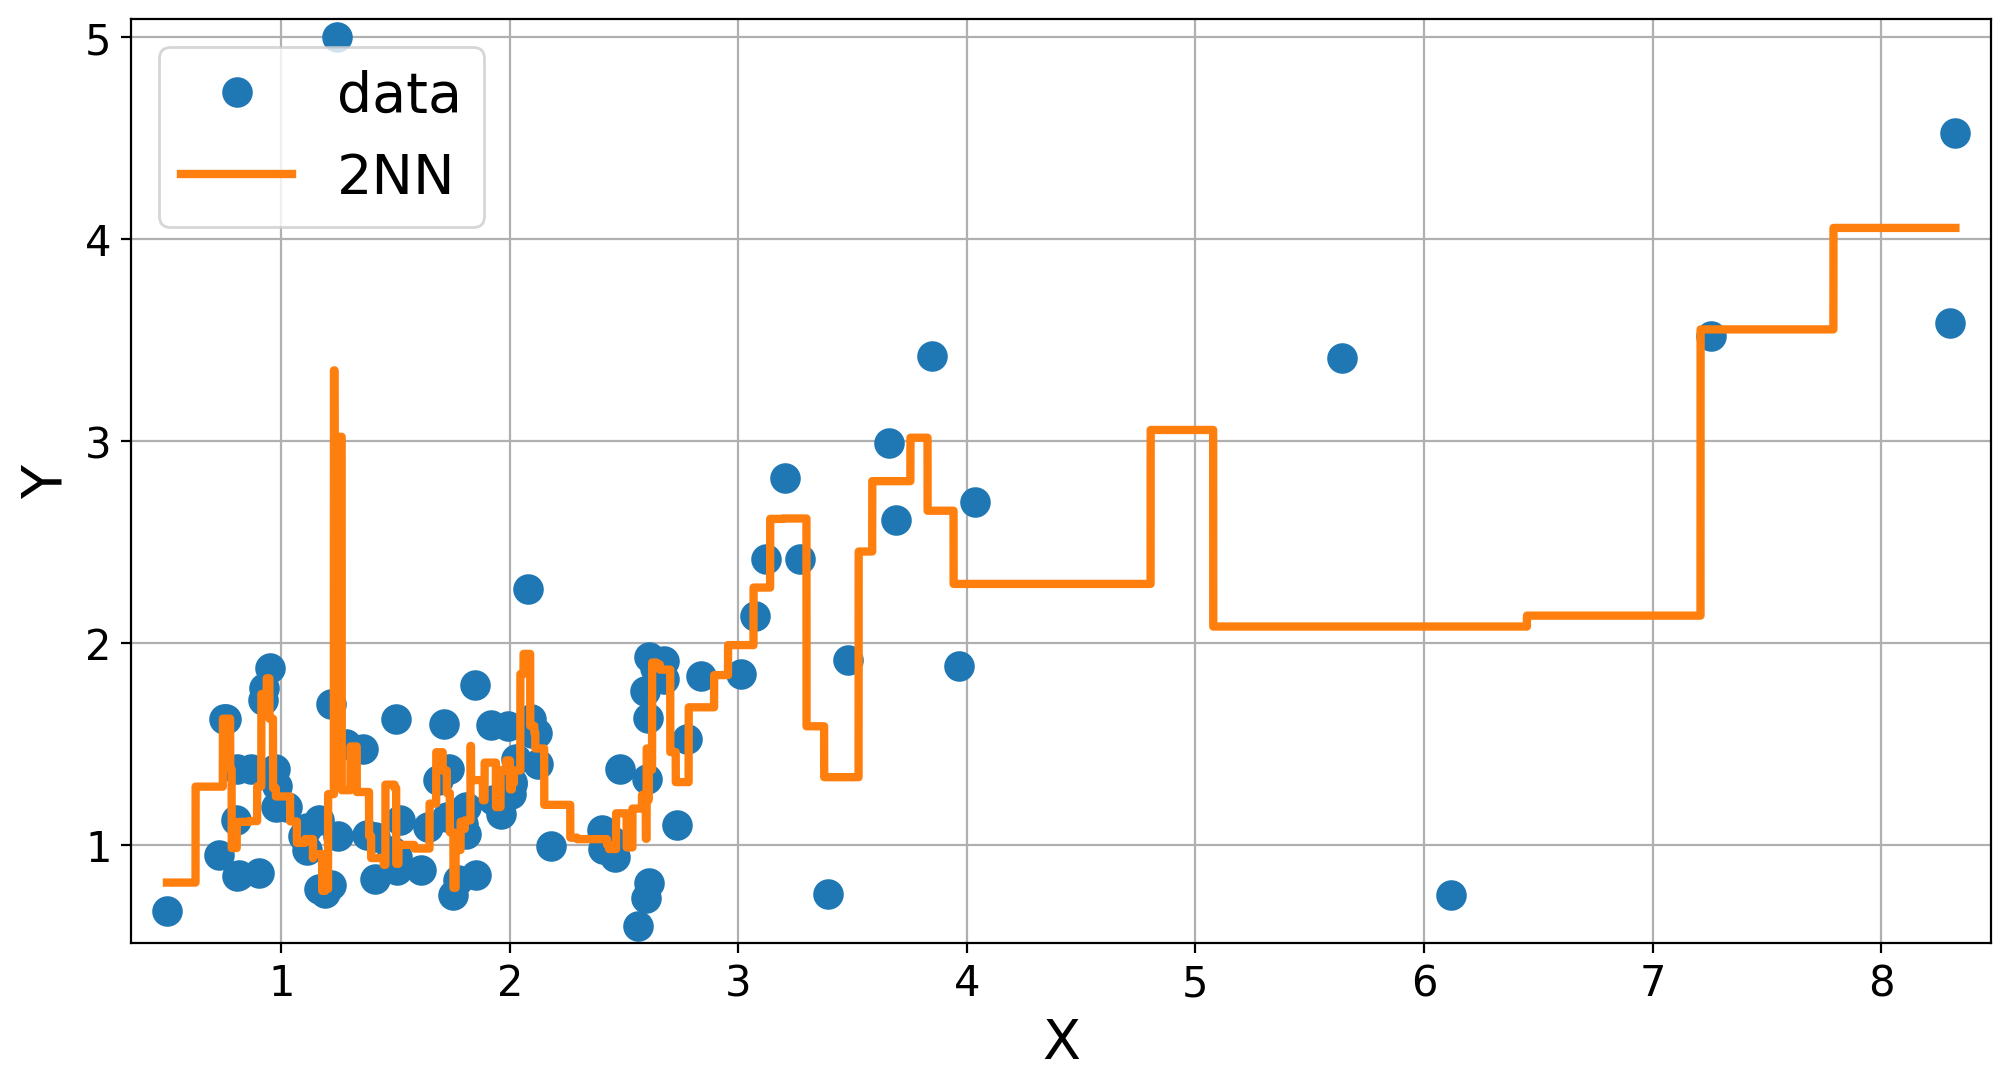

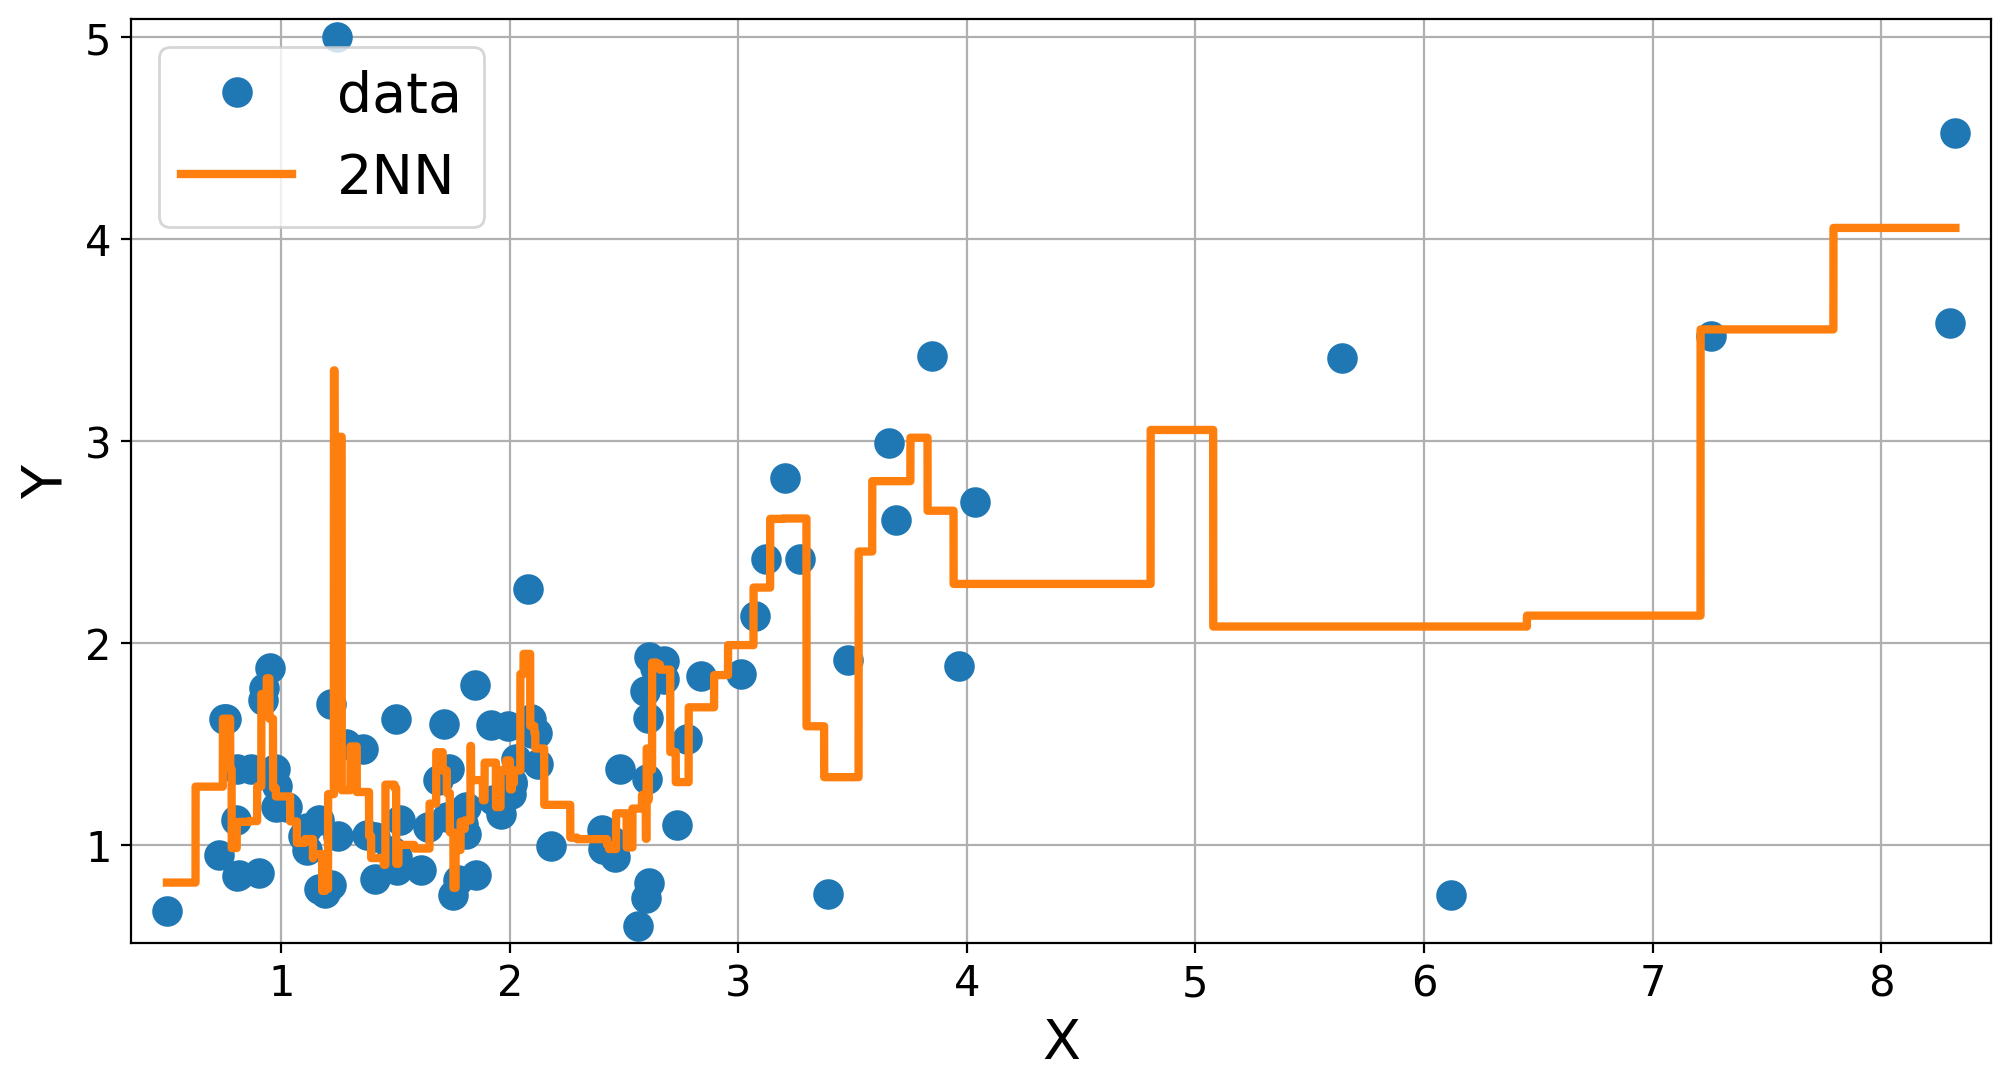

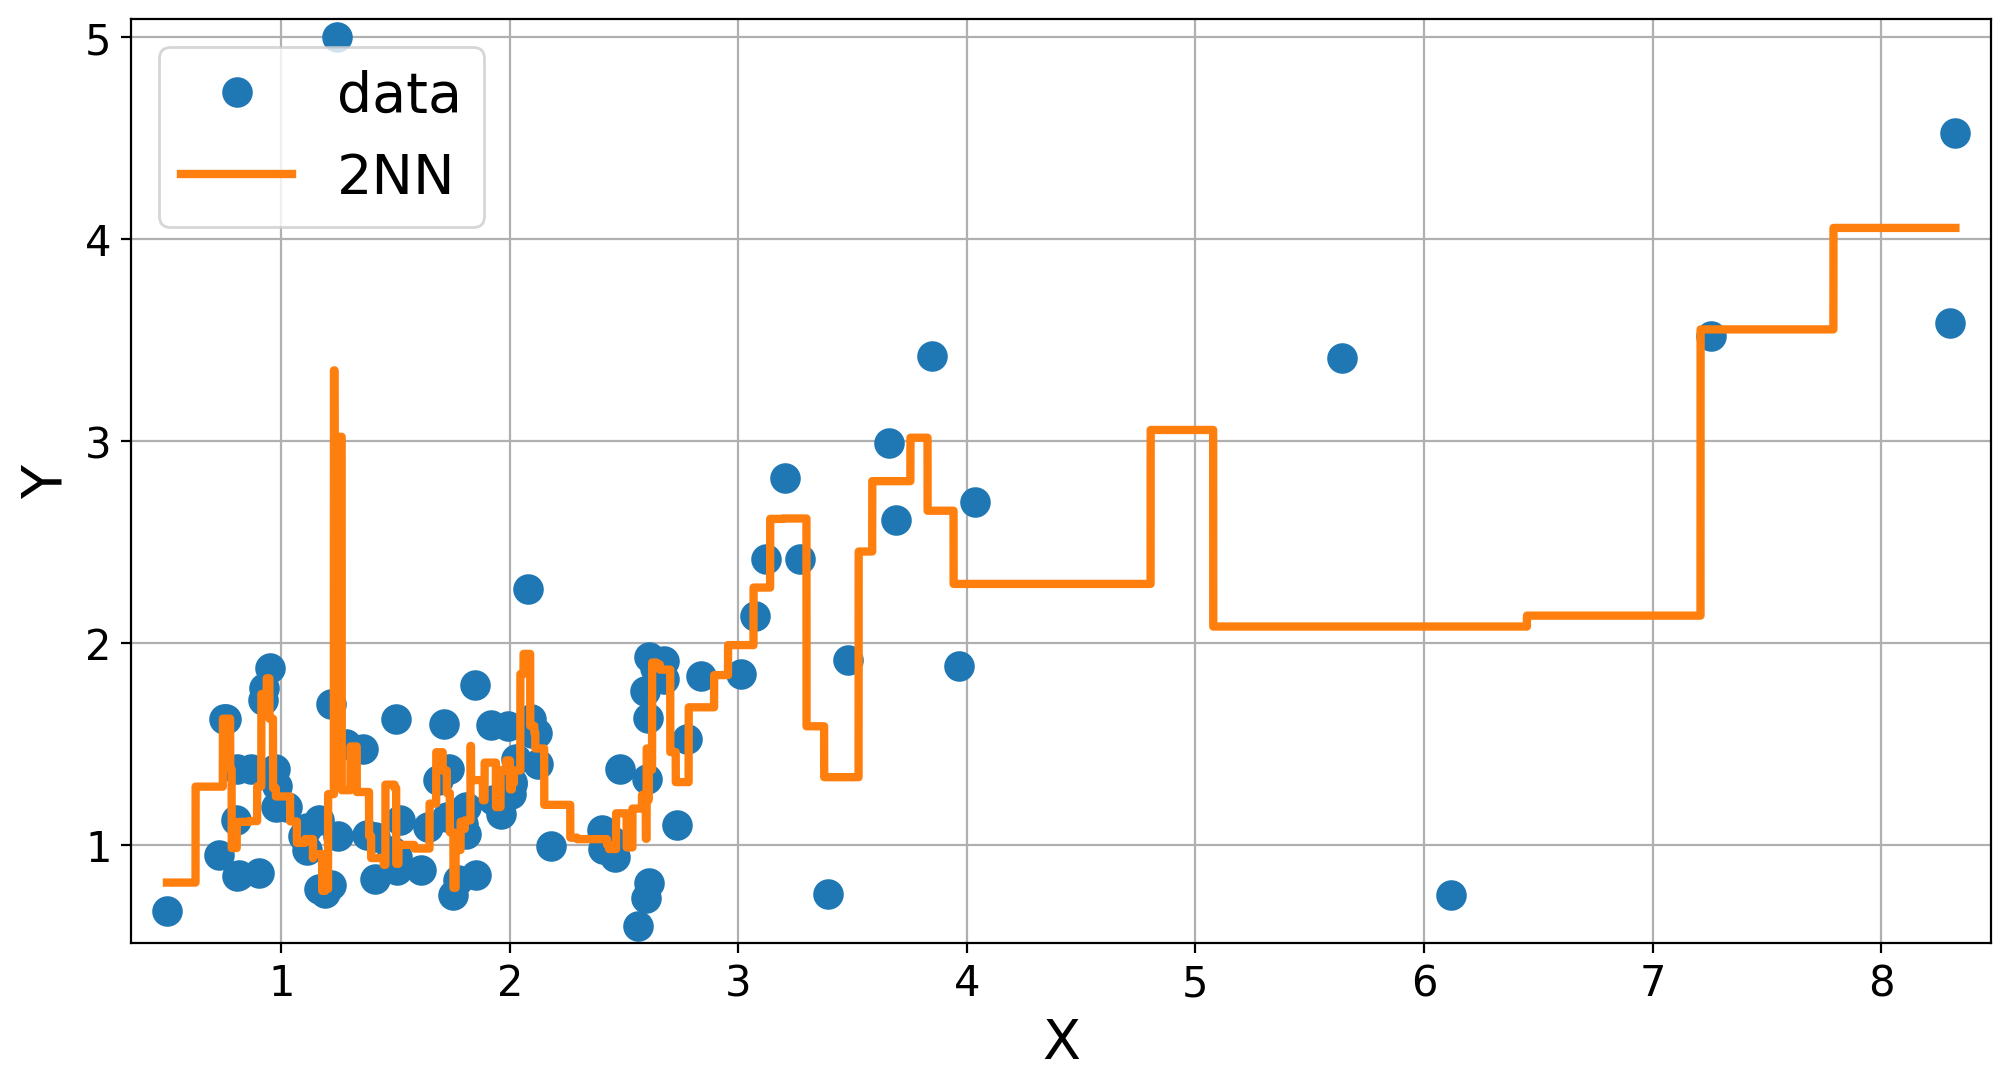

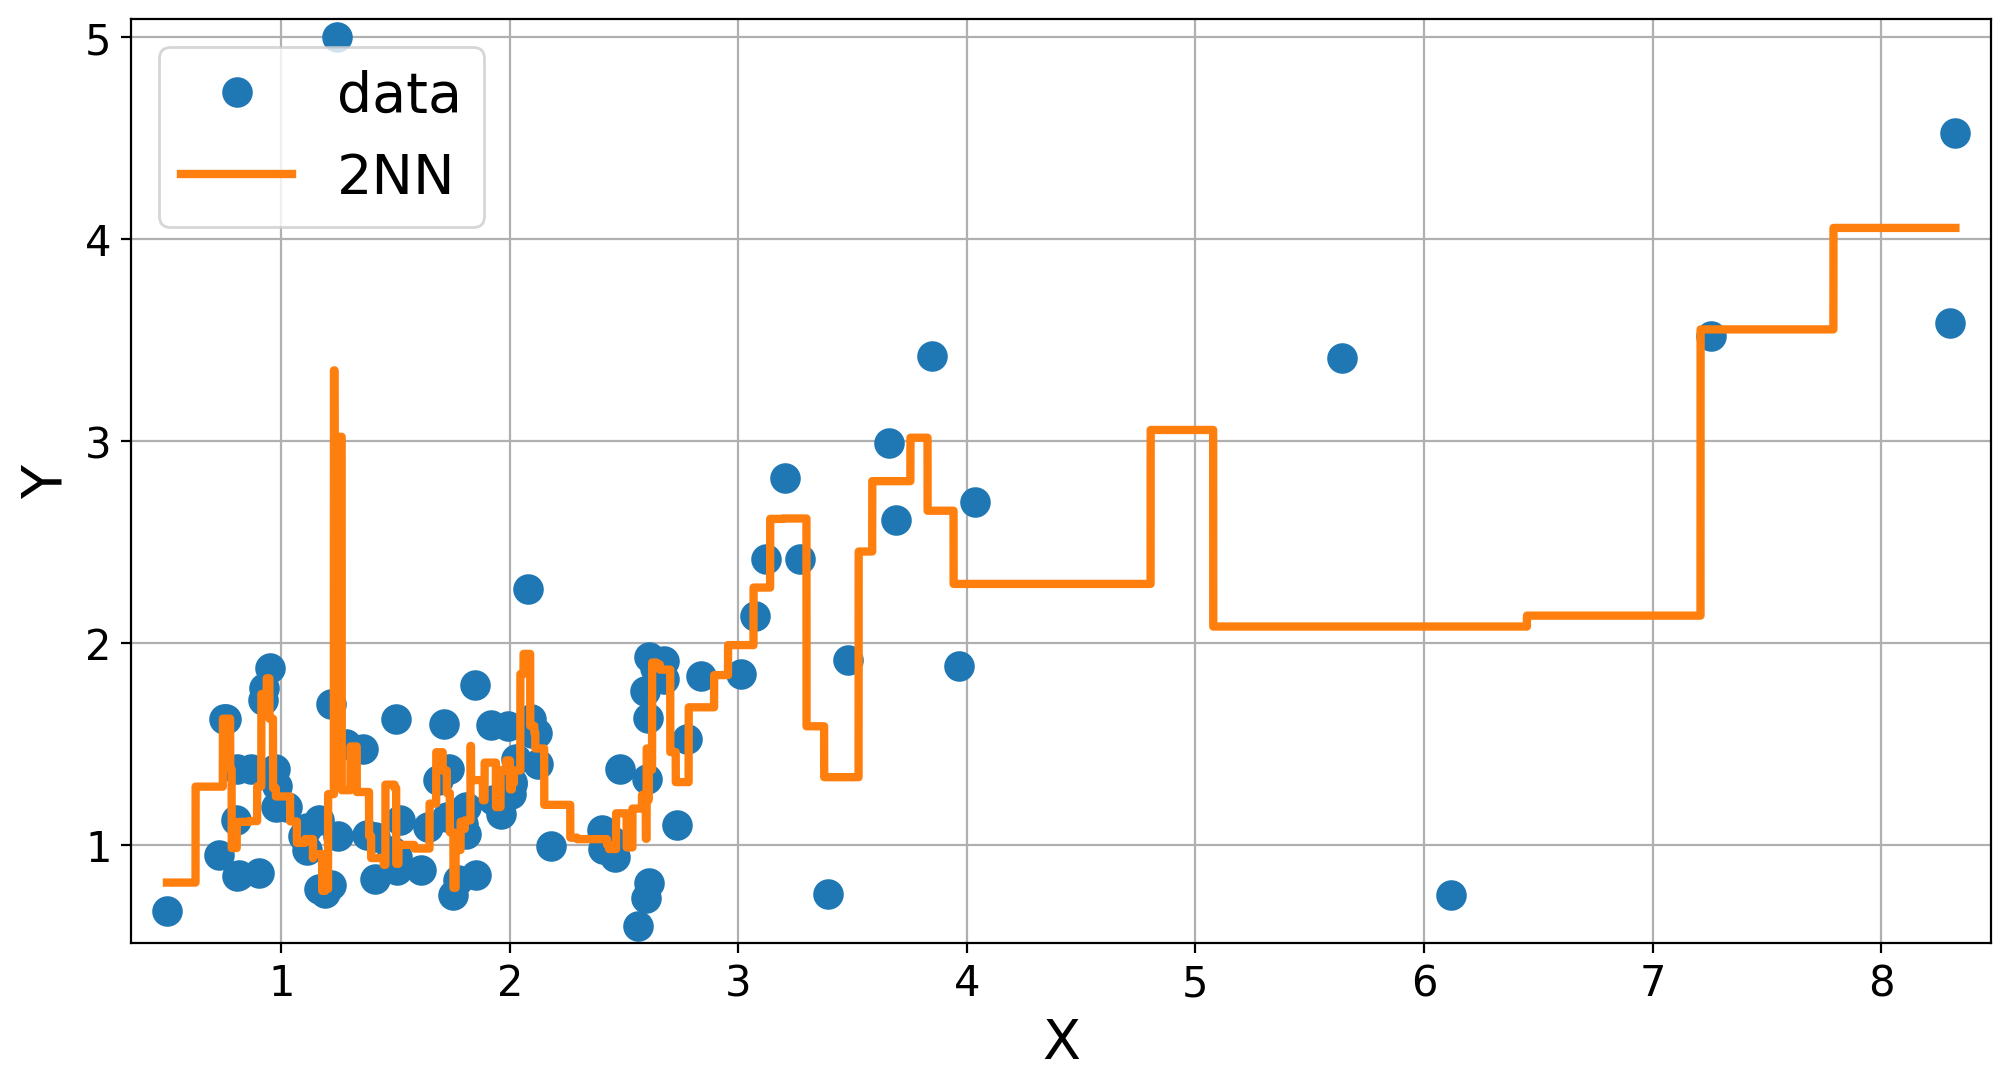

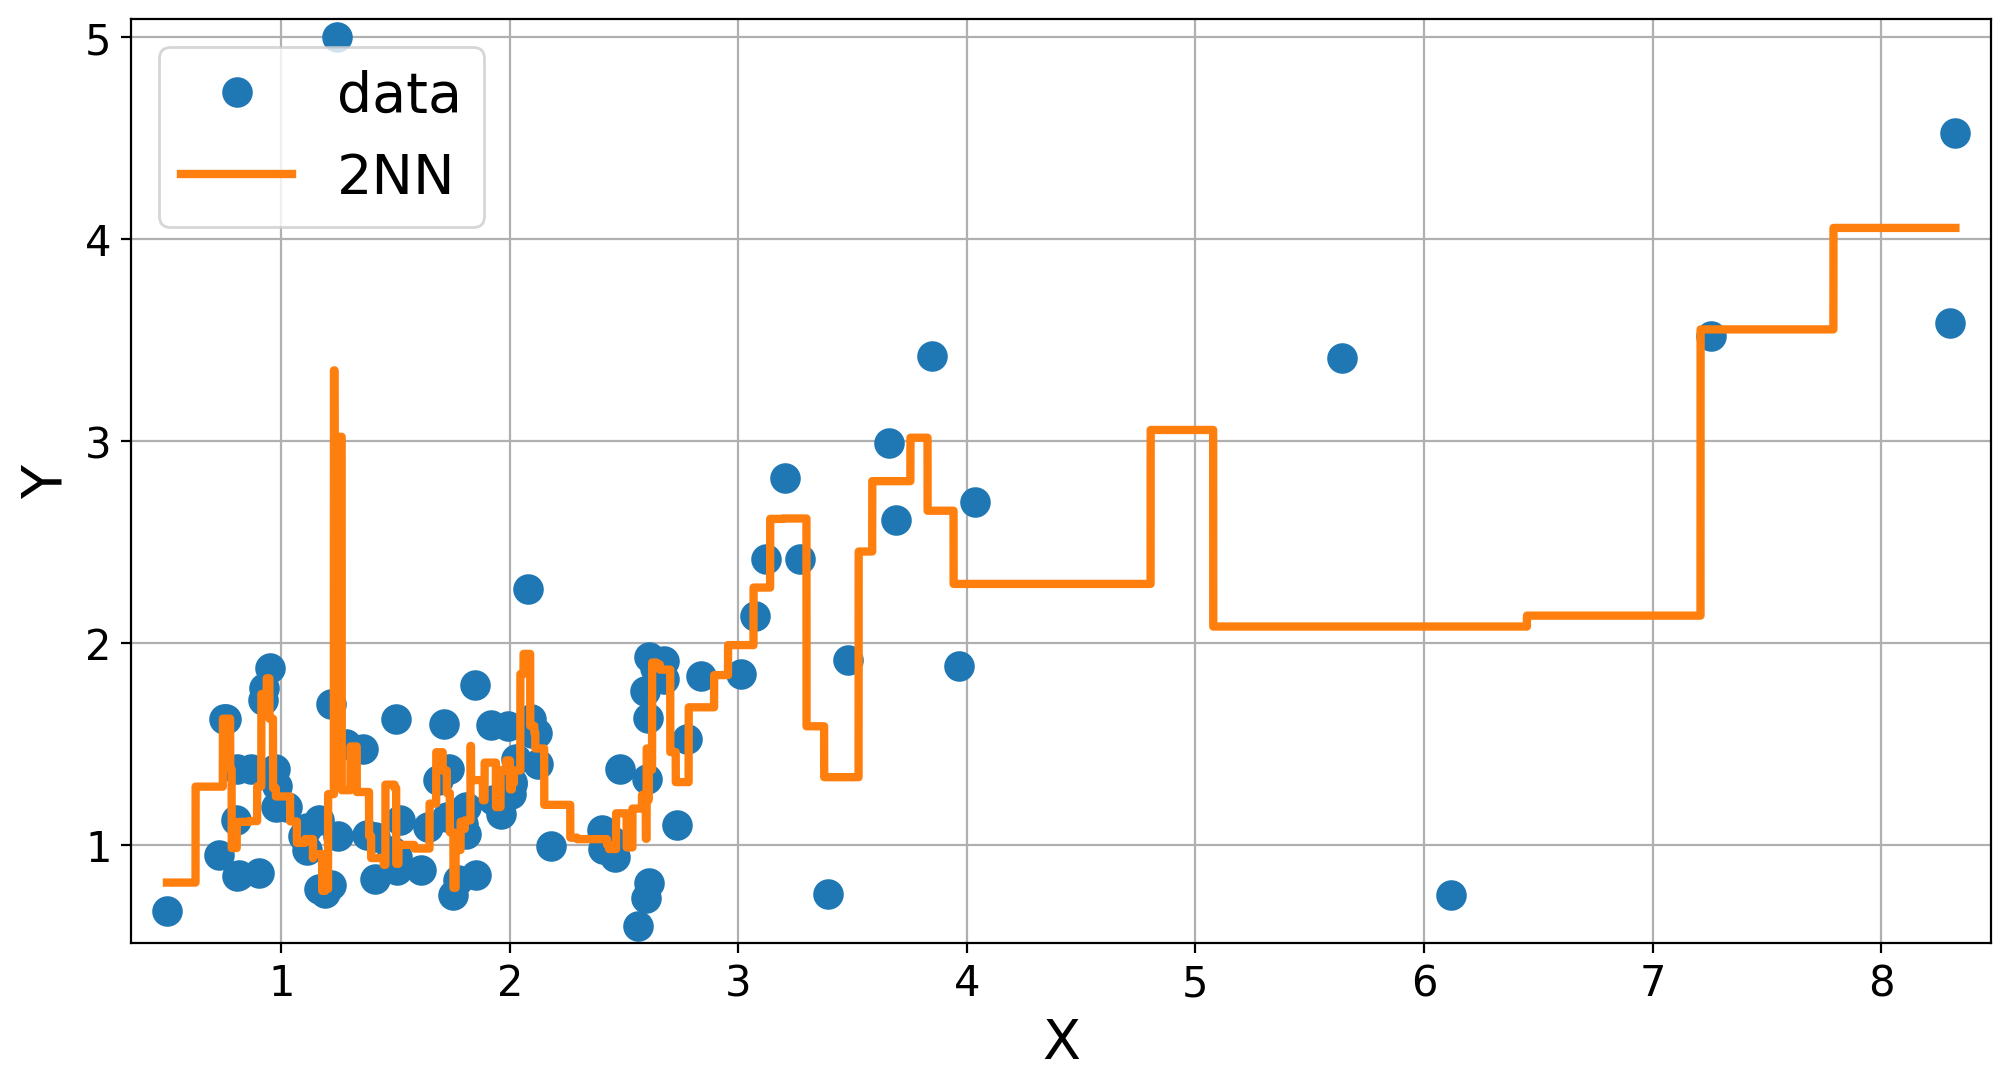

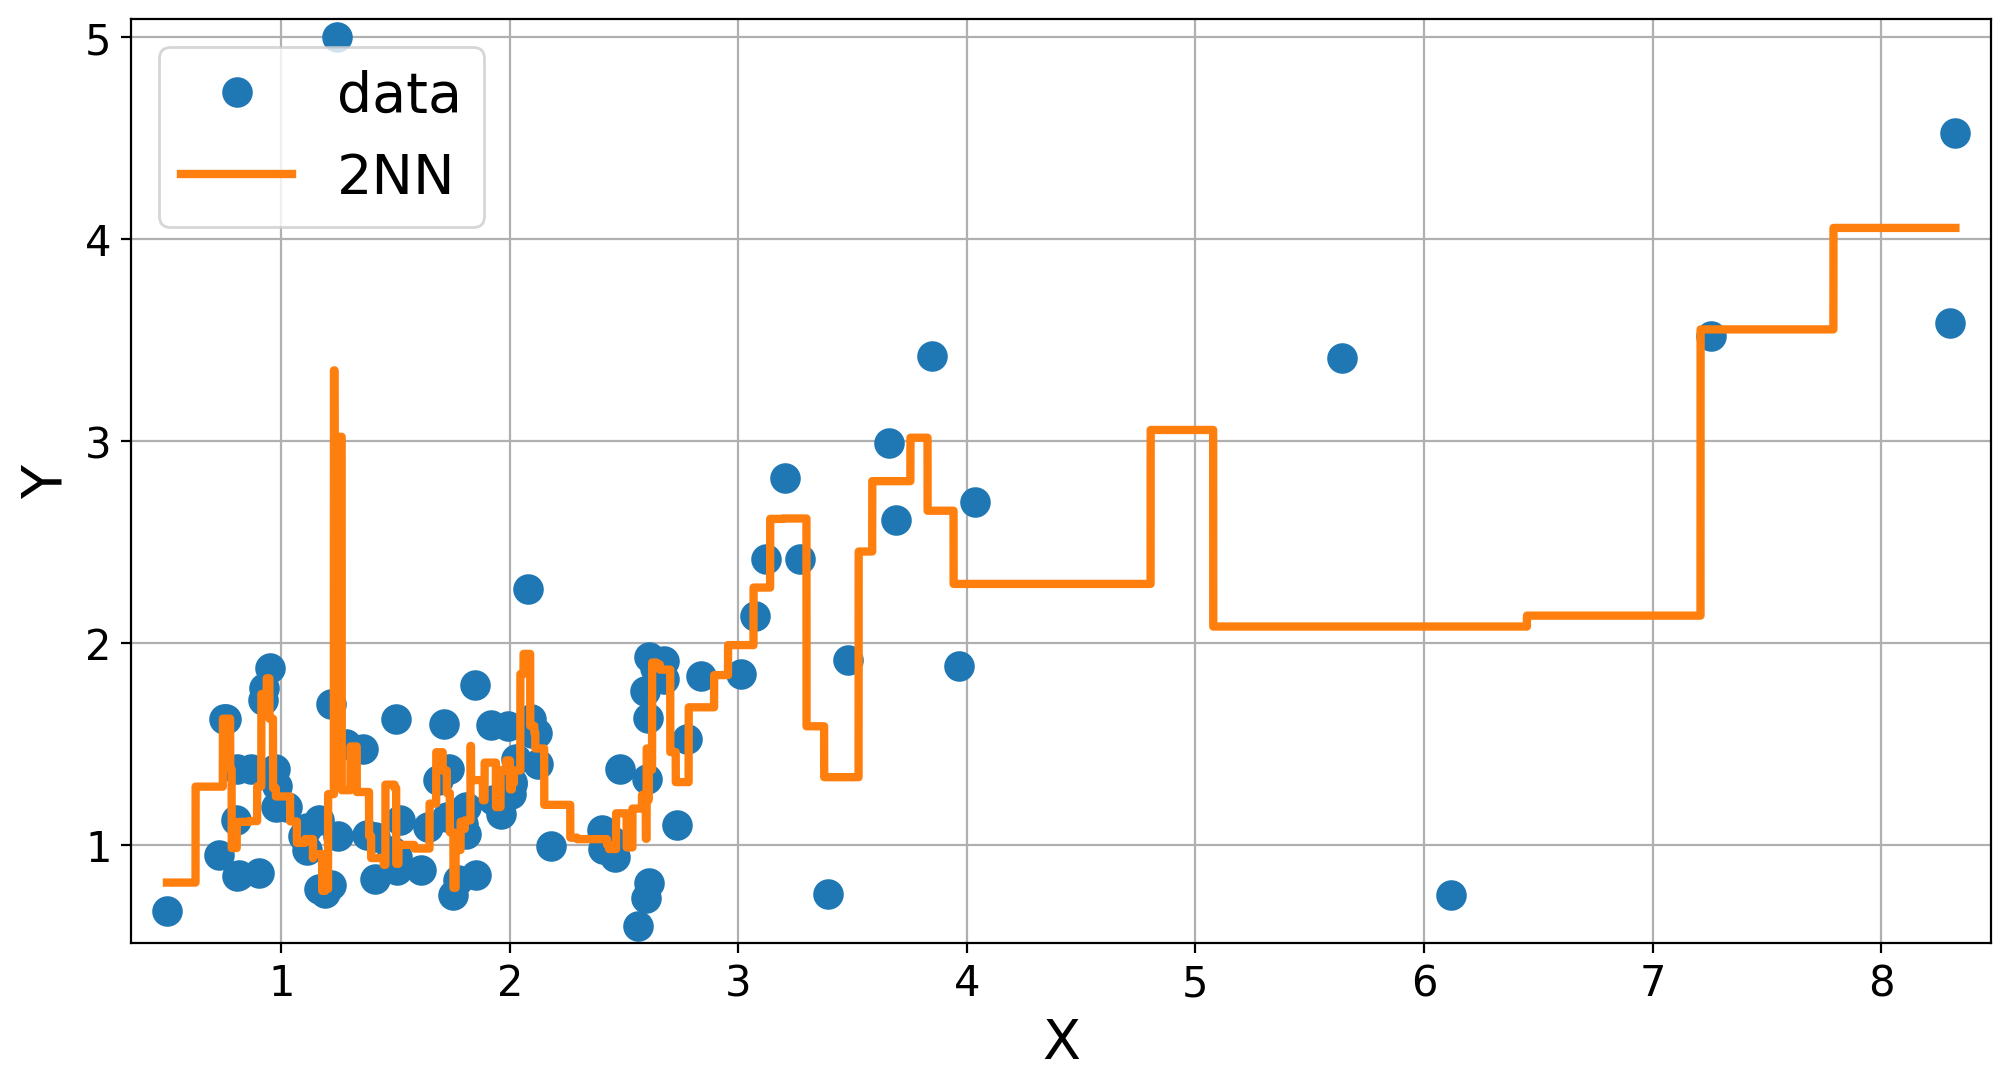

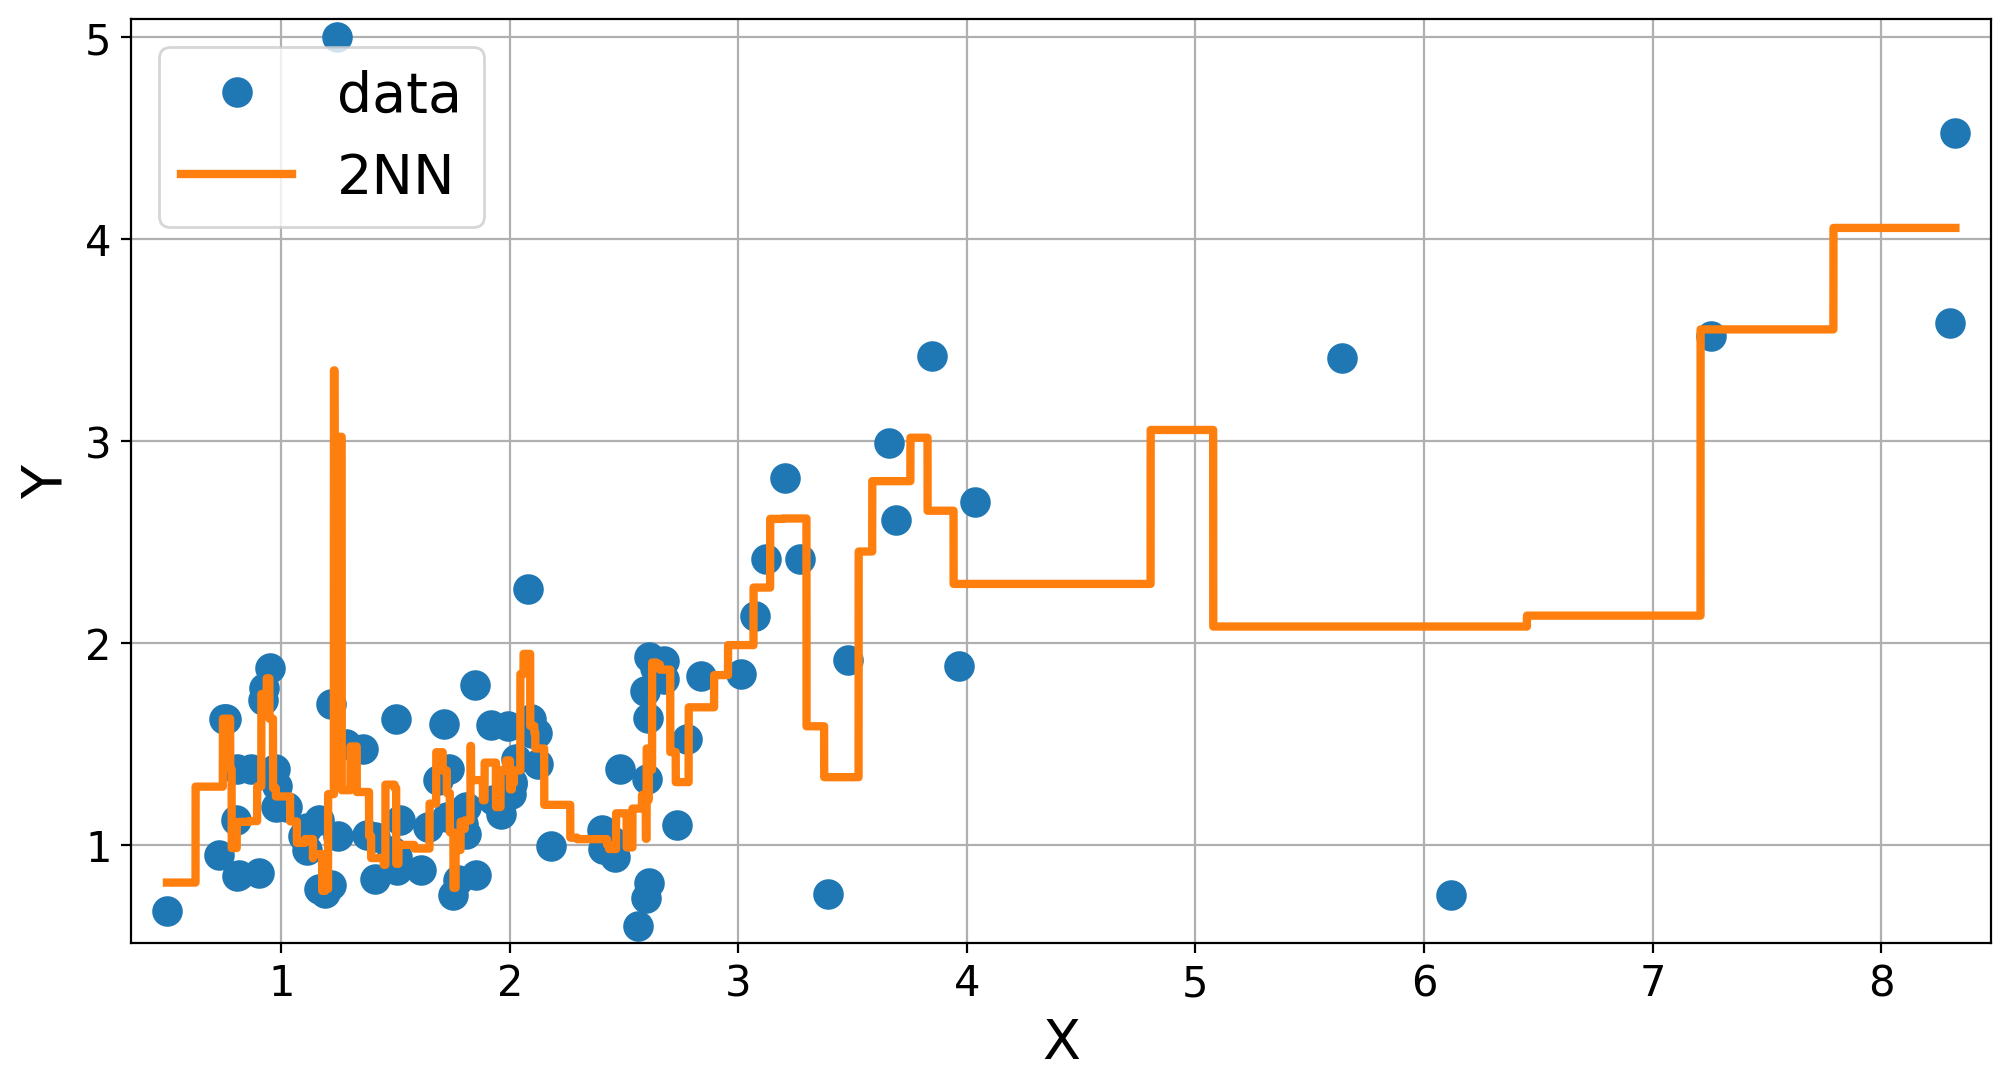

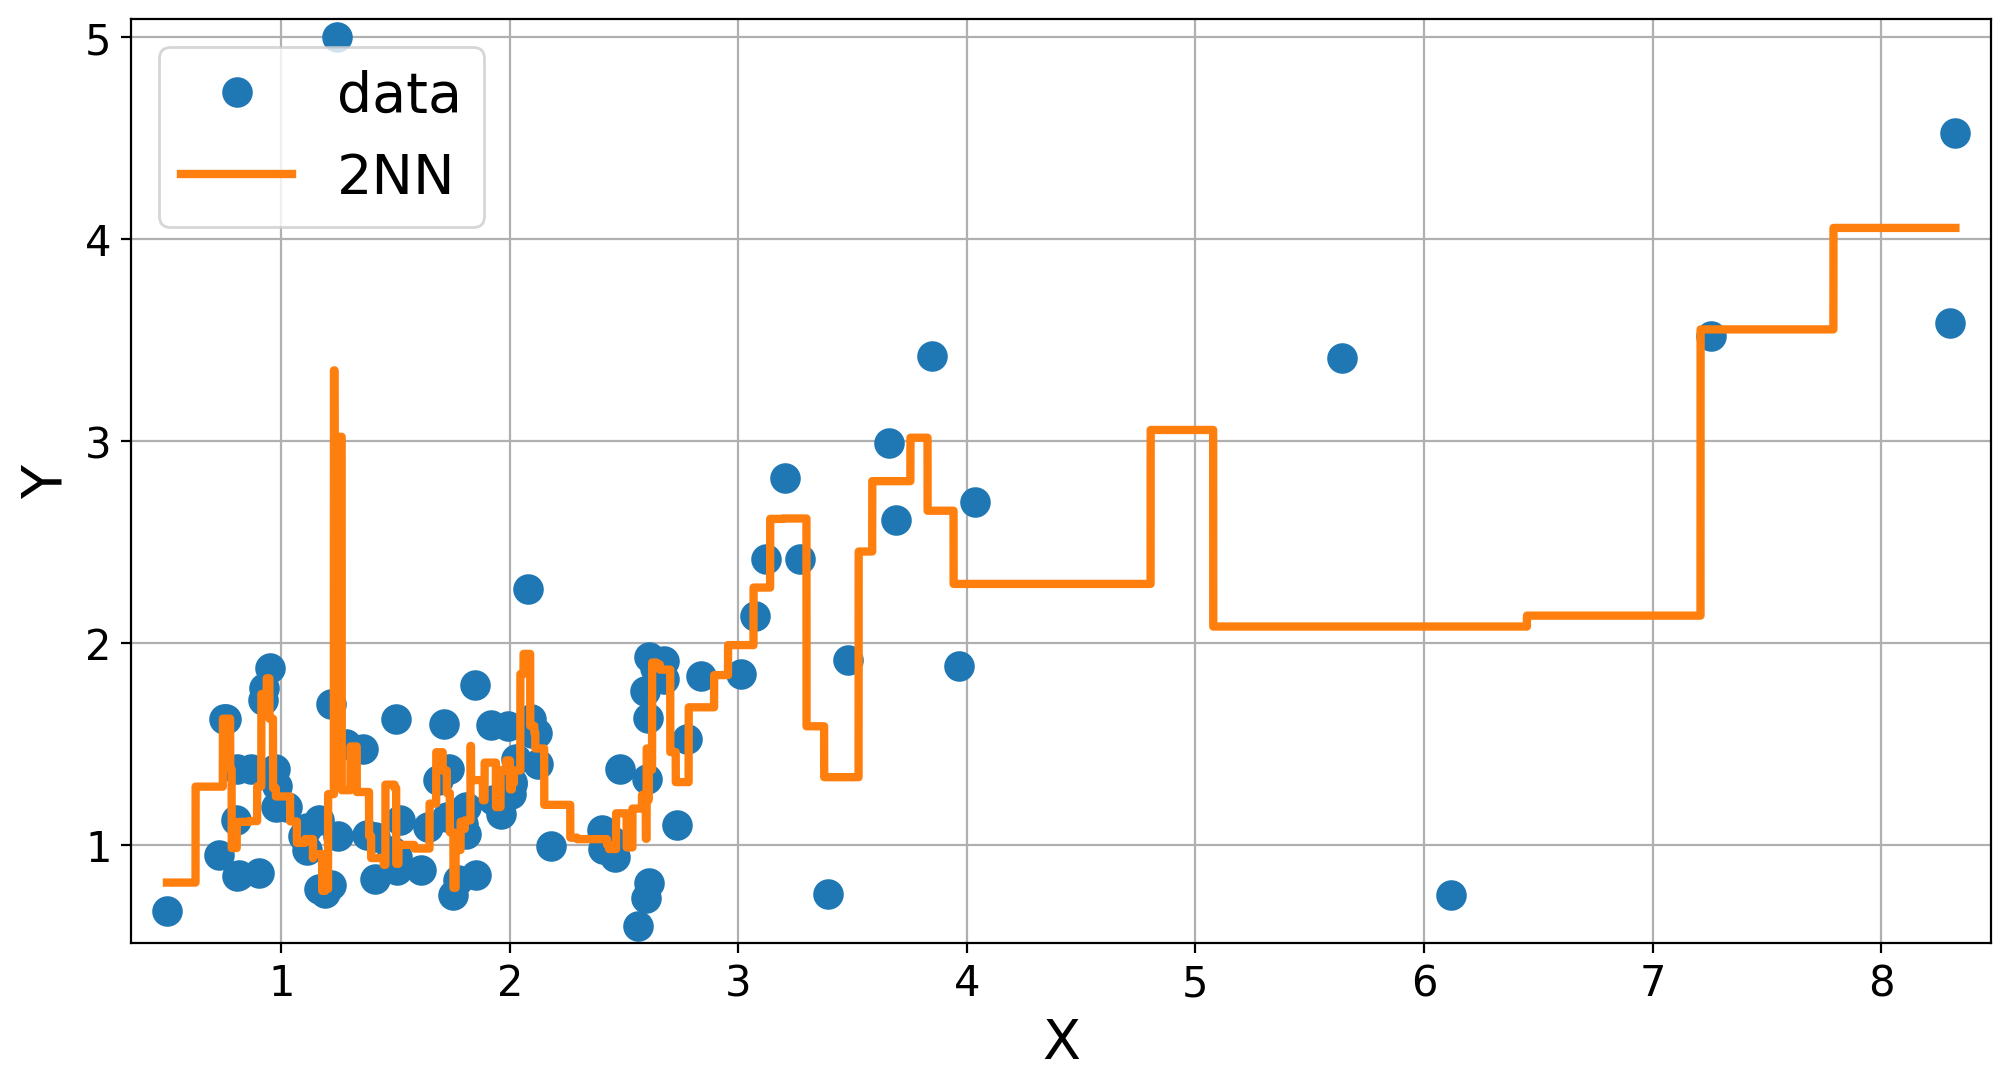

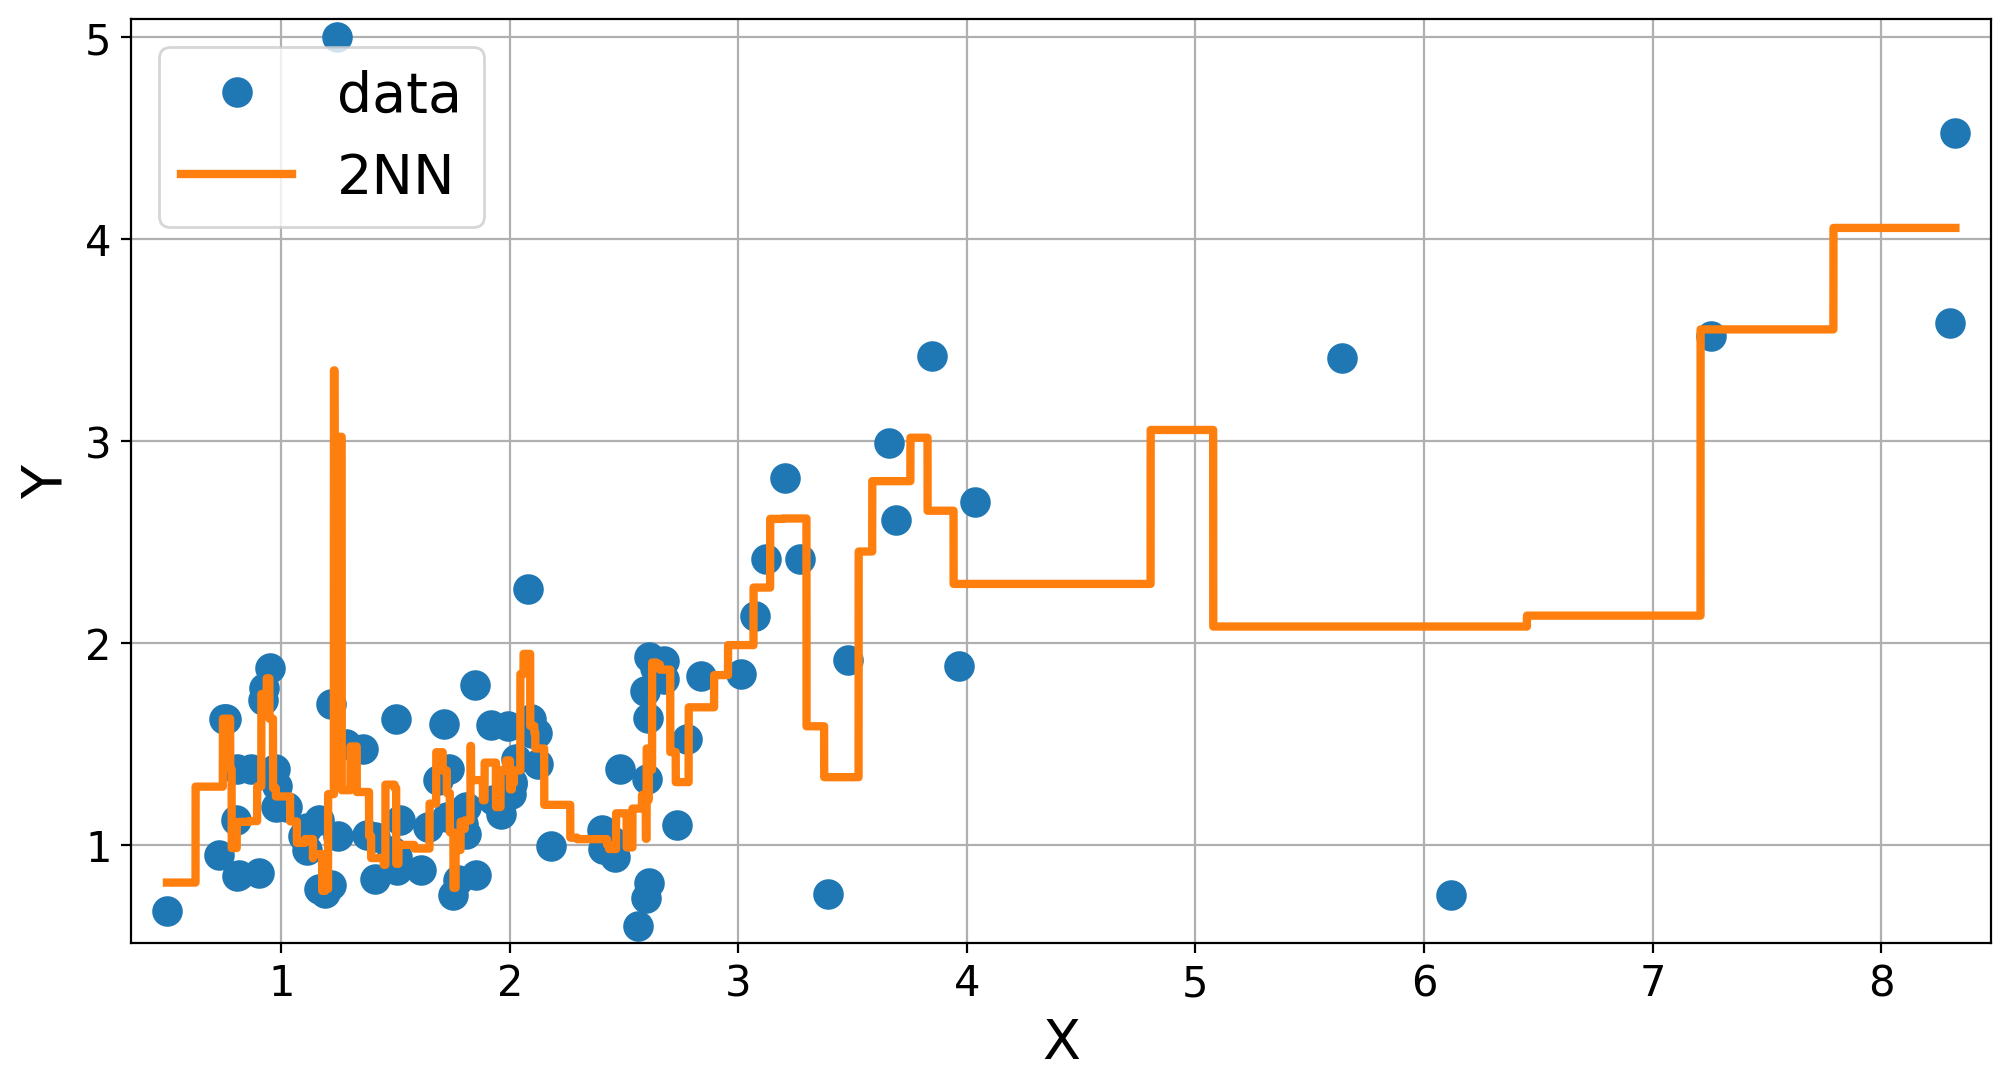

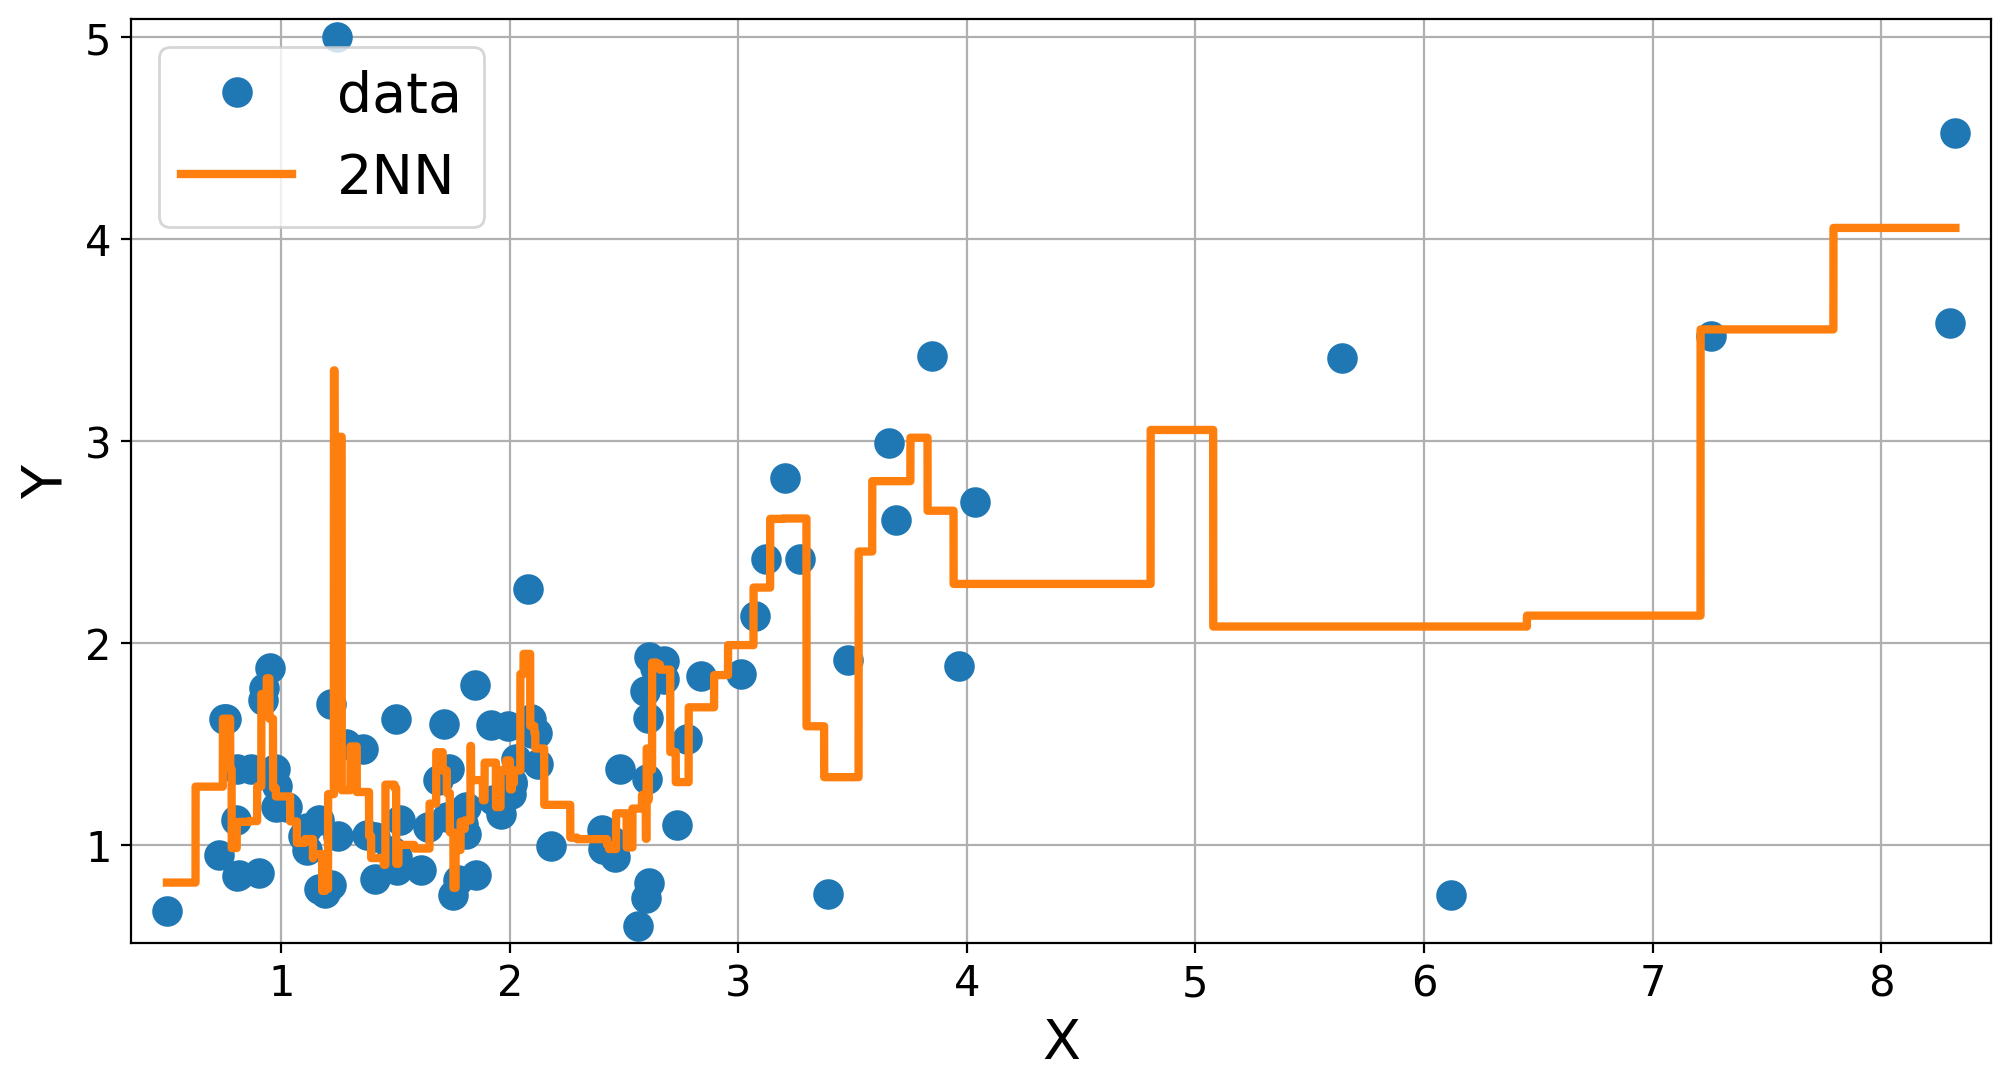

In [34]:
distance_numbers = list(range(1, 11)) # 1, ..., 10 
for d in distance_numbers:
    # Create Instance
    kNN = neighbors.KNeighborsRegressor(n_neighbors=2, p = d) 

    # Fit Model
    kNN.fit(x_data.reshape(-1, 1), y_data)

    # Print Score of Modell
    print("Score of kNN: ", kNN.score(x_data.reshape(-1, 1), y_data))

    plot_res(x_data, y_data, regressor=kNN, labels = [str(kNN.n_neighbors) + "NN"])
    plt.plot()



### **Schritt 8: *Untersuchung: Einfluss von Anzahl Nachbarn auf Score mit gesamten Datensatz***


Score of kNN:  0.6349605889786603
Score of kNN:  0.6394051513979251
Score of kNN:  0.6128840490215945
Score of kNN:  0.5919051781470035
Score of kNN:  0.5775790205173656
Score of kNN:  0.5659881581775477
Score of kNN:  0.5568409770449103
Score of kNN:  0.5485688335325594
Score of kNN:  0.5419098656009403
Score of kNN:  0.5372297133038951


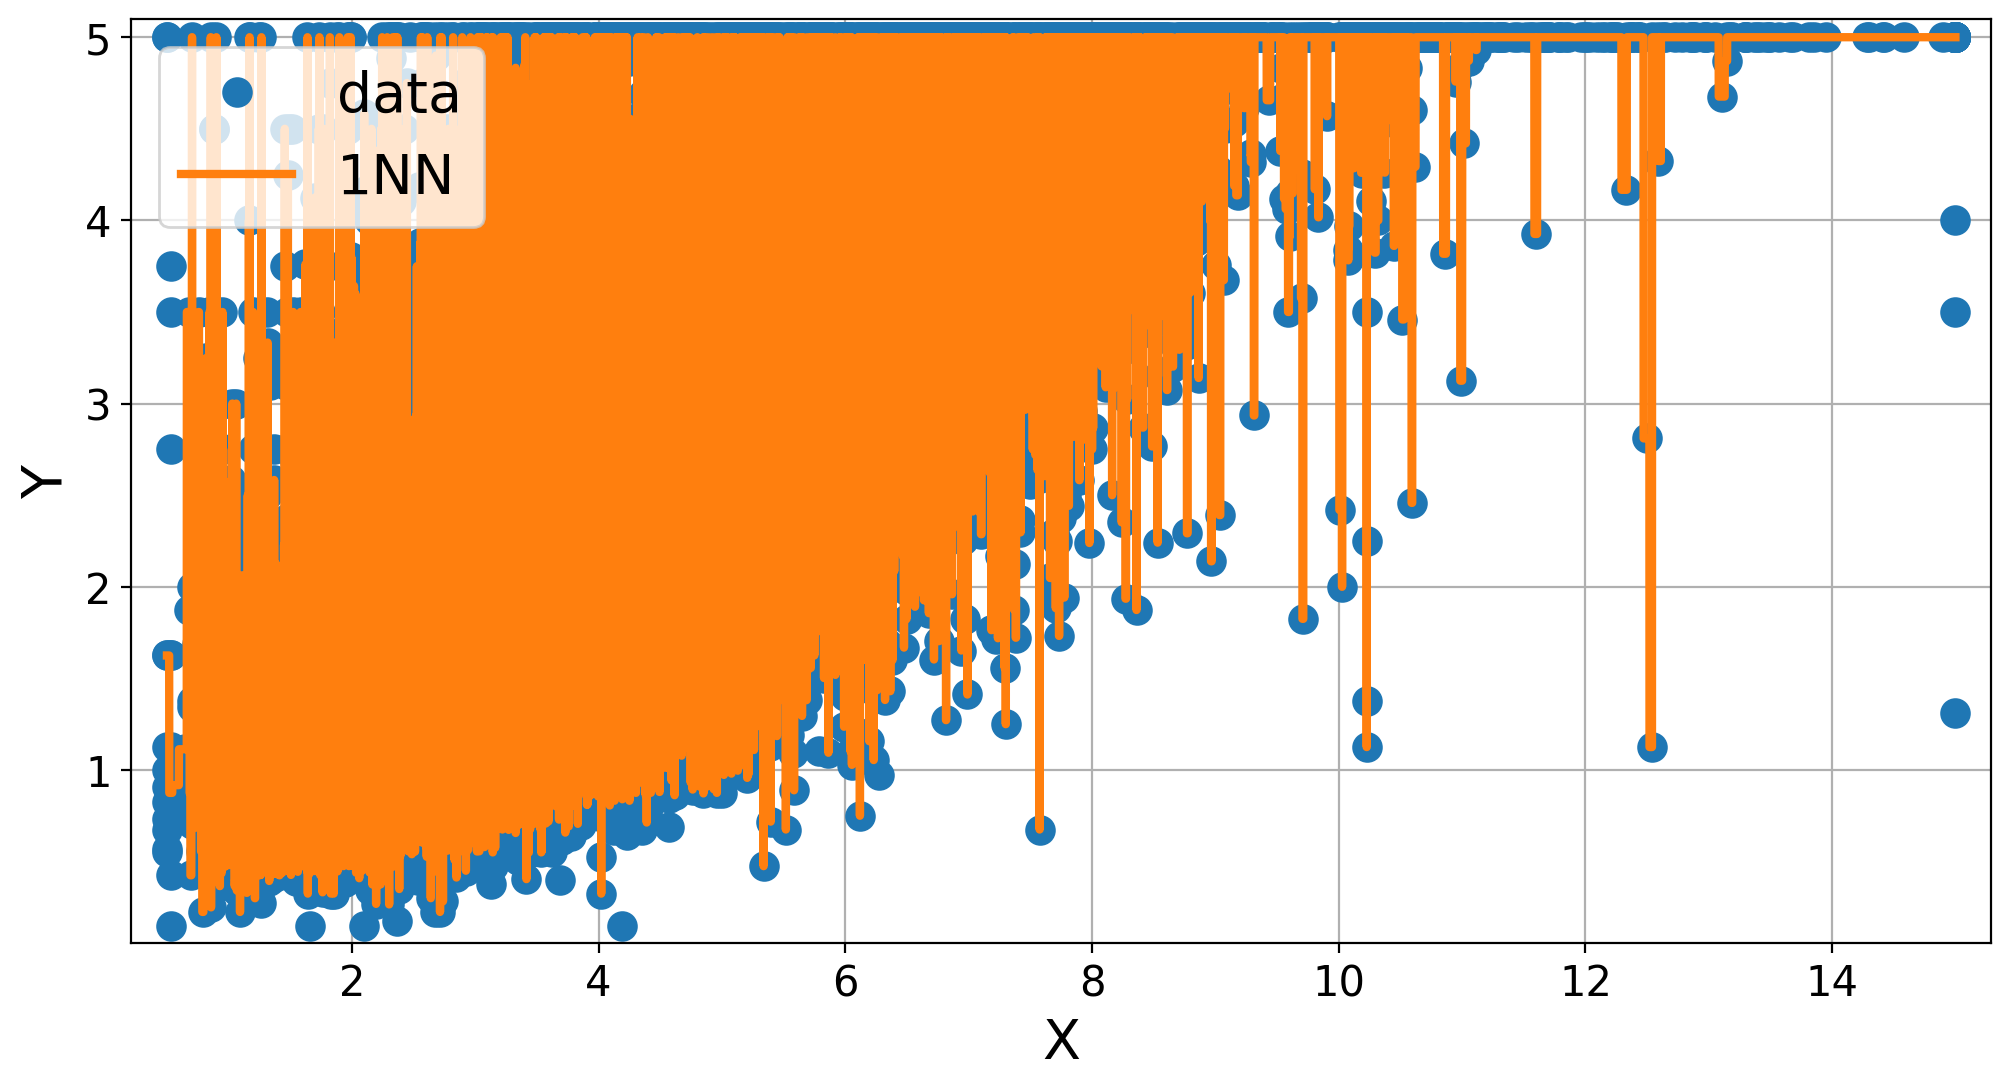

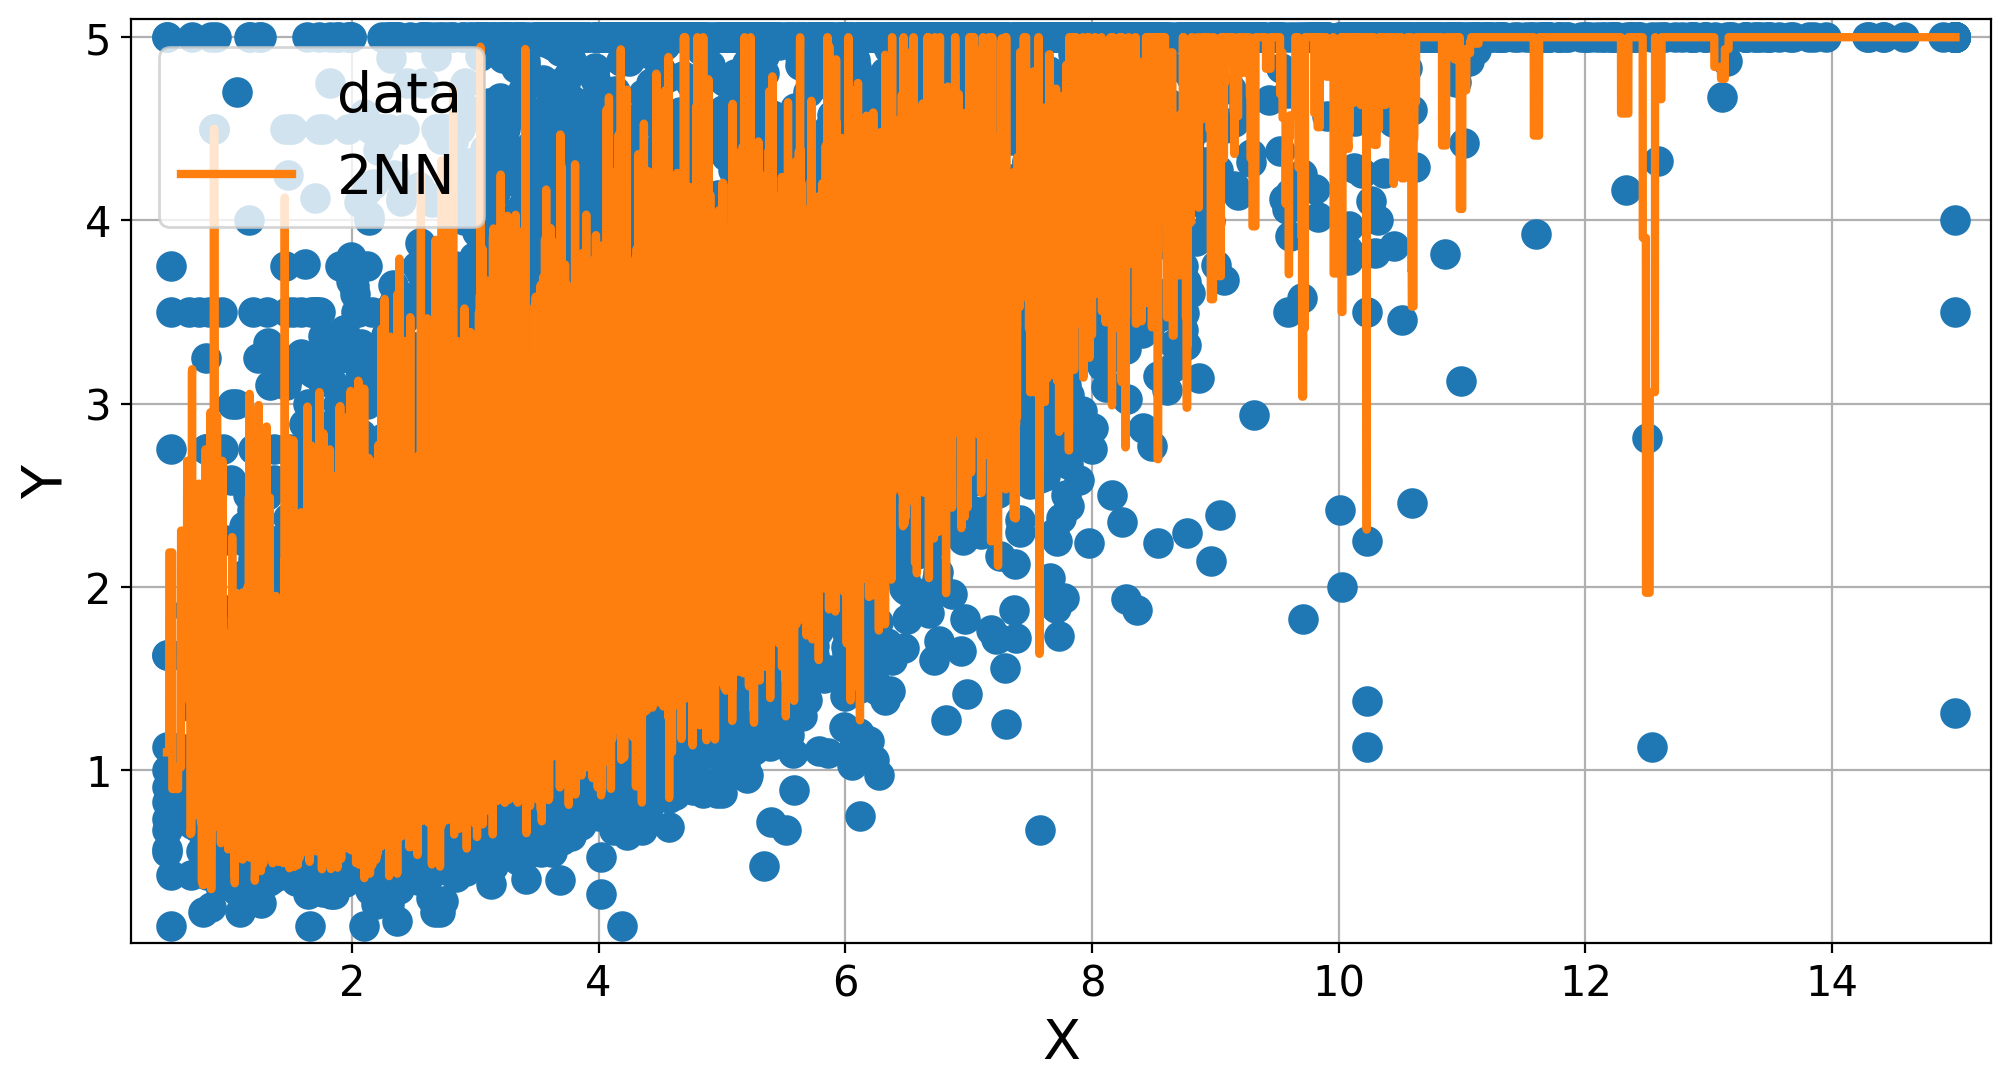

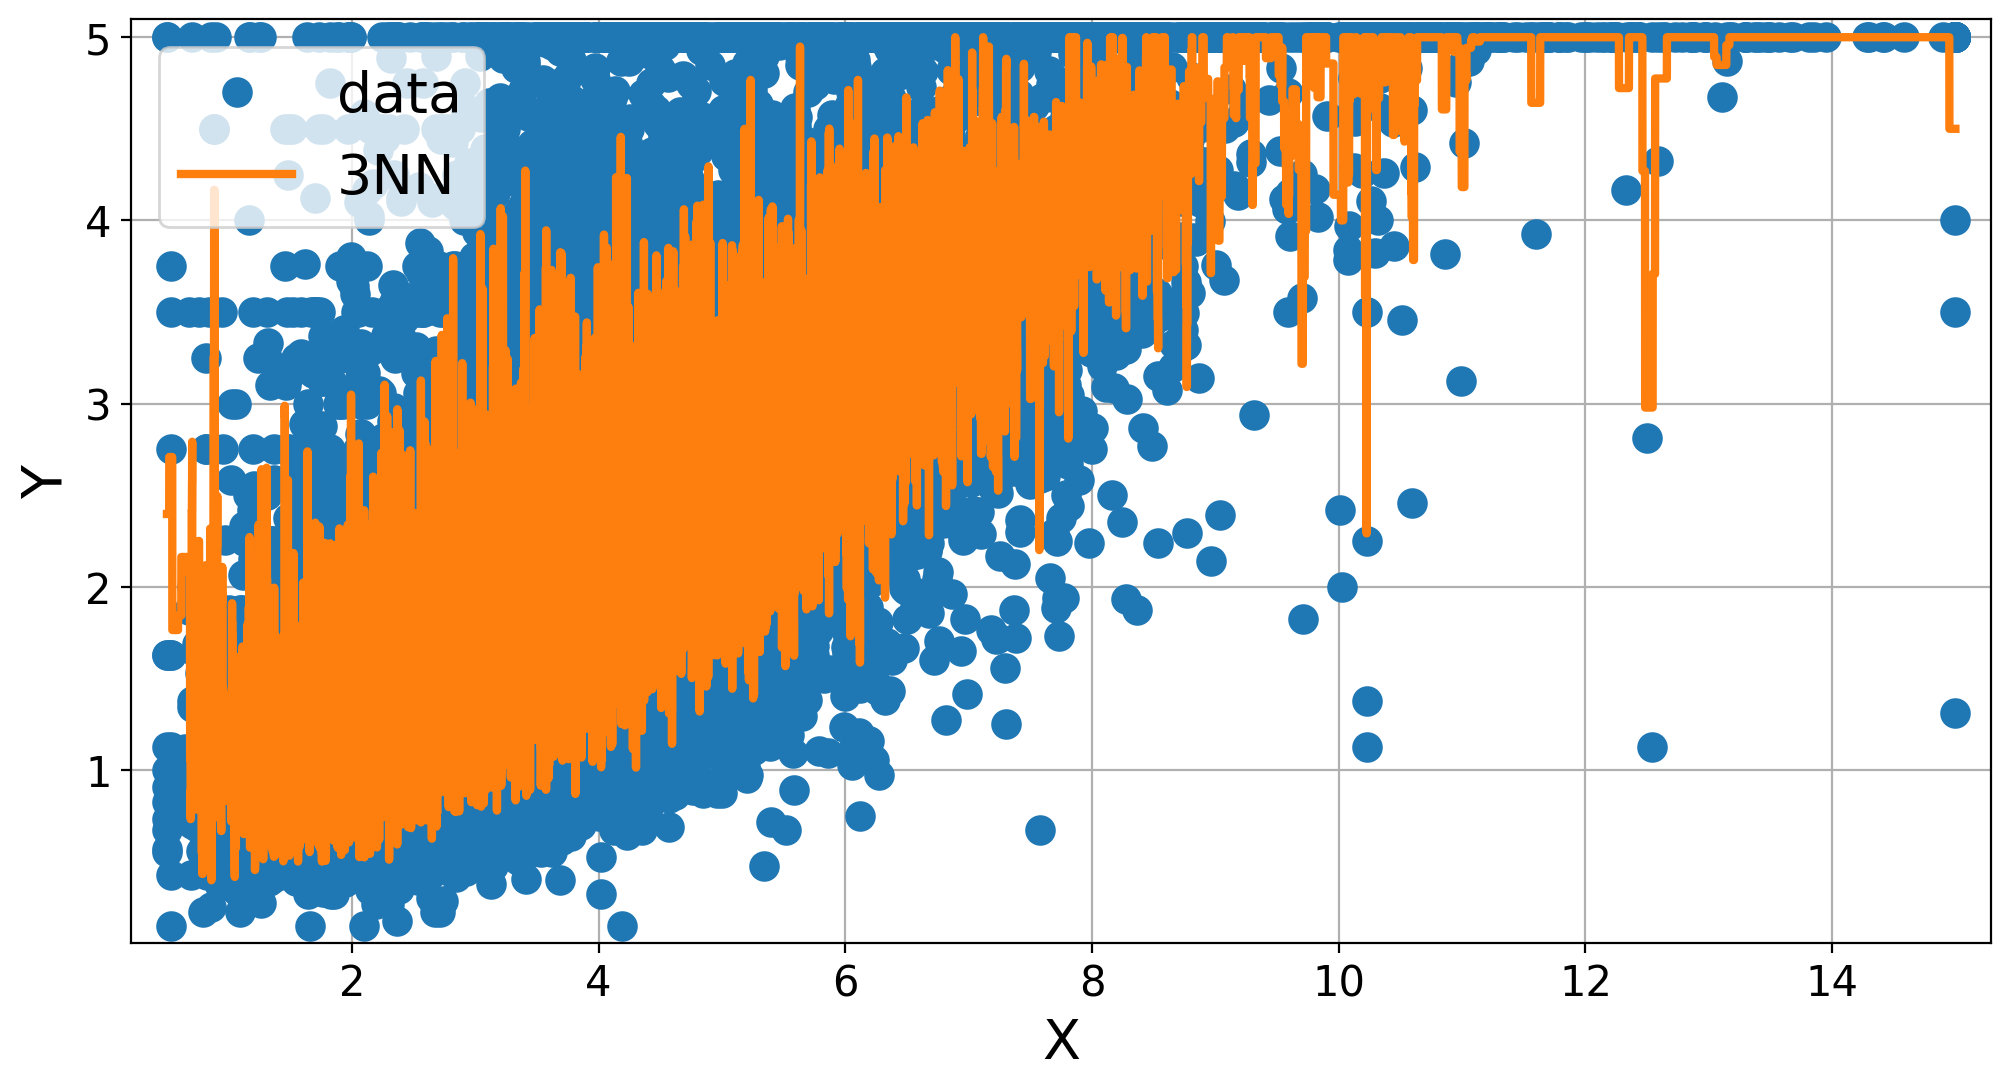

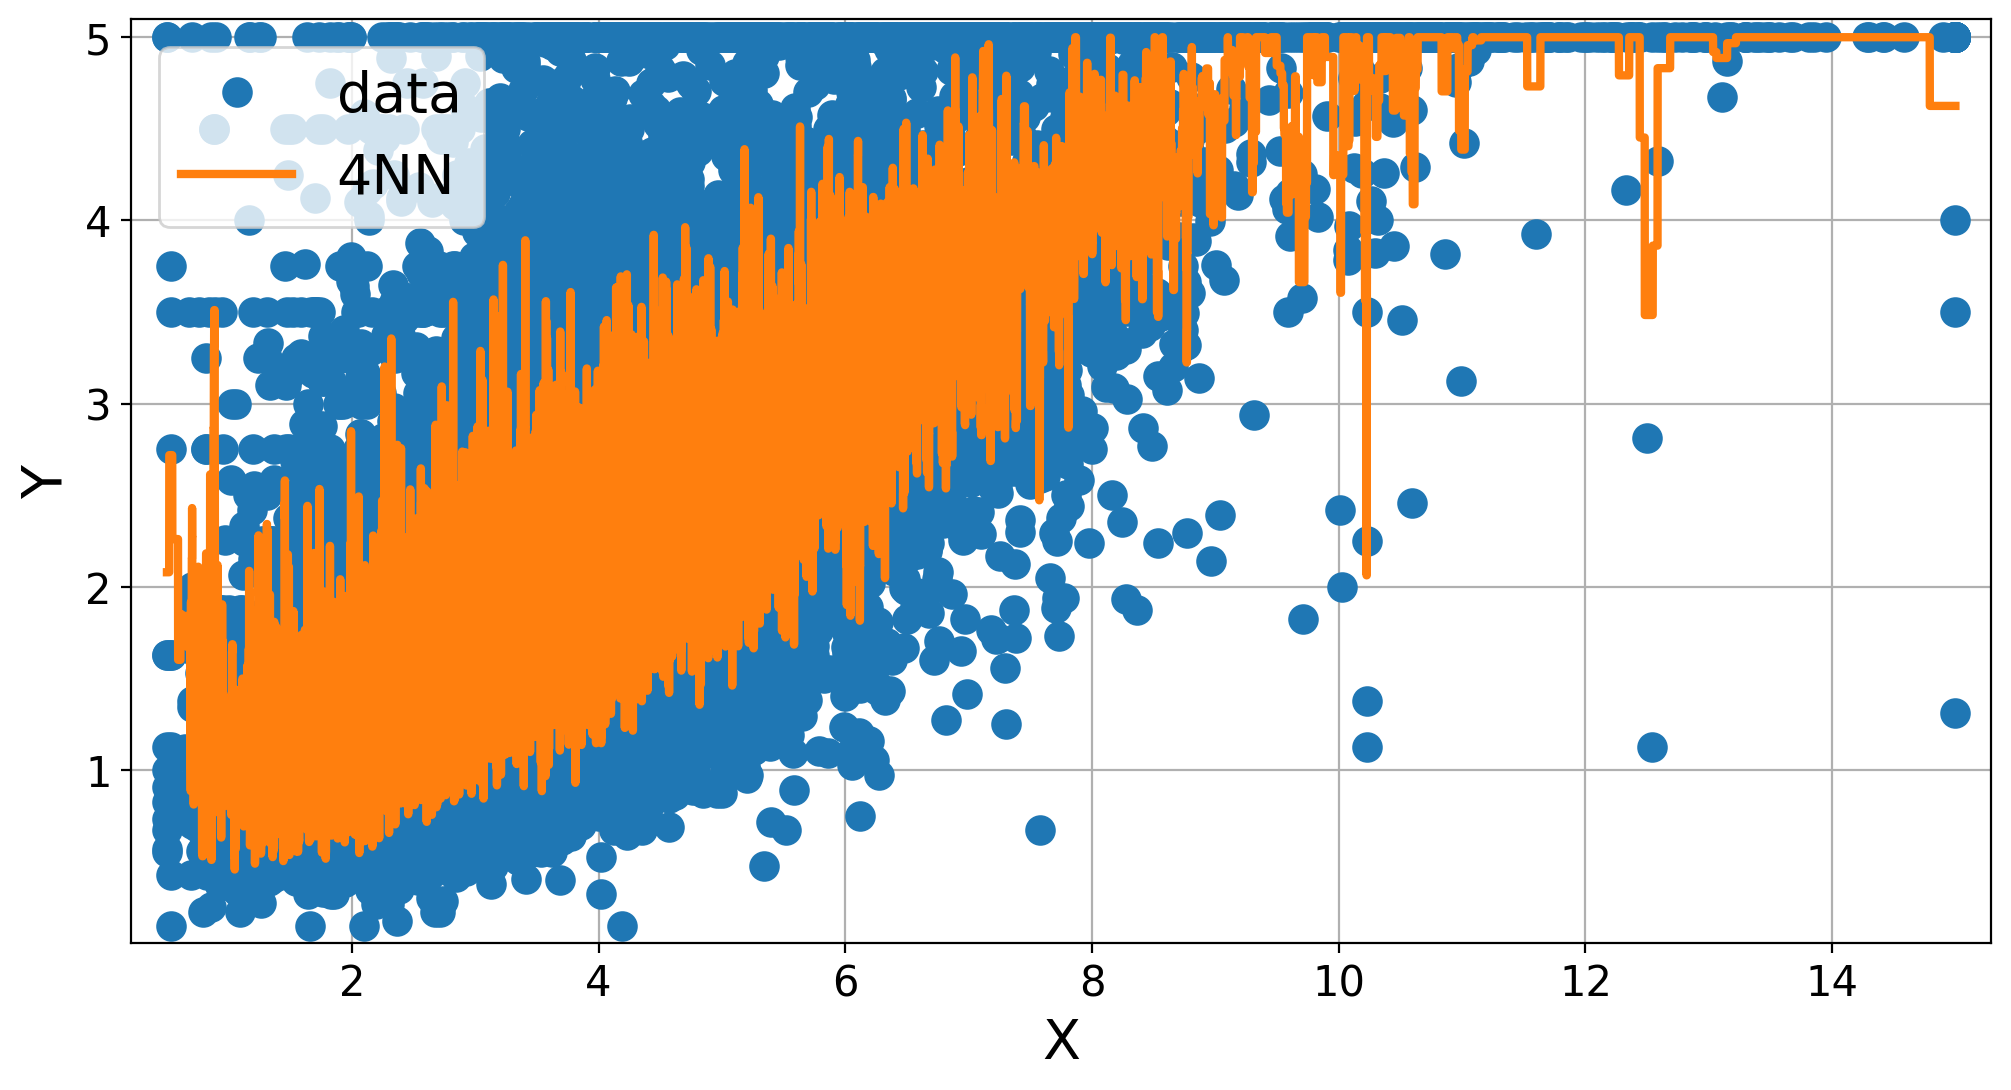

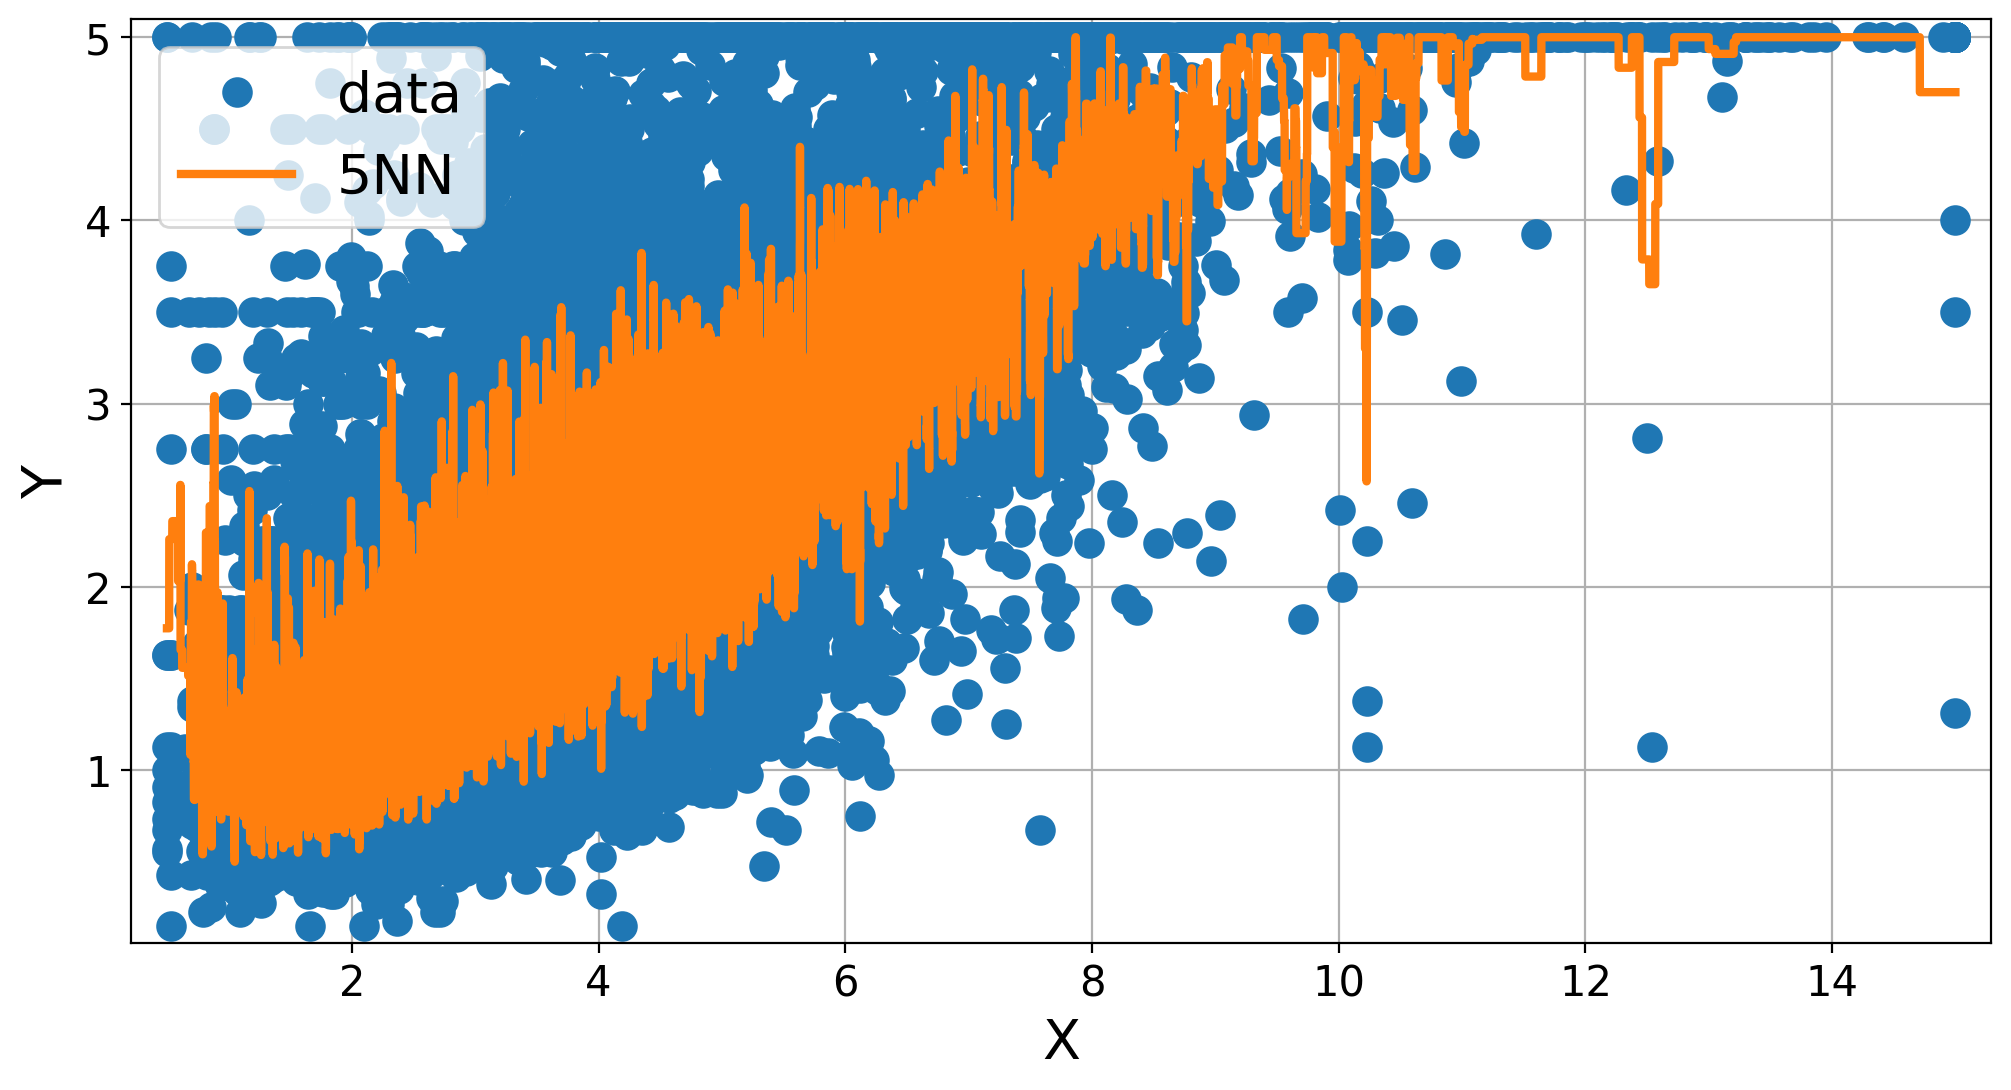

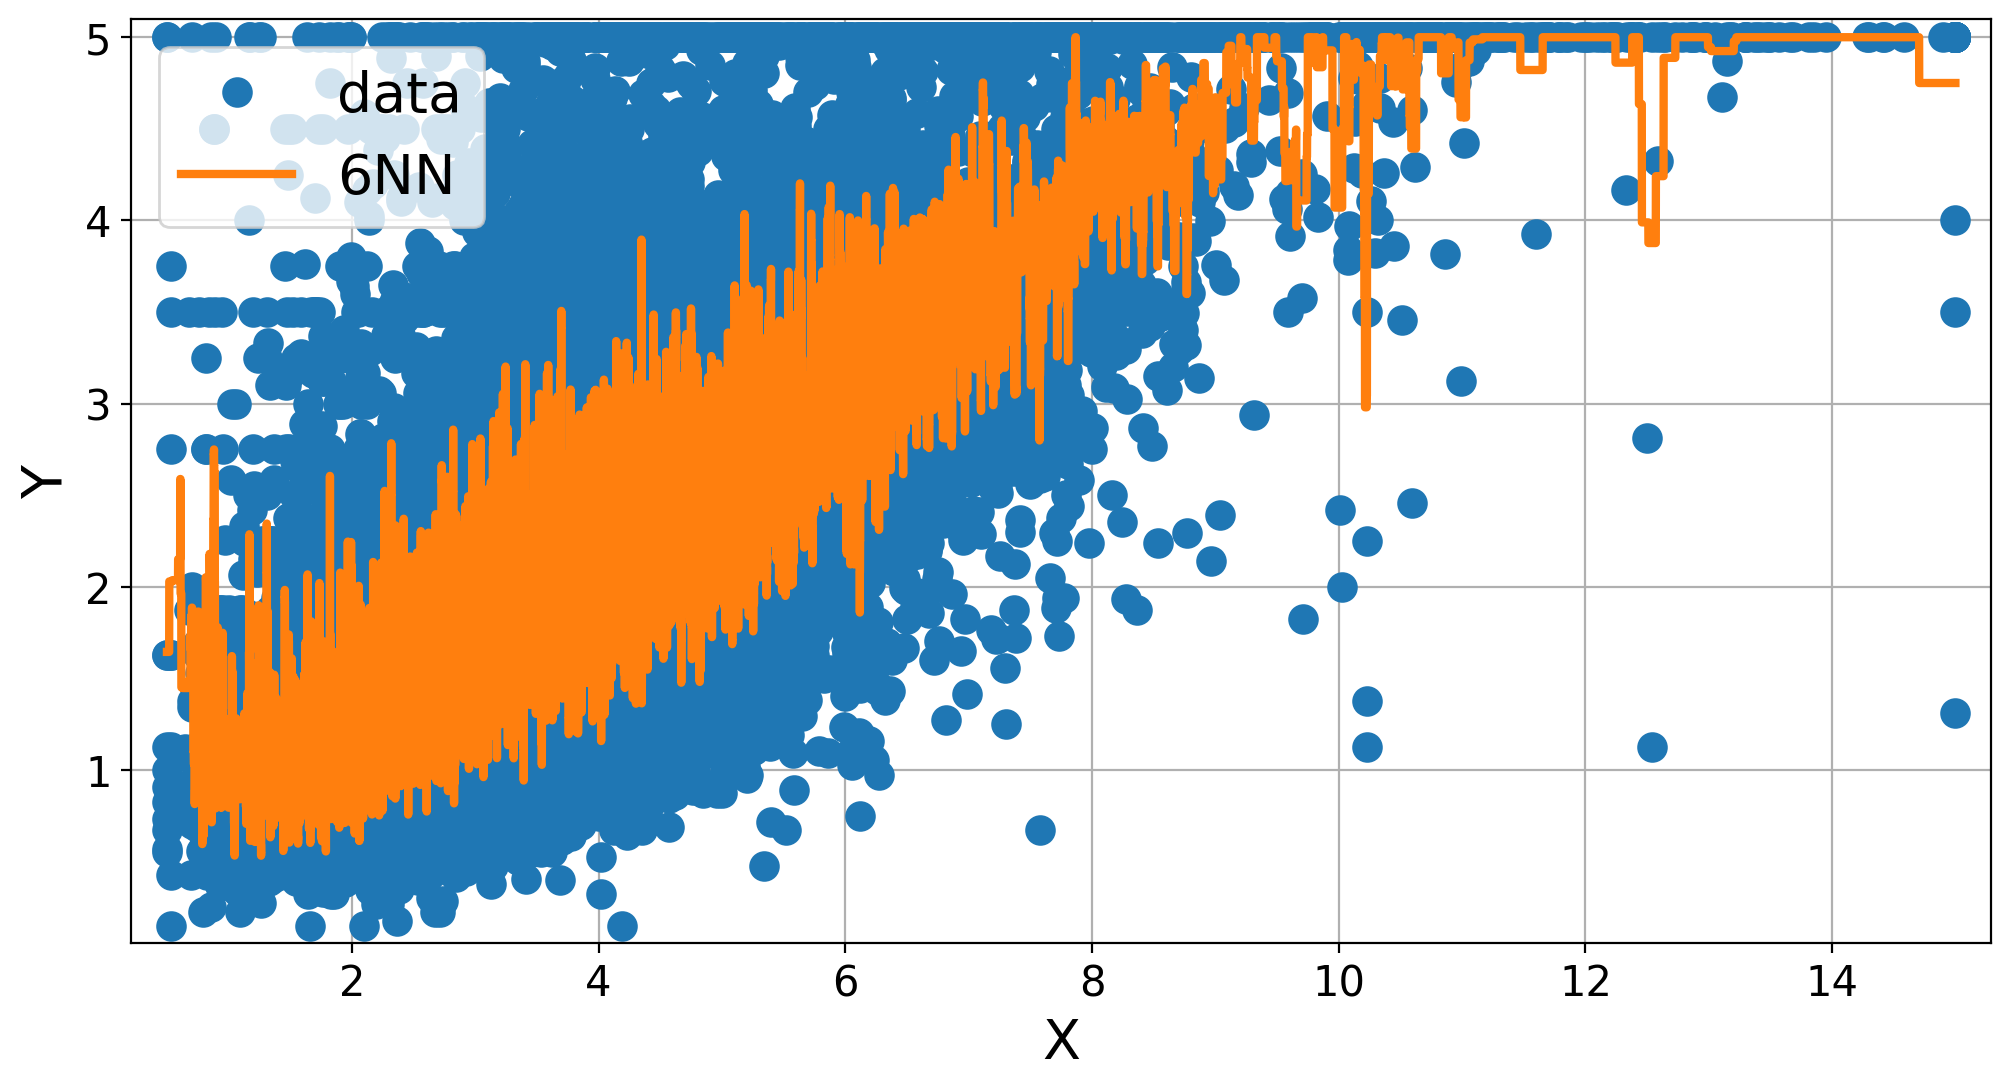

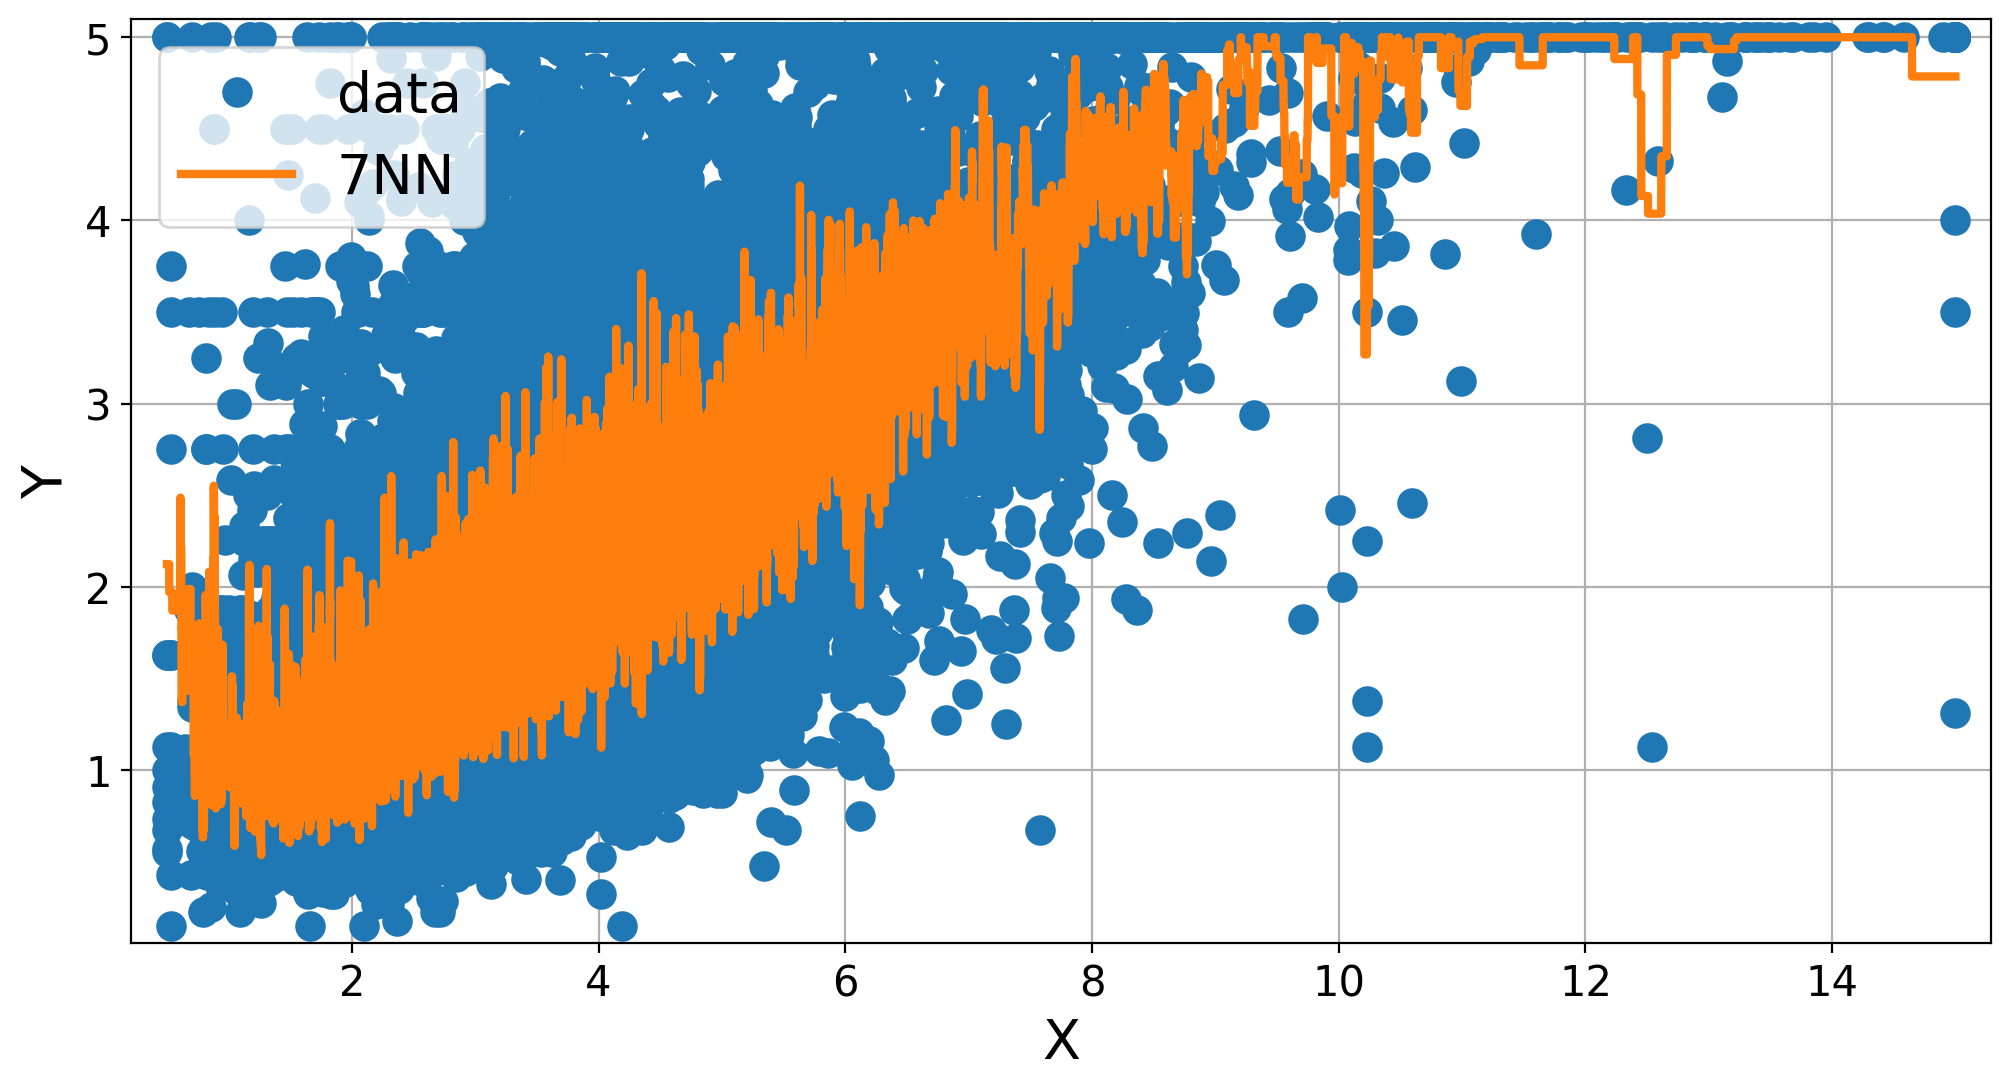

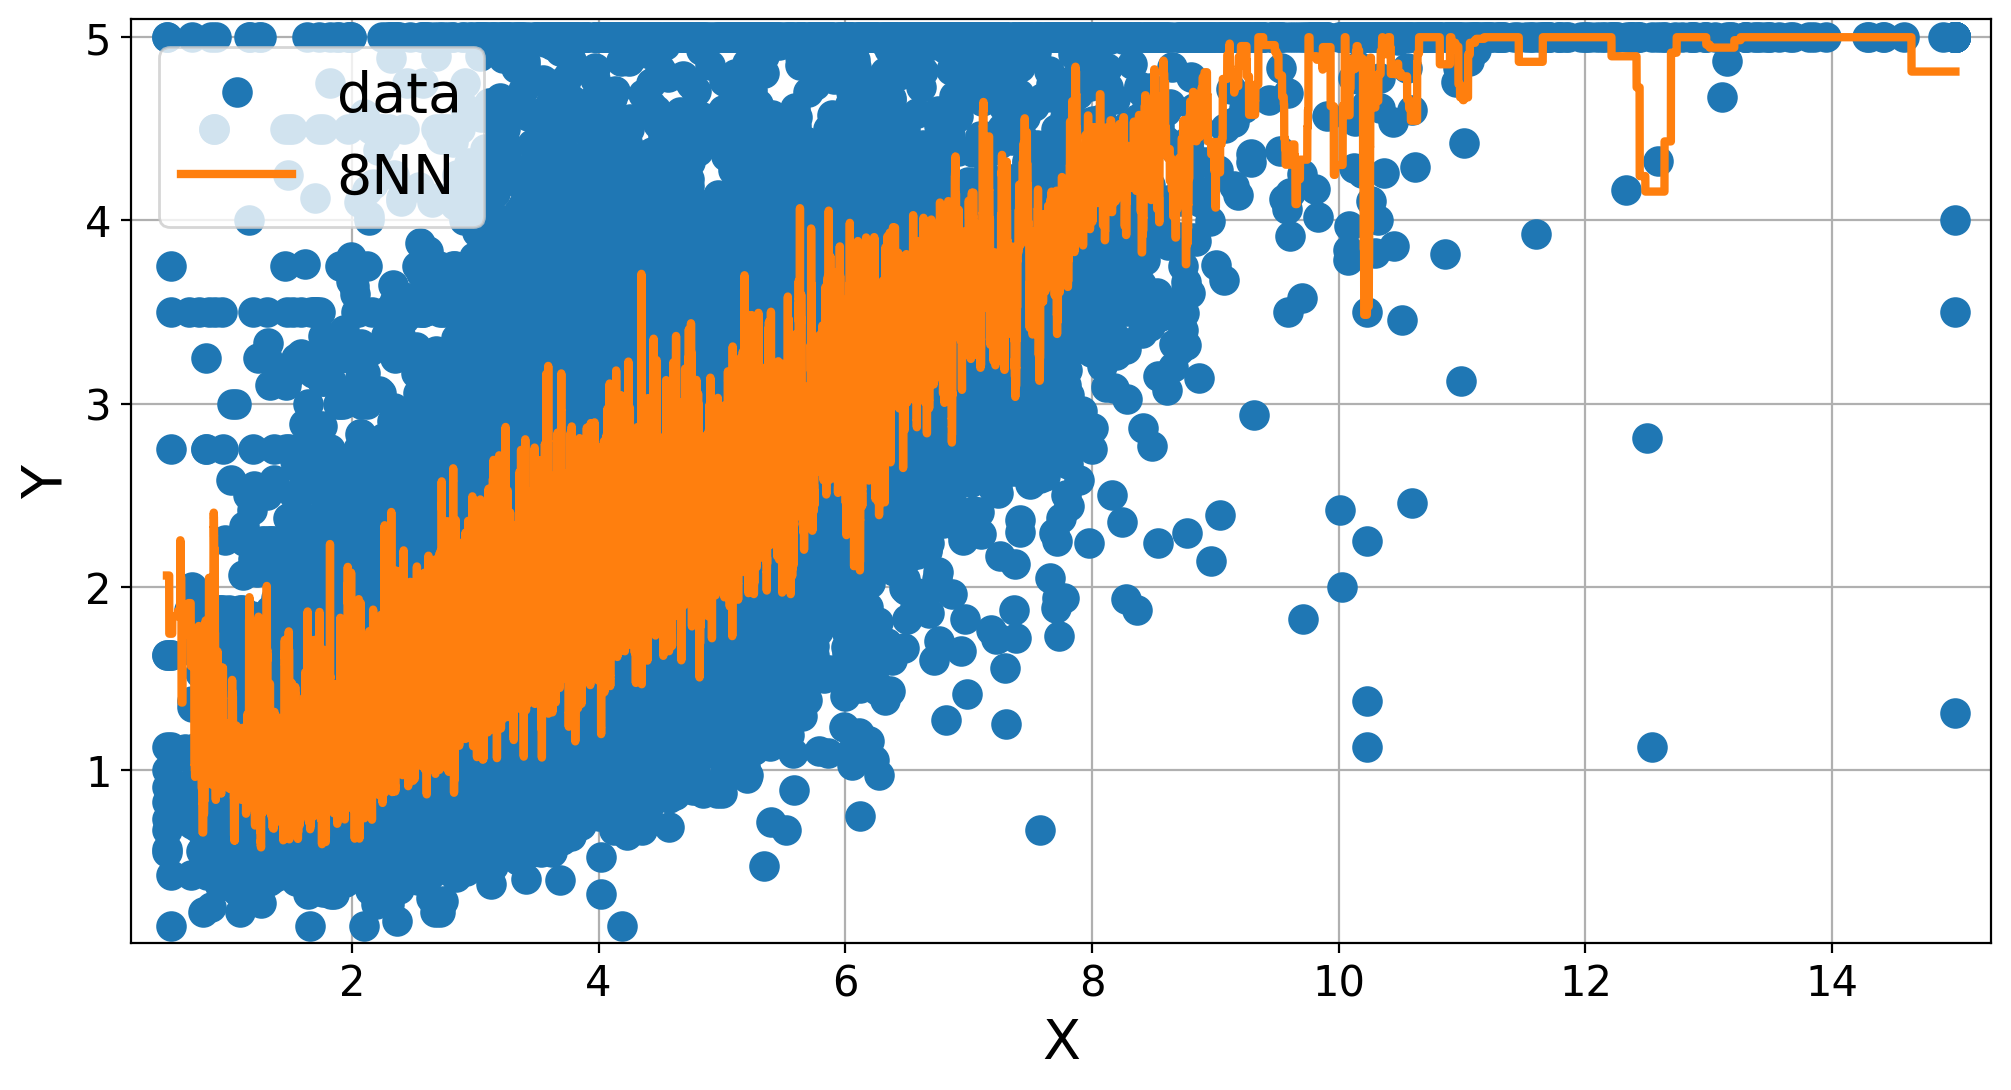

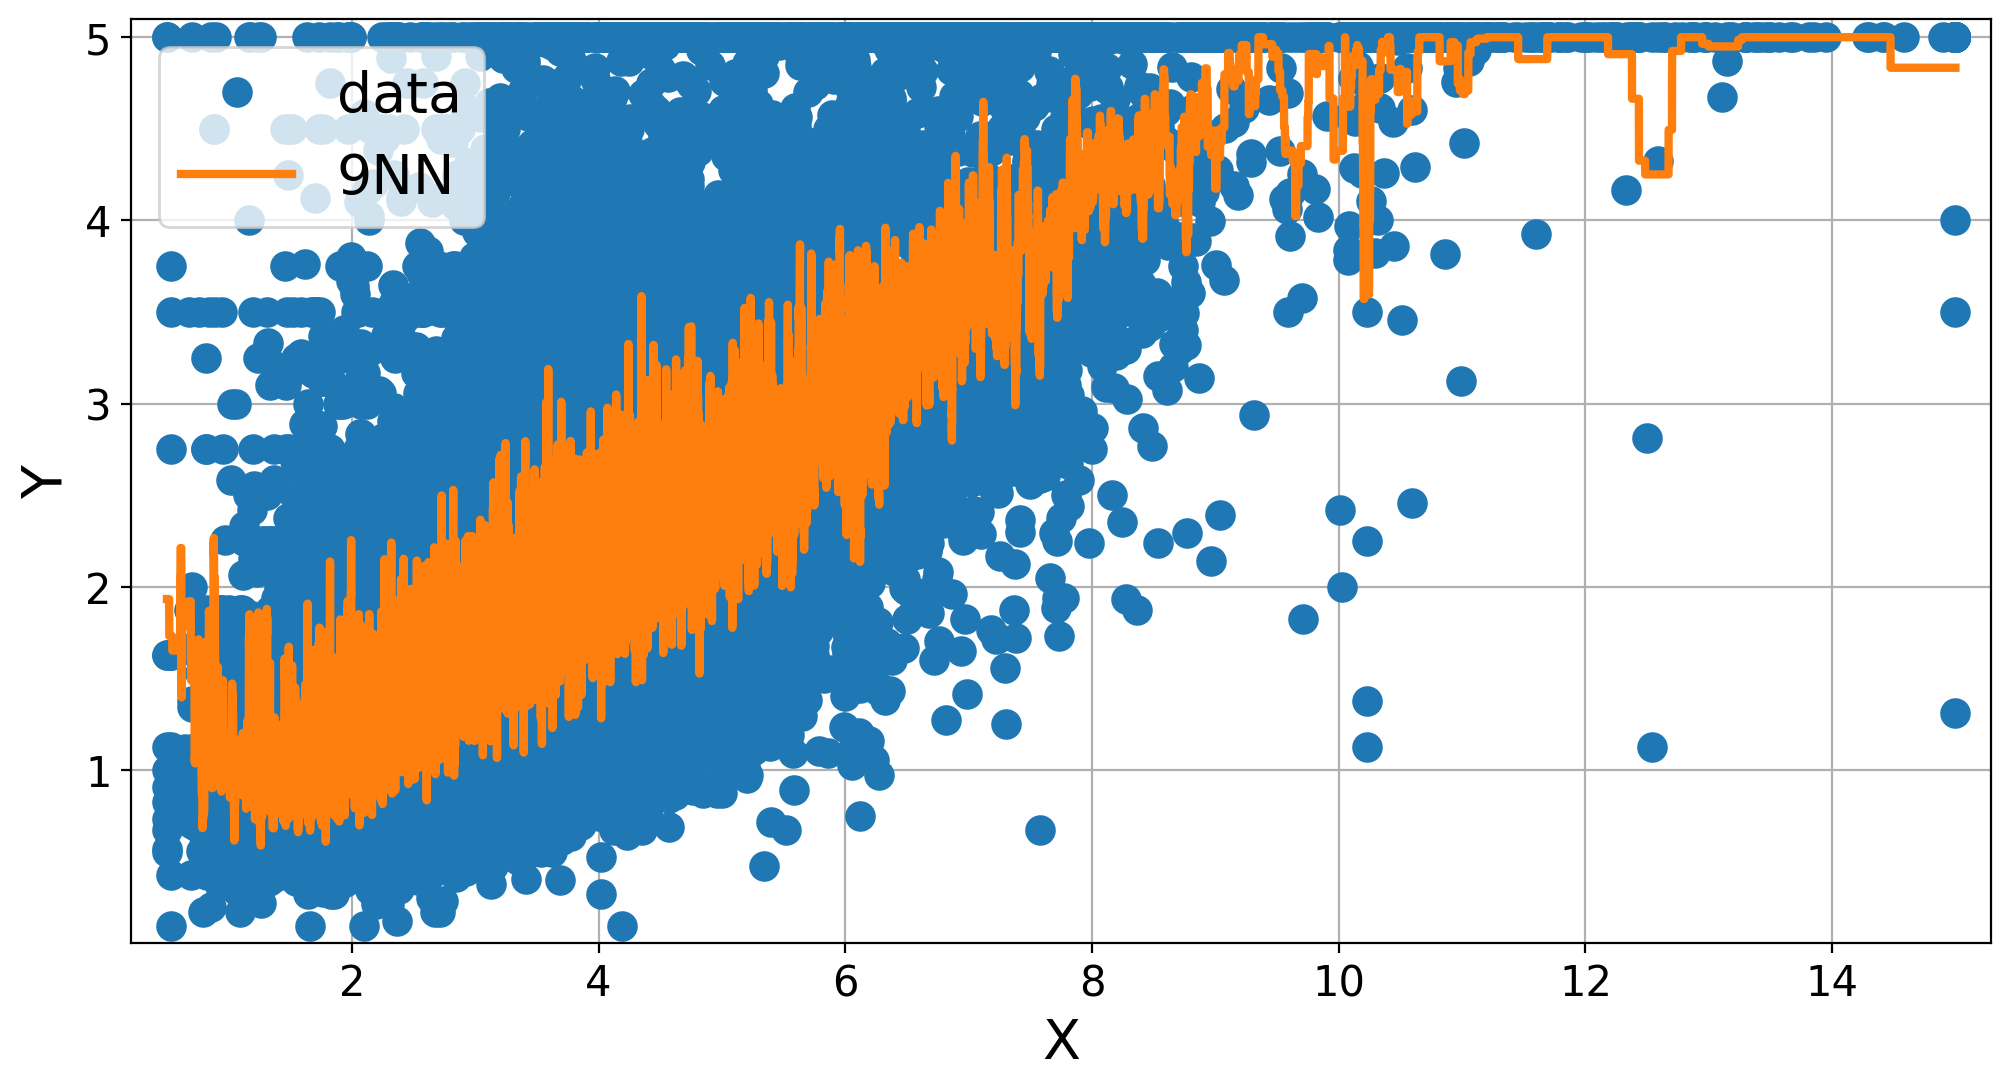

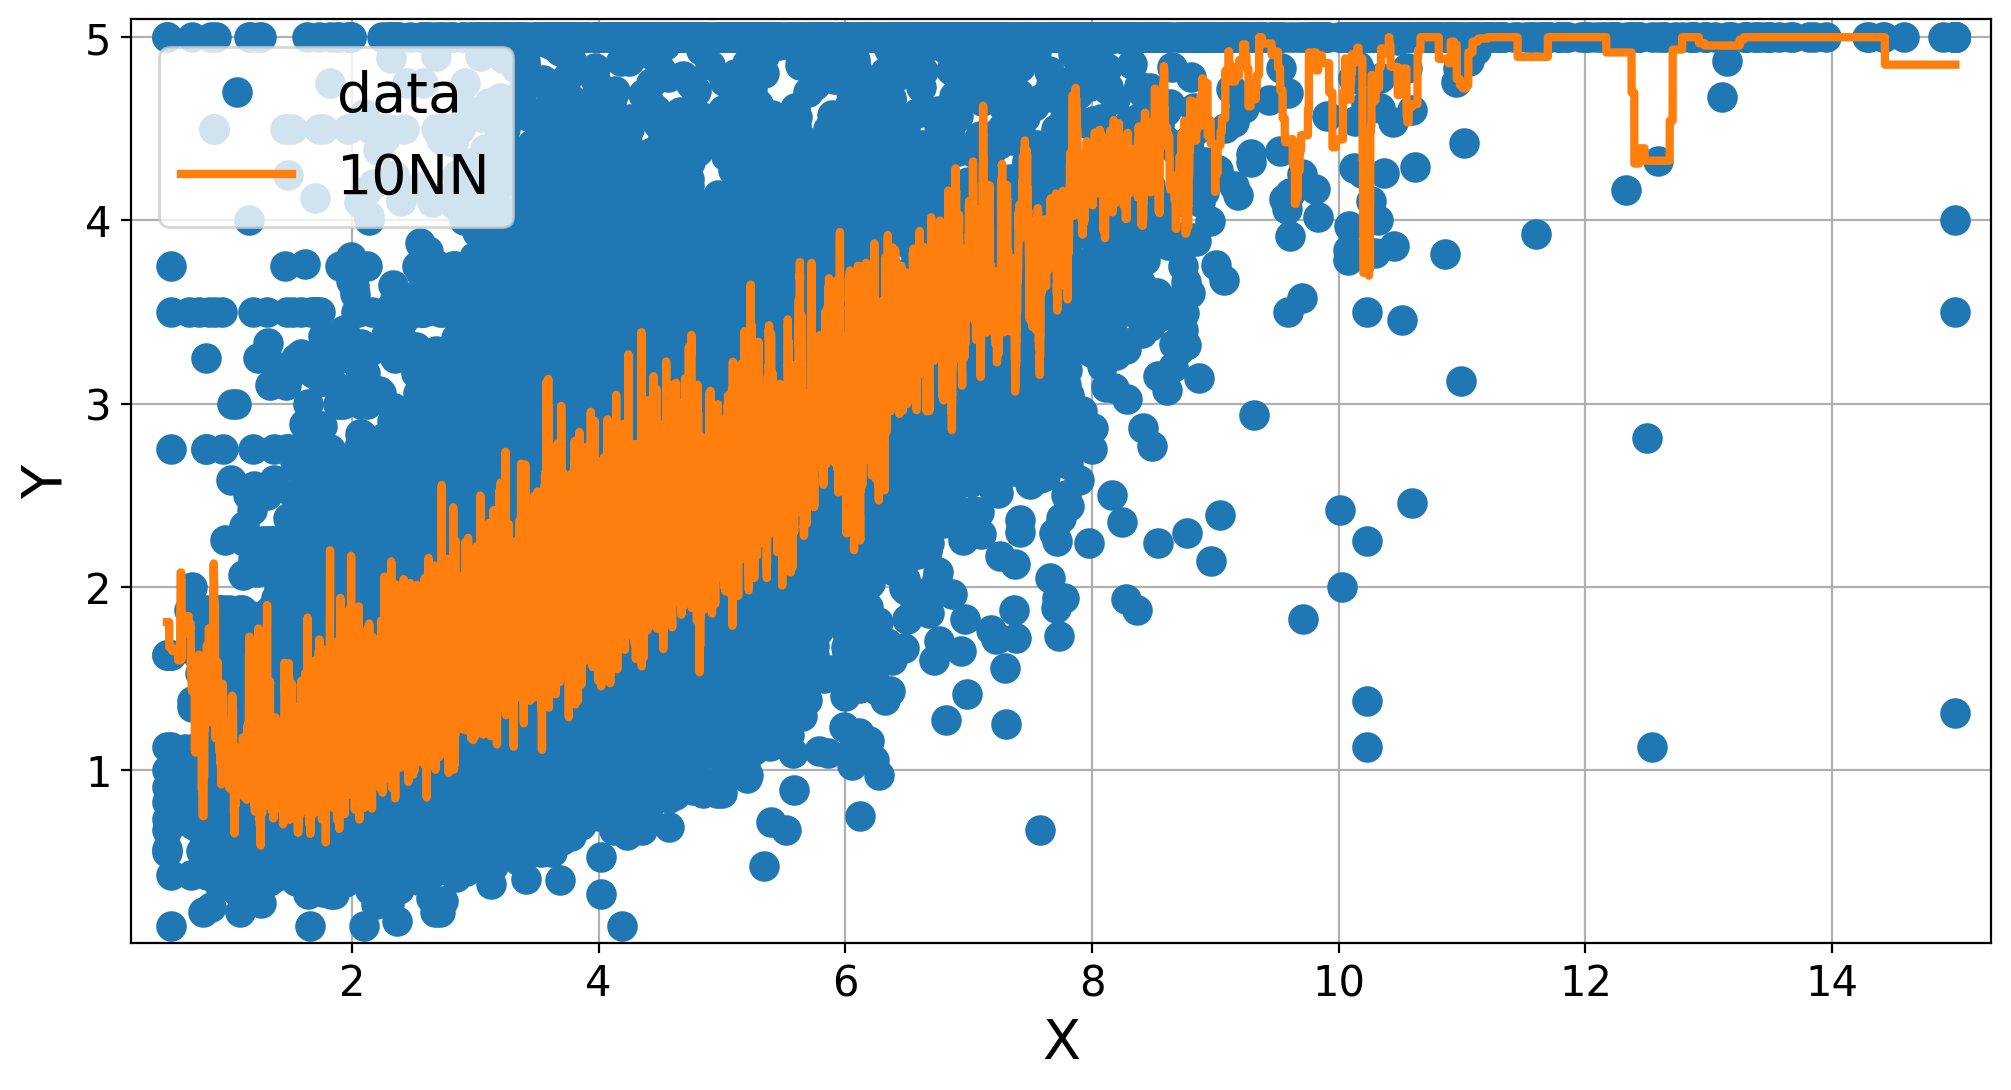

In [38]:
x_data = california_df.iloc[:, 0].values 
y_data = california_df.iloc[:,-1].values 

neighbor_numbers = list(range(1, 21)) # 1, ..., 10 
for d in distance_numbers:
    # Create Instance
    kNN = neighbors.KNeighborsRegressor(n_neighbors=d, p = 1) 

    # Fit Model
    kNN.fit(x_data.reshape(-1, 1), y_data)

    # Print Score of Modell
    print("Score of kNN: ", kNN.score(x_data.reshape(-1, 1), y_data))

    plot_res(x_data, y_data, regressor=kNN, labels = [str(kNN.n_neighbors) + "NN"])
    plt.plot()



### **Schritt 9: *Fitten des Modells mit den Trainingsdaten***
Vorgehensweise: 
1. Führe einen Fit durch
2. Lass dir die Ergebnisse in einer Tabelle ausgeben: Es sind mehrere Ergebnisse, da du mehrere Parameterkombinationen angegeben hast vgl. dictionary oben
3. Betrachte den Bereich deiner Hyperparameter mit besten Score und grenze diese weiter ein z.B. für C = 100 und C = 1000 hast du guten Score, dann kannst du dir die Werte 100, 200, 300, ..., 1000 anschauen, in dem du eine neue Liste von Hyperparametern definierst
4. Wiederhole Schritt 3 ein paar mal, bis du super Ergebnisse hast

In [8]:
gridsearchcv.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5],
                         'gamma': ['scale']},
             scoring='r2')

In [9]:
# Betrachtung der Ergebnisse in einer Tabelle
ergebnisse = (
    pd.DataFrame(gridsearchcv.cv_results_)
)

### Wir sortieren jetzt die Ergebnisse nach höchsten Score
ergebnisse = ergebnisse.sort_values(by = ["rank_test_score"])

### Merke: die Ergebnistabelle hat 45 Spalten, daher schauen wir uns nur die 3 wichtigsten Spalten an, die was mit Score zu tun haben:
relevante_spalten = ["params", "rank_test_score", "mean_test_score", "std_test_score"]
ergebnisse[relevante_spalten]

params  rank_test_score  \
10   {'C': 100, 'epsilon': 0.1, 'gamma': 'scale'}                1   
9   {'C': 100, 'epsilon': 0.01, 'gamma': 'scale'}                2   
11   {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}                3   
8     {'C': 10, 'epsilon': 0.5, 'gamma': 'scale'}                4   
7     {'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}                5   
6    {'C': 10, 'epsilon': 0.01, 'gamma': 'scale'}                6   
5      {'C': 1, 'epsilon': 0.5, 'gamma': 'scale'}                7   
2    {'C': 0.1, 'epsilon': 0.5, 'gamma': 'scale'}                8   
4      {'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}                9   
3     {'C': 1, 'epsilon': 0.01, 'gamma': 'scale'}               10   
0   {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale'}               11   
1    {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale'}               12   

    mean_test_score  std_test_score  
10         0.441704        0.007941  
9          0.440285        0.008022  
11         0.428352        0.004129  
8          0.075672        0.006782  
7          0.062618        0.008122  
6          0.060841        0.009754  
5         -0.016088        0.006218  
2         -0.029176        0.006260  
4         -0.038423        0.008462  
3         -0.038608        0.006138  
0         -0.052988        0.007837  
1         -0.054517        0.007580

### **Schritt 10: *Besten Hyperparameter nehmen und auf die Testdaten anwenden***



In [10]:
# In meinem obigen Beispiel hat gridsearchCV C = 100 gefunden ----> das ist nicht der beste Hyperparameter, da wir ja nur 1 mal gesucht haben
## Zu Demonstrationszwecken reicht das aber 

# Wir nehmen die besten Parameter aus GridSearchCV
best_support_vector_regression = gridsearchcv.best_estimator_

# Geben eine Vorhersage für y
y_prediction = best_support_vector_regression.predict(x_test)




### **Schritt 11: *Visualisierung des Ergebnisses***

In [11]:
def plot_res(data_x, data_y, regressor=None, weights=None, is_list=False, labels=None, 
             is_data_list=False, data_labels=None, func=None, lw=0, data_style=None, 
             pos_legend='upper left', minmax=None,
             xlabel="house price", ylabel="predicted house price"):

    if minmax is None:
        if is_data_list:
            minmax = [[np.concatenate(data_x).min(),np.concatenate(data_x).max()],[np.concatenate(data_y).min(),np.concatenate(data_y).max()]]
        else:
            minmax = [[data_x.min(),data_x.max()],[data_y.min(),data_y.max()]]

    xval = np.arange(minmax[0][0],minmax[0][1],0.0001)

    markers = ["o","v","s","D","X"]
    fig = plt.figure(figsize=(12,6),dpi=200)
    ax = plt.subplot(111)

    if data_labels is None:
        data_labels = []
        if is_data_list:
            for i in range(1,len(data_x)+1):
                data_labels.append('data '+str(i))
        else:
            data_labels = ['data']

    if data_style is None:
        data_style = []
        if is_data_list:
            for i in range(1,len(data_x)+1):
                data_style.append([10,0])
        else:
            data_style = [[10,0]]

            
            
    if is_data_list:
        for i in range(len(data_x)):
            ax.plot(data_x[i],data_y[i], label=data_labels[i], lw=data_style[i][1], marker=markers[0], markersize=data_style[i][0])
    else:
        ax.plot(data_x,data_y, label=data_labels[0], lw=data_style[0][1], marker=markers[0], markersize=data_style[0][0])

    if labels is None:
        labels = []
        if is_list:
            for i in range(1,len(weights)+1):
                labels.append(str(i))
        else:
            labels = [str(1)]

    if func is None:
        if is_list:
            func = []
            for i in range(1,len(weights)+1):
                func.append(lambda x: x)
        else:
            func = lambda x: x

            
    if weights is not None:
        if is_list:
            i = 0
            for iweights in weights:
                ax.plot(xval, [iweights[1]*func[i](x)+iweights[0] for x in xval],
                        label=labels[i], lw=3)
                i += 1
        else:
            ax.plot(xval, [weights[1]*func(x)+weights[0] for x in xval],
                    label=labels[0], lw=3)

    if regressor is not None:
        ax.plot(xval, regressor.predict(xval.reshape(-1,1)),
                    label=labels[0], lw=3)

        
            
    ax.legend(loc=pos_legend, fancybox=True, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid(True)

    plt.ylim(1.02*minmax[1][0]-0.02*minmax[1][1],1.02*minmax[1][1]-0.02*minmax[1][0])        
    plt.xlim(1.02*minmax[0][0]-0.02*minmax[0][1],1.02*minmax[0][1]-0.02*minmax[0][0])       

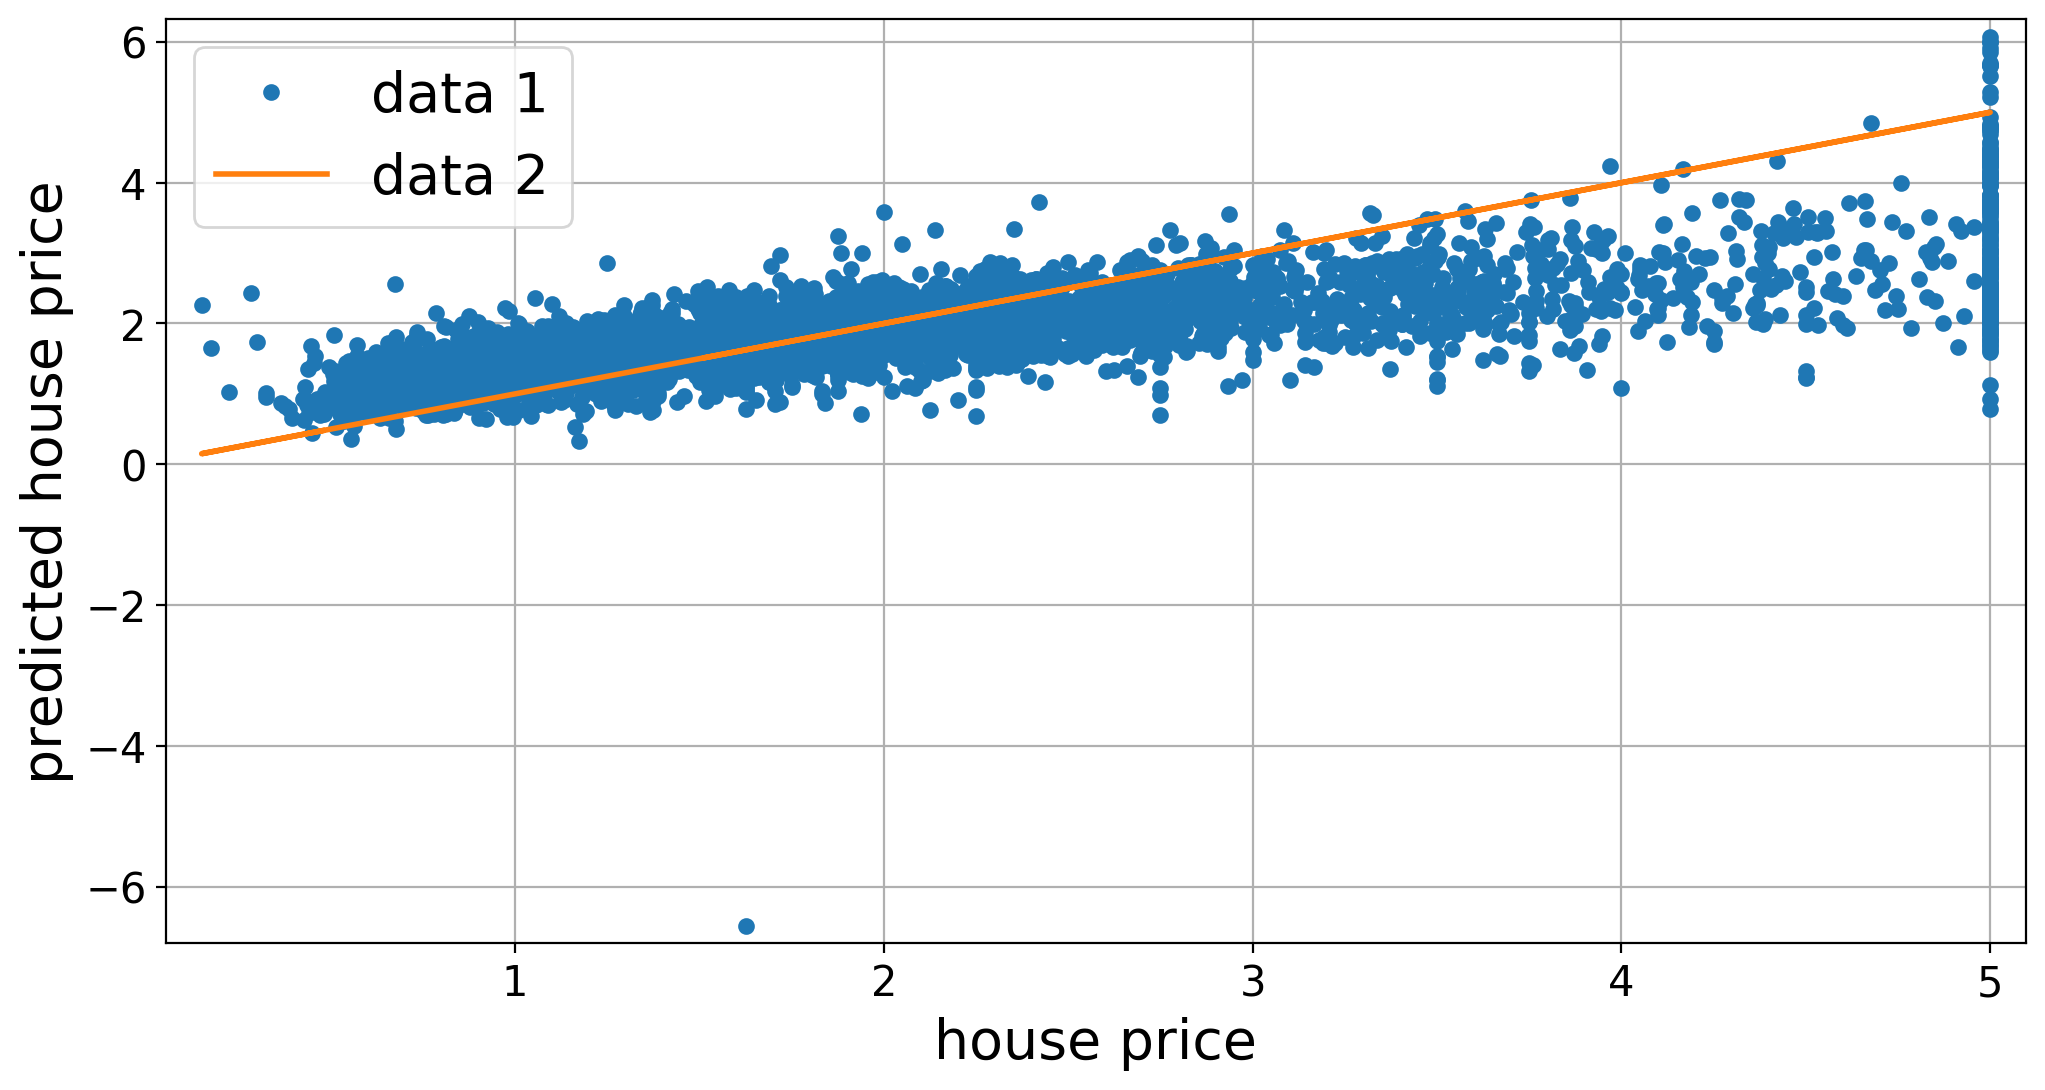

In [12]:
### plot prediction vs target
plot_res([y_test, y_test],[y_prediction, y_test], is_data_list=True, data_style=[[5,0], [0,2]])

### Diskusion der Ergebnisse: 
#### 1. Es wurde eine Gerade gefunden, die die Daten in Ordnung darstellt
#### 2. Ganz rechts gibt es einen Cut Off, d.h. eine Grenze der Daten --> diese werden wir noch später entfernen, weil es Ausreißer sind
#### 3. Der Score liegt etwa bei 0.53, wobei Ziel von r**2 = 1 ist. Wir können also etwa 50% der Daten replizieren   --> Scheiß Modell!
